In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
import warnings
import math
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',125)
pd.set_option('display.max_rows',125)

**Loading the Dataset**

In [16]:
df_application_current = pd.read_csv('C:/Users/SAGNICK/TrainityBankLoneEDA/LoanCaseStudy/application_data.csv')
df_application_current.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

**Getting the Dataframe dimensions**

In [17]:
df_application_current.shape

(307511, 122)

**Basic Info of the Data Frame**

In [18]:
df_application_current.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


**Getting the statistical information**

In [19]:
df_application_current.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

**Getting the column names**

In [14]:
column_names=[]
column_names=df_application_current.columns
for cols in column_names:
    print(cols)

SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APART

# Handling missing values in columns

**Creating Copy of the DataFrame**

In [22]:
df_application_current_copy=df_application_current.copy(deep=True)
df_application_current_copy

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

**Count missing values column wise**

In [23]:
df_application_current_copy.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [24]:
rows,cols=df_application_current_copy.shape
rows

307511

**Calculating Percetage of NA values in each column**

In [42]:
Perc_Of_NA_Columns=round(df_application_current_copy.isnull().sum()/rows*100,2)
Perc_Of_NA_Columns

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

**Name of Columns having atleast 50% NA values with Percentage**

In [43]:
Columns_with_min50_NA_Values=Perc_Of_NA_Columns[Perc_Of_NA_Columns>50]
Columns_with_min50_NA_Values

OWN_CAR_AGE                 65.99
EXT_SOURCE_1                56.38
APARTMENTS_AVG              50.75
BASEMENTAREA_AVG            58.52
YEARS_BUILD_AVG             66.50
COMMONAREA_AVG              69.87
ELEVATORS_AVG               53.30
ENTRANCES_AVG               50.35
FLOORSMIN_AVG               67.85
LANDAREA_AVG                59.38
LIVINGAPARTMENTS_AVG        68.35
LIVINGAREA_AVG              50.19
NONLIVINGAPARTMENTS_AVG     69.43
NONLIVINGAREA_AVG           55.18
APARTMENTS_MODE             50.75
BASEMENTAREA_MODE           58.52
YEARS_BUILD_MODE            66.50
COMMONAREA_MODE             69.87
ELEVATORS_MODE              53.30
ENTRANCES_MODE              50.35
FLOORSMIN_MODE              67.85
LANDAREA_MODE               59.38
LIVINGAPARTMENTS_MODE       68.35
LIVINGAREA_MODE             50.19
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAREA_MODE          55.18
APARTMENTS_MEDI             50.75
BASEMENTAREA_MEDI           58.52
YEARS_BUILD_MEDI            66.50
COMMONAREA_MED

**Number of Columns having atleast 50% NA values**

In [44]:
len(Columns_with_min50_NA_Values)

41

**Drop all the columns with 50% NA values**

In [48]:
df_application_current_copy=df_application_current_copy.drop(Columns_with_min50_NA_Values.index,axis=1)
df_application_current_copy.shape

(307511, 81)

In [60]:
round(100.0* df_application_current_copy.isnull().sum()/len(df_application_current_copy), 2).sort_values()

SK_ID_CURR                       0.00
WEEKDAY_APPR_PROCESS_START       0.00
HOUR_APPR_PROCESS_START          0.00
REG_REGION_NOT_LIVE_REGION       0.00
REG_REGION_NOT_WORK_REGION       0.00
LIVE_REGION_NOT_WORK_REGION      0.00
REG_CITY_NOT_LIVE_CITY           0.00
REG_CITY_NOT_WORK_CITY           0.00
LIVE_CITY_NOT_WORK_CITY          0.00
ORGANIZATION_TYPE                0.00
FLAG_DOCUMENT_19                 0.00
FLAG_DOCUMENT_18                 0.00
FLAG_DOCUMENT_17                 0.00
REGION_RATING_CLIENT_W_CITY      0.00
FLAG_DOCUMENT_16                 0.00
FLAG_DOCUMENT_14                 0.00
FLAG_DOCUMENT_13                 0.00
FLAG_DOCUMENT_12                 0.00
FLAG_DOCUMENT_11                 0.00
FLAG_DOCUMENT_10                 0.00
FLAG_DOCUMENT_9                  0.00
FLAG_DOCUMENT_8                  0.00
FLAG_DOCUMENT_7                  0.00
FLAG_DOCUMENT_6                  0.00
DAYS_LAST_PHONE_CHANGE           0.00
FLAG_DOCUMENT_2                  0.00
FLAG_DOCUMEN

**Columns which does not have any missing values**

In [61]:
cols_without_missingValues=Perc_Of_NA_Columns[Perc_Of_NA_Columns==0]
print("Number of columns having null value less than 15% :", len(cols_without_missingValues.index))
print(cols_without_missingValues)

Number of columns having null value less than 15% : 58
SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT                     0.0
AMT_ANNUITY                    0.0
NAME_INCOME_TYPE               0.0
NAME_EDUCATION_TYPE            0.0
NAME_FAMILY_STATUS             0.0
NAME_HOUSING_TYPE              0.0
REGION_POPULATION_RELATIVE     0.0
DAYS_BIRTH                     0.0
DAYS_EMPLOYED                  0.0
DAYS_REGISTRATION              0.0
DAYS_ID_PUBLISH                0.0
FLAG_MOBIL                     0.0
FLAG_EMP_PHONE                 0.0
FLAG_WORK_PHONE                0.0
FLAG_CONT_MOBILE               0.0
FLAG_PHONE                     0.0
FLAG_EMAIL                     0.0
CNT_FAM_MEMBERS                0.0
REGION_RATING_CLIENT           0.0


**Columns having <15% NA values**

In [63]:
Perc_Of_NA_Columns=Perc_Of_NA_Columns[Perc_Of_NA_Columns>0]
Cols_with_less_than_15Perc_NA_Values = Perc_Of_NA_Columns[Perc_Of_NA_Columns<15]
print("Number of columns having null value less than 15% :", len(Cols_with_less_than_15Perc_NA_Values.index))
print(Cols_with_less_than_15Perc_NA_Values)

Number of columns having null value less than 15% : 13
AMT_GOODS_PRICE                0.09
NAME_TYPE_SUITE                0.42
EXT_SOURCE_2                   0.21
OBS_30_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
OBS_60_CNT_SOCIAL_CIRCLE       0.33
DEF_60_CNT_SOCIAL_CIRCLE       0.33
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
dtype: float64


In [67]:
Cols_with_less_than_15Perc_NA_Values.index

Index(['AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

**Understand the insight of missing columns having <15% null values**

In [69]:
df_application_current_copy[Cols_with_less_than_15Perc_NA_Values.index].describe()

,AMT_GOODS_PRICE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,3.072330e+05,3.068510e+05,306490.000000,306490.000000,306490.000000,306490.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,5.383962e+05,5.143927e-01,1.422245,0.143421,1.405292,0.100049,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,3.694465e+05,1.910602e-01,2.400989,0.446698,2.379803,0.362291,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,4.050000e+04,8.173617e-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.385000e+05,3.924574e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000e+05,5.659614e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6.795000e+05,6.636171e-01,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.050000e+06,8.549997e-01,348.000000,34.000000,344.000000,24.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


**Identify unique values in the colums having <15% null value**

In [70]:
df_application_current_copy[Cols_with_less_than_15Perc_NA_Values.index].nunique().sort_values(ascending=False)

EXT_SOURCE_2                  119831
AMT_GOODS_PRICE                 1002
OBS_30_CNT_SOCIAL_CIRCLE          33
OBS_60_CNT_SOCIAL_CIRCLE          33
AMT_REQ_CREDIT_BUREAU_YEAR        25
AMT_REQ_CREDIT_BUREAU_MON         24
AMT_REQ_CREDIT_BUREAU_QRT         11
DEF_30_CNT_SOCIAL_CIRCLE          10
DEF_60_CNT_SOCIAL_CIRCLE           9
AMT_REQ_CREDIT_BUREAU_DAY          9
AMT_REQ_CREDIT_BUREAU_WEEK         9
NAME_TYPE_SUITE                    7
AMT_REQ_CREDIT_BUREAU_HOUR         5
dtype: int64

# **Imputing NA Values**

**Impute NA Values for 'AMT_GOODS_PRICE'**

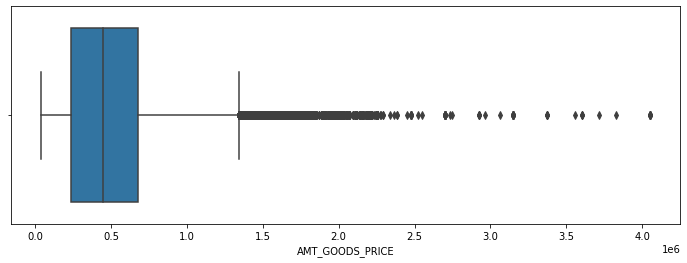

In [72]:
plt.figure(figsize=(12,4))
sns.boxplot(df_application_current_copy['AMT_GOODS_PRICE'])
plt.show()

There are significant number of outliers present in the data. So we have to impute the data

In [71]:
df_application_current_copy['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [74]:
print(df_application_current_copy['AMT_GOODS_PRICE'].median())
print(df_application_current_copy['AMT_GOODS_PRICE'].mean())

450000.0
538396.2074288895


Mean is higher than median so data should be imputed with median value:45000

**Impute NA Values for 'EXT_SOURCE_2'**

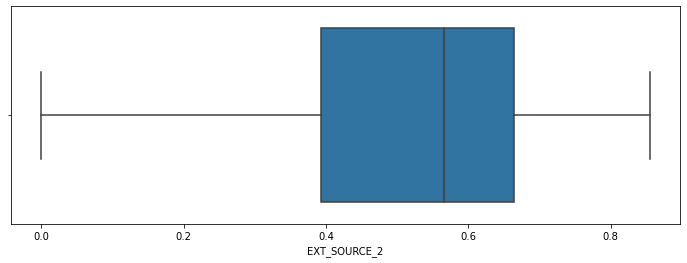

In [75]:
plt.figure(figsize=(12,4))
sns.boxplot(df_application_current_copy['EXT_SOURCE_2'])
plt.show()

There is no outliers present. 

In [76]:
df_application_current_copy['EXT_SOURCE_2'].describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

In [77]:
print(df_application_current_copy['EXT_SOURCE_2'].median())
print(df_application_current_copy['EXT_SOURCE_2'].mean())

0.5659614260608526
0.5143926741308463


There is no significant diffence observed between mean and median. However data look to be right skewed. So missing values can be imputed with median value: 0.5659614260608526

**Impute NA Values for 'NAME_TYPE_SUITE'** Categorical Variable

In [82]:
df_application_current_copy['NAME_TYPE_SUITE'].value_counts()


Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

For categorical vriable the value which should be imputed with maximum in frequency.
So the value to be imputed is: Unaccompanied

**Impute NA Values for 'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE' Categorical Variables**

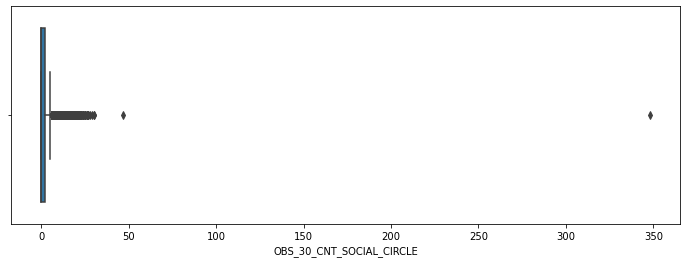

In [94]:
plt.figure(figsize=(12,4))
sns.boxplot(df_application_current_copy['OBS_30_CNT_SOCIAL_CIRCLE'])
plt.show()

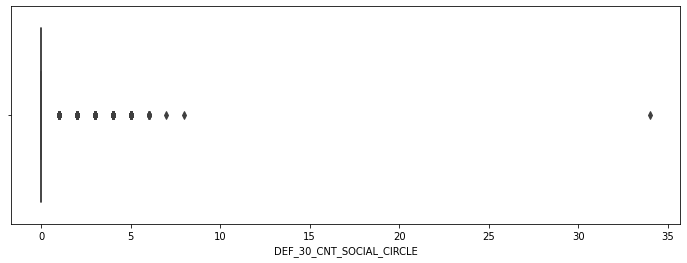

In [95]:
plt.figure(figsize=(12,4))
sns.boxplot(df_application_current_copy['DEF_30_CNT_SOCIAL_CIRCLE'])
plt.show()

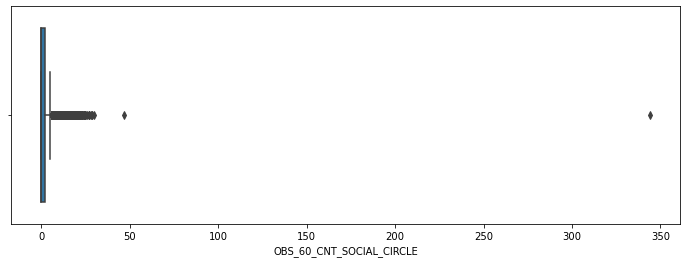

In [96]:
plt.figure(figsize=(12,4))
sns.boxplot(df_application_current_copy['OBS_60_CNT_SOCIAL_CIRCLE'])
plt.show()

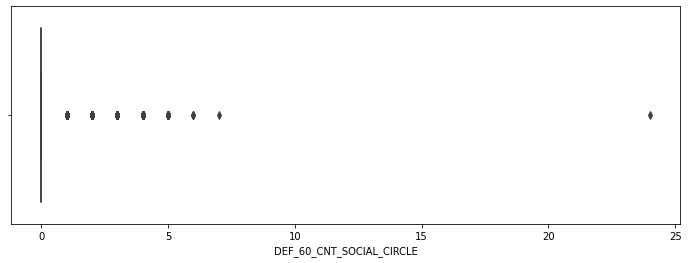

In [97]:
plt.figure(figsize=(12,4))
sns.boxplot(df_application_current_copy['DEF_60_CNT_SOCIAL_CIRCLE'])
plt.show()

In [92]:
print('OBS_30_CNT_SOCIAL_CIRCLE:', df_application_current_copy['OBS_30_CNT_SOCIAL_CIRCLE'].mode()[0])
print('DEF_30_CNT_SOCIAL_CIRCLE:', df_application_current_copy['DEF_30_CNT_SOCIAL_CIRCLE'].mode()[0])
print('OBS_60_CNT_SOCIAL_CIRCLE:', df_application_current_copy['OBS_60_CNT_SOCIAL_CIRCLE'].mode()[0])
print('DEF_60_CNT_SOCIAL_CIRCLE:', df_application_current_copy['DEF_60_CNT_SOCIAL_CIRCLE'].mode()[0])

OBS_30_CNT_SOCIAL_CIRCLE: 0.0
DEF_30_CNT_SOCIAL_CIRCLE: 0.0
OBS_60_CNT_SOCIAL_CIRCLE: 0.0
DEF_60_CNT_SOCIAL_CIRCLE: 0.0


For categorical vriable the value which should be imputed with maximum in frequency. <br>
So the value to be imputed are: <br>
OBS_30_CNT_SOCIAL_CIRCLE: 0.0 <br>
DEF_30_CNT_SOCIAL_CIRCLE: 0.0 <br>
OBS_60_CNT_SOCIAL_CIRCLE: 0.0 <br>
DEF_60_CNT_SOCIAL_CIRCLE: 0.0 

Since the maximum occurring values for these columns is 0 so all the missing values should be imputed with 0

In [98]:
print('AMT_REQ_CREDIT_BUREAU_MON:', df_application_current_copy['AMT_REQ_CREDIT_BUREAU_MON'].mode()[0])
print('AMT_REQ_CREDIT_BUREAU_WEEK:', df_application_current_copy['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()[0])
print('AMT_REQ_CREDIT_BUREAU_DAY:', df_application_current_copy['AMT_REQ_CREDIT_BUREAU_DAY'].mode()[0])
print('AMT_REQ_CREDIT_BUREAU_HOUR:', df_application_current_copy['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()[0])
print('AMT_REQ_CREDIT_BUREAU_QRT:', df_application_current_copy['AMT_REQ_CREDIT_BUREAU_QRT'].mode()[0])
print('AMT_REQ_CREDIT_BUREAU_YEAR:', df_application_current_copy['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()[0])


AMT_REQ_CREDIT_BUREAU_MON: 0.0
AMT_REQ_CREDIT_BUREAU_WEEK: 0.0
AMT_REQ_CREDIT_BUREAU_DAY: 0.0
AMT_REQ_CREDIT_BUREAU_HOUR: 0.0
AMT_REQ_CREDIT_BUREAU_QRT: 0.0
AMT_REQ_CREDIT_BUREAU_YEAR: 0.0


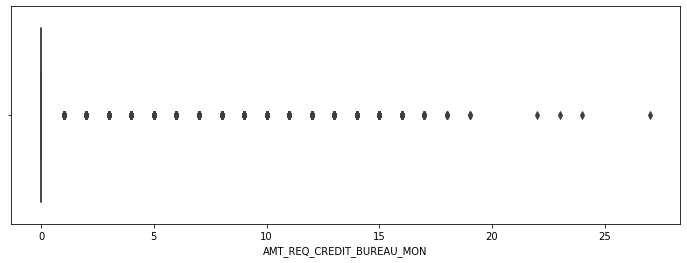

In [101]:
plt.figure(figsize=(12,4))
sns.boxplot(df_application_current_copy['AMT_REQ_CREDIT_BUREAU_MON'])
plt.show()

In [104]:
print(df_application_current_copy['AMT_REQ_CREDIT_BUREAU_MON'].value_counts())
print(df_application_current_copy['AMT_REQ_CREDIT_BUREAU_MON'].describe())

0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
27.0         1
22.0         1
23.0         1
24.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64
count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64


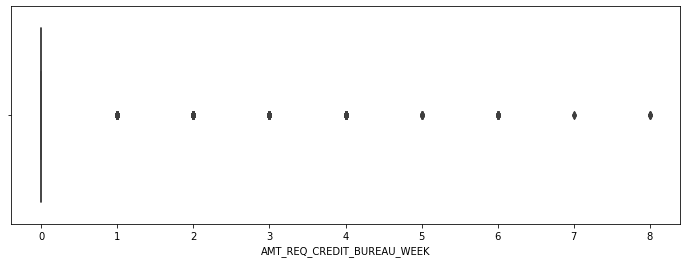

In [102]:
plt.figure(figsize=(12,4))
sns.boxplot(df_application_current_copy['AMT_REQ_CREDIT_BUREAU_WEEK'])
plt.show()

In [105]:
print(df_application_current_copy['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts())
print(df_application_current_copy['AMT_REQ_CREDIT_BUREAU_WEEK'].describe())

0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64
count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64


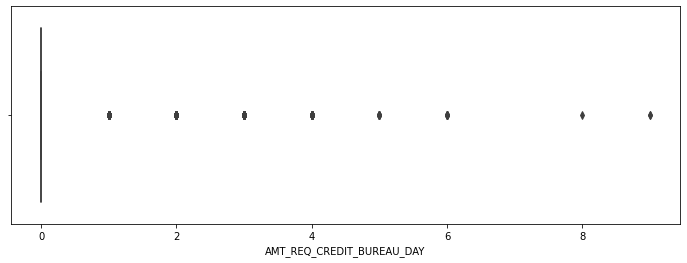

In [106]:
plt.figure(figsize=(12,4))
sns.boxplot(df_application_current_copy['AMT_REQ_CREDIT_BUREAU_DAY'])
plt.show()

In [107]:
print(df_application_current_copy['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts())
print(df_application_current_copy['AMT_REQ_CREDIT_BUREAU_DAY'].describe())

0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64
count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64


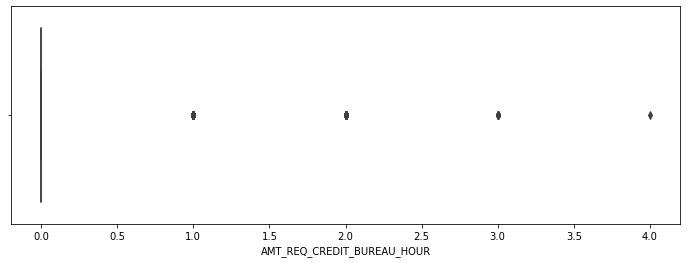

In [108]:
plt.figure(figsize=(12,4))
sns.boxplot(df_application_current_copy['AMT_REQ_CREDIT_BUREAU_HOUR'])
plt.show()

In [109]:
print(df_application_current_copy['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts())
print(df_application_current_copy['AMT_REQ_CREDIT_BUREAU_HOUR'].describe())

0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64
count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64


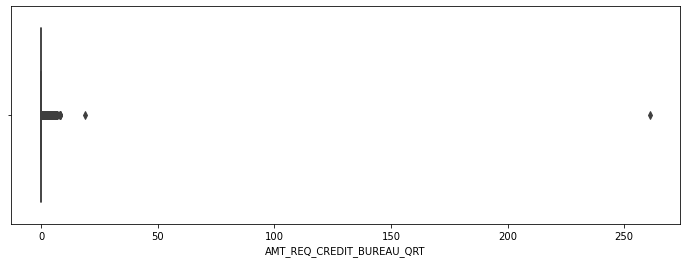

In [110]:
plt.figure(figsize=(12,4))
sns.boxplot(df_application_current_copy['AMT_REQ_CREDIT_BUREAU_QRT'])
plt.show()

In [111]:
print(df_application_current_copy['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts())
print(df_application_current_copy['AMT_REQ_CREDIT_BUREAU_QRT'].describe())

0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
19.0          1
261.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64
count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64


**For column AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_QRT we have two approaches either exclude missing values or impute the column with value 0 which is present in maximum rows. Hence, the recommended imputation technique is replacing null by the mode which is 0**

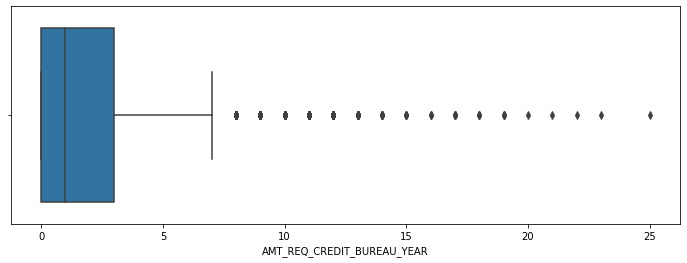

In [114]:
plt.figure(figsize=(12,4))
sns.boxplot(df_application_current_copy['AMT_REQ_CREDIT_BUREAU_YEAR'])
plt.show()

In [113]:
print(df_application_current_copy['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts())
print(df_application_current_copy['AMT_REQ_CREDIT_BUREAU_YEAR'].describe())

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
18.0        4
19.0        4
16.0        3
25.0        1
21.0        1
22.0        1
20.0        1
23.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64
count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64


For the column AMT_REQ_CREDIT_BUREAU_YEAR :Values - 0,1,2,3,4,5 are present in a significant number. Hence, imputing null values can significantly change column statistics and hence, the best approach would be to remove these rows

In [115]:
df_application_current_copy.shape

(307511, 81)

# **Identifying Outliers for Numerical columns**

For the outlier analysis of numerical columns, we will focus on <br>
AMT_GOODS_PRICE<br>
AMT_INCOME_TOTAL<br>
AMT_CREDIT<br>
AMT_ANNUITY<br>
FLOORSMAX_AVG

**Outlier analysis for AMT_GOODS_PRICE**

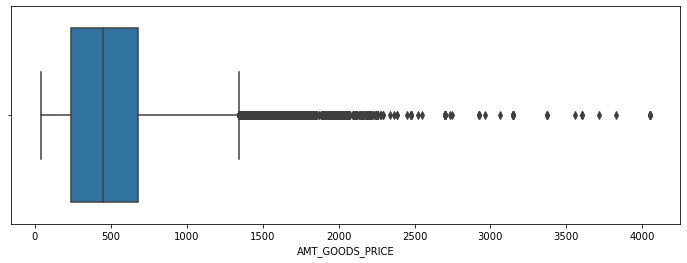

count    307233.000000
mean        538.396207
std         369.446461
min          40.500000
25%         238.500000
50%         450.000000
75%         679.500000
max        4050.000000
Name: AMT_GOODS_PRICE, dtype: float64
Upper Limit 1341.0
Outlier % 4.79


In [126]:
#Dividing the amount by 1000 for ease of calculation
plt.figure(figsize=(12,4))
sns.boxplot(df_application_current_copy['AMT_GOODS_PRICE']/1000.0)
plt.show()
# checking column statistics
print((df_application_current_copy['AMT_GOODS_PRICE']/1000.0).describe())

# Maximum value for boxplot
IQR_AMT_GOODS_PRICE = (df_application_current_copy['AMT_GOODS_PRICE']/1000).quantile(0.75) - (df_application_current_copy['AMT_GOODS_PRICE']/1000).quantile(0.25)
Upper_limit_IQR_AMT_GOODS_PRICE = (df_application_current_copy['AMT_GOODS_PRICE']/1000).quantile(0.75) + IQR_AMT_GOODS_PRICE*1.5
print('Upper Limit',Upper_limit_IQR_AMT_GOODS_PRICE)

# percentage of outliers in AMT_GOODS_PRICE
print('Outlier %',round(100.0 * len(df_application_current_copy[(df_application_current_copy['AMT_GOODS_PRICE']/1000)>Upper_limit_IQR_AMT_GOODS_PRICE])/len(df_application_current_copy), 2))

**Outlier analysis for AMT_INCOME_TOTAL**

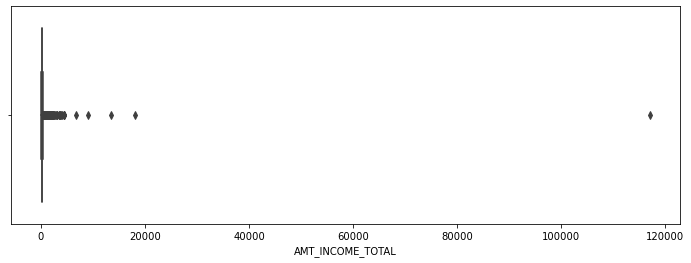

count    307511.000000
mean        168.797919
std         237.123146
min          25.650000
25%         112.500000
50%         147.150000
75%         202.500000
max      117000.000000
Name: AMT_INCOME_TOTAL, dtype: float64
Upper Limit 337.5
Outlier % 4.56


In [127]:
#Dividing the amount by 1000 for ease of calculation
plt.figure(figsize=(12,4))
sns.boxplot(df_application_current_copy['AMT_INCOME_TOTAL']/1000.0)
plt.show()
# checking column statistics
print((df_application_current_copy['AMT_INCOME_TOTAL']/1000.0).describe())

# Maximum value for boxplot
IQR_AMT_INCOME_TOTAL = (df_application_current_copy['AMT_INCOME_TOTAL']/1000).quantile(0.75) - (df_application_current_copy['AMT_INCOME_TOTAL']/1000).quantile(0.25)
Upper_limit_IQR_AMT_INCOME_TOTAL = (df_application_current_copy['AMT_INCOME_TOTAL']/1000).quantile(0.75) + IQR_AMT_INCOME_TOTAL*1.5
print('Upper Limit',Upper_limit_IQR_AMT_INCOME_TOTAL)

# percentage of outliers in AMT_INCOME_TOTAL
print('Outlier %',round(100.0 * len(df_application_current_copy[(df_application_current_copy['AMT_INCOME_TOTAL']/1000)>Upper_limit_IQR_AMT_INCOME_TOTAL])/len(df_application_current_copy), 2))

**Outlier analysis for AMT_CREDIT**

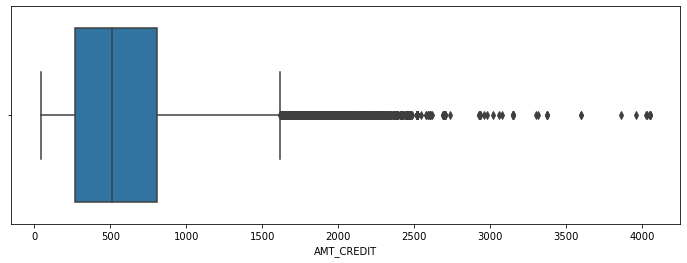

count    307511.000000
mean        599.026000
std         402.490777
min          45.000000
25%         270.000000
50%         513.531000
75%         808.650000
max        4050.000000
Name: AMT_CREDIT, dtype: float64
Upper Limit 1616.625
Outlier % 2.13


In [128]:
#Dividing the amount by 1000 for ease of calculation
plt.figure(figsize=(12,4))
sns.boxplot(df_application_current_copy['AMT_CREDIT']/1000.0)
plt.show()
# checking column statistics
print((df_application_current_copy['AMT_CREDIT']/1000.0).describe())

# Maximum value for boxplot
IQR_AMT_CREDIT = (df_application_current_copy['AMT_CREDIT']/1000).quantile(0.75) - (df_application_current_copy['AMT_CREDIT']/1000).quantile(0.25)
Upper_limit_IQR_AMT_CREDIT = (df_application_current_copy['AMT_CREDIT']/1000).quantile(0.75) + IQR_AMT_CREDIT*1.5
print('Upper Limit',Upper_limit_IQR_AMT_CREDIT)

# percentage of outliers in AMT_CREDIT
print('Outlier %',round(100.0 * len(df_application_current_copy[(df_application_current_copy['AMT_CREDIT']/1000)>Upper_limit_IQR_AMT_CREDIT])/len(df_application_current_copy), 2))

**Outlier analysis for AMT_ANNUITY**

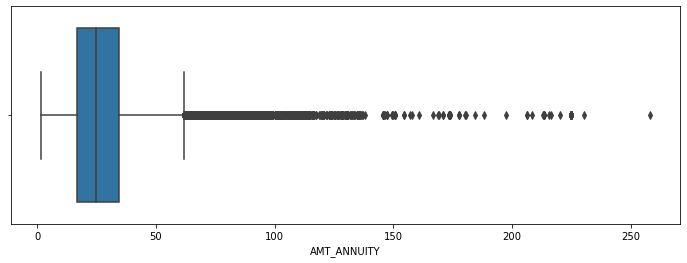

count    307499.000000
mean         27.108574
std          14.493737
min           1.615500
25%          16.524000
50%          24.903000
75%          34.596000
max         258.025500
Name: AMT_ANNUITY, dtype: float64
Upper Limit 61.70399999999999
Outlier % 2.44


In [129]:
#Dividing the amount by 1000 for ease of calculation
plt.figure(figsize=(12,4))
sns.boxplot(df_application_current_copy['AMT_ANNUITY']/1000.0)
plt.show()
# checking column statistics
print((df_application_current_copy['AMT_ANNUITY']/1000.0).describe())

# Maximum value for boxplot
IQR_AMT_ANNUITY = (df_application_current_copy['AMT_ANNUITY']/1000).quantile(0.75) - (df_application_current_copy['AMT_ANNUITY']/1000).quantile(0.25)
Upper_limit_IQR_AMT_ANNUITY = (df_application_current_copy['AMT_ANNUITY']/1000).quantile(0.75) + IQR_AMT_ANNUITY*1.5
print('Upper Limit',Upper_limit_IQR_AMT_ANNUITY)

# percentage of outliers in AMT_ANNUITY
print('Outlier %',round(100.0 * len(df_application_current_copy[(df_application_current_copy['AMT_ANNUITY']/1000)>Upper_limit_IQR_AMT_ANNUITY])/len(df_application_current_copy), 2))

**Outlier analysis for FLOORSMAX_AVG**

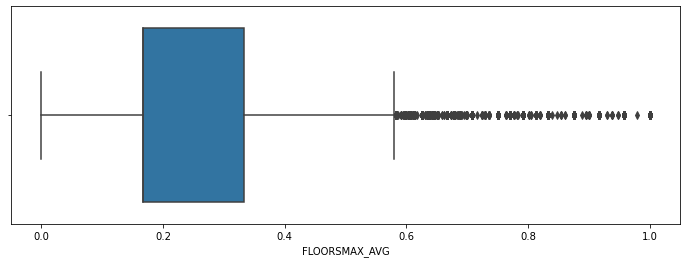

count    154491.000000
mean          0.226282
std           0.144641
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_AVG, dtype: float64
Upper Limit 0.5831999999999999
Outlier % 1.7


In [130]:
#Dividing the amount by 1000 for ease of calculation
plt.figure(figsize=(12,4))
sns.boxplot(df_application_current_copy['FLOORSMAX_AVG'])
plt.show()
# checking column statistics
print((df_application_current_copy['FLOORSMAX_AVG']).describe())

# Maximum value for boxplot
IQR_FLOORSMAX_AVG = (df_application_current_copy['FLOORSMAX_AVG']).quantile(0.75) - (df_application_current_copy['FLOORSMAX_AVG']).quantile(0.25)
Upper_limit_IQR_FLOORSMAX_AVG = (df_application_current_copy['FLOORSMAX_AVG']).quantile(0.75) + IQR_FLOORSMAX_AVG*1.5
print('Upper Limit',Upper_limit_IQR_FLOORSMAX_AVG)

# percentage of outliers in FLOORSMAX_AVG
print('Outlier %',round(100.0 * len(df_application_current_copy[(df_application_current_copy['FLOORSMAX_AVG'])>Upper_limit_IQR_FLOORSMAX_AVG])/len(df_application_current_copy), 2))

# Binning of AGE, AMT_INCOME_TOTAL columns

'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE' columns are having -ve value, which needs to converted to +ve value.

In [134]:
df_application_current_copy['DAYS_BIRTH'] = df_application_current_copy['DAYS_BIRTH'].abs()
df_application_current_copy['DAYS_EMPLOYED'] = df_application_current_copy['DAYS_EMPLOYED'].abs()
df_application_current_copy['DAYS_REGISTRATION'] = df_application_current_copy['DAYS_REGISTRATION'].abs()
df_application_current_copy['DAYS_ID_PUBLISH'] = df_application_current_copy['DAYS_ID_PUBLISH'].abs()
df_application_current_copy['DAYS_LAST_PHONE_CHANGE'] = df_application_current_copy['DAYS_LAST_PHONE_CHANGE'].abs()

All the dates are in days so dividing it with 365 to convert to years

In [135]:
df_application_current_copy['AGE'] = abs(df_application_current_copy['DAYS_BIRTH']//365)
df_application_current_copy['YEARS_EMPLOYED'] = abs(df_application_current_copy['DAYS_EMPLOYED']//365)
df_application_current_copy['YEARS_REGISTRATION'] = abs(df_application_current_copy['DAYS_REGISTRATION']//365)
df_application_current_copy['YEARS_ID_PUBLISH'] = abs(df_application_current_copy['DAYS_ID_PUBLISH']//365)
df_application_current_copy['YEARS_LAST_PHONE_CHANGE'] = abs(df_application_current_copy['DAYS_LAST_PHONE_CHANGE']//365)

In [136]:
df_application_current_copy.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25,1,9.0,5,3.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45,3,3.0,0,2.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52,0,11.0,6,2.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,52,8,26.0,6,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,54,8,11.0,9,3.0


Now 'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE' columns are no more required so dropping these columns

In [143]:
drop_date_cols=['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']
df_application_current_copy=df_application_current_copy.drop(columns=drop_date_cols,axis=1)
df_application_current_copy.shape

(307511, 81)

In [144]:
df_application_current_copy.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25,1,9.0,5,3.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45,3,3.0,0,2.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52,0,11.0,6,2.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,52,8,26.0,6,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,54,8,11.0,9,3.0


**Create bins for AGE**

In [145]:
# 1. AGE column can be binned 0-10,10-20,20-30,30-40, 40-50 and so on
df_application_current_copy['AGE_GROUP'] = pd.cut(x=df_application_current_copy.AGE, bins=[0,19,29, 39, 49, 59,69,79,89], labels=['10s','20s', '30s', '40s' ,'50s', '60s','70s', '80s'])
df_application_current_copy.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE,AGE_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25,1,9.0,5,3.0,20s
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45,3,3.0,0,2.0,40s
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52,0,11.0,6,2.0,50s
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,52,8,26.0,6,1.0,50s
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,54,8,11.0,9,3.0,50s


**Create bins for AMT_INCOME_TOTAL**

In [146]:
# 2. AMT_INCOME_TOTAL column can be binned 'Low','Average', 'Good', 'Best' ,'High', 'Very High'
df_application_current_copy['AMT_CATEGORY'] = pd.cut(x=df_application_current_copy.AMT_INCOME_TOTAL, bins=[0,100000, 200000, 300000, 400000, 500000, 600000], labels=['Low','Average', 'Good', 'Best' ,'High', 'Very High'])
df_application_current_copy.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE,AGE_GROUP,AMT_CATEGORY
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25,1,9.0,5,3.0,20s,Good
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45,3,3.0,0,2.0,40s,Good
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52,0,11.0,6,2.0,50s,Low
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,52,8,26.0,6,1.0,50s,Average
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,54,8,11.0,9,3.0,50s,Average


In [155]:
df_application_current_copy.shape

(307511, 83)

# Checking Data Imbalence

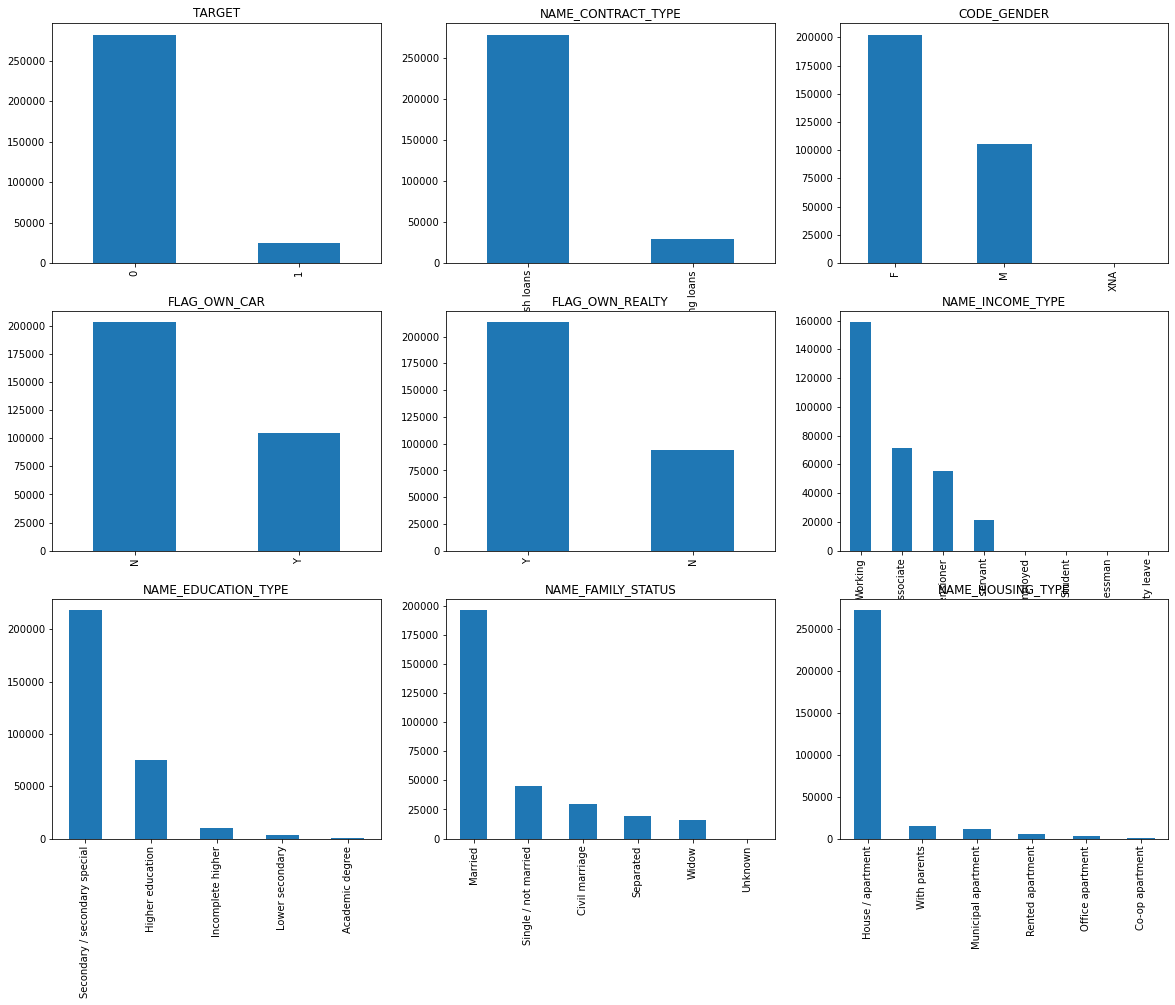

In [156]:
# Listing columns for checking data imbalance and plotting them
col_list = ['TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE',
            'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']
k=0
plt.figure(figsize=(20,15))
for col in col_list:    
    k=k+1
    plt.subplot(3, 3,k)    
    df_application_current_copy[col].value_counts().plot(kind='bar');
    plt.title(col)

**We can see that there is data imbalance in below columns:-**
<br>
TARGET - There are very few defaulters(1) compare to non defaulters(0)<br>
NAME_CONTRACT_TYPE - There are very few Revolving loans than Cash loans<br>
NAME_EDUCATION_TYPE - Most of the loans applied by Secondary/Secondary special educated people<br>
NAME_FAMILY_STATUS - Most of the loans applied by Married people.<br>
NAME_HOUSING_TYPE - Most of the application came from Home/appartment owner

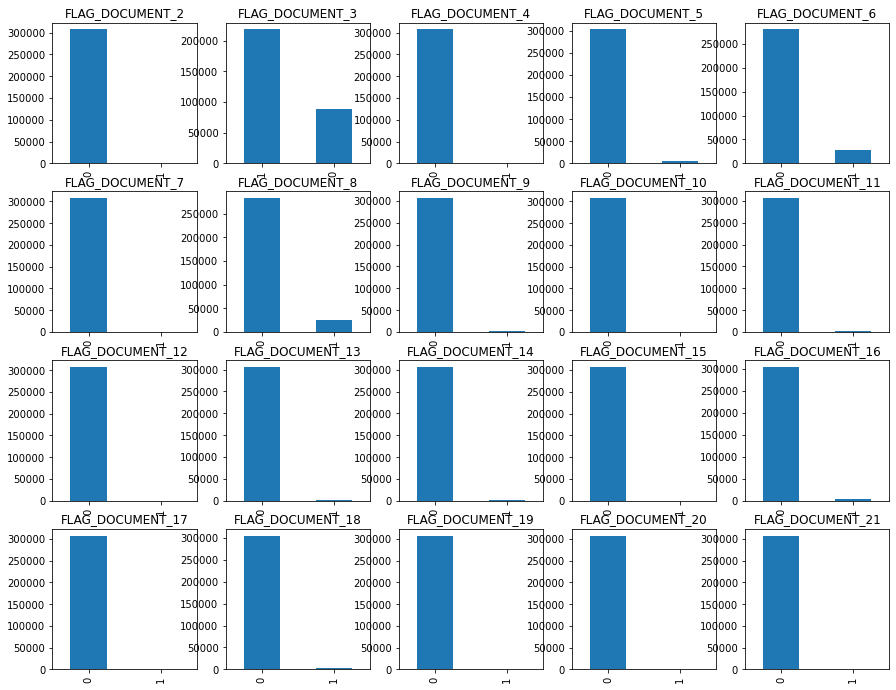

In [157]:
# Plotting all the FLAG_DOCUMENT columns to check data imbalance
k=0
plt.figure(figsize=(15,15))
for i in range(2,22) :    
    k=k+1
    plt.subplot(5, 5,k)    
    col_name = 'FLAG_DOCUMENT_'+str(i)
    df_application_current_copy[col_name].value_counts().plot(kind='bar');
    plt.title(col_name)

As we can see that except FLAG_DOCUMENT_3 all the columns have negligible count of 1s. So we are removing all the FLAG_DOCUMENT columns except FLAG_DOCUMENT_3

In [162]:
# Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)

target0_df=df_application_current_copy.loc[df_application_current_copy["TARGET"]==0]
target1_df=df_application_current_copy.loc[df_application_current_copy["TARGET"]==1]


percentage_defaulters= round(100*len(target1_df)/(len(target0_df)+len(target1_df)),2)

percentage_nondefaulters=round(100*len(target0_df)/(len(target0_df)+len(target1_df)),2)

print('Count of target0_df:', len(target0_df))
print('Count of target1_df:', len(target1_df))


print('Percentage of people who paid their loan are: ', percentage_nondefaulters, '%' )
print('Percentage of people who did not paid their loan are: ', percentage_defaulters, '%' )

Count of target0_df: 282686
Count of target1_df: 24825
Percentage of people who paid their loan are:  91.93 %
Percentage of people who did not paid their loan are:  8.07 %


As the percentage of Target =0 and Target =1 are different, there is an imbalance

### **Imbalence Ratio**

In [253]:
imb_ratio = round(len(target0_df)/len(target1_df),2)

print('Imbalance Ratio:', imb_ratio)

Imbalance Ratio: 11.39


## For further analysis, we will remove irrelevant columns and continue analysis with a few selected columns

In [159]:
# list of columns to be dropped
drop_columns = ['FLAG_CONT_MOBILE',
                'FLAG_MOBIL',
                'FLAG_EMP_PHONE',
                'FLAG_WORK_PHONE',
                'FLAG_PHONE',
                'FLAG_EMAIL',
                'HOUR_APPR_PROCESS_START',
                'WEEKDAY_APPR_PROCESS_START',
                'FLOORSMAX_AVG',
                'EXT_SOURCE_2',
                'EXT_SOURCE_3',
                'FLOORSMAX_AVG',
                'FLOORSMAX_MODE',
                'FLOORSMAX_MEDI',
                'TOTALAREA_MODE',
                'EMERGENCYSTATE_MODE',
                'REGION_POPULATION_RELATIVE',
                'YEARS_BEGINEXPLUATATION_AVG',
                'YEARS_BEGINEXPLUATATION_MEDI',
                'YEARS_BEGINEXPLUATATION_MODE',
                'REG_REGION_NOT_LIVE_REGION',
                'REG_REGION_NOT_WORK_REGION',
                'LIVE_REGION_NOT_WORK_REGION',
                'REG_CITY_NOT_LIVE_CITY',
                'REG_CITY_NOT_WORK_CITY',
                'LIVE_CITY_NOT_WORK_CITY',
                'FLAG_DOCUMENT_2',
                'FLAG_DOCUMENT_4',
                'FLAG_DOCUMENT_5',
                'FLAG_DOCUMENT_6',
                'FLAG_DOCUMENT_7',
                'FLAG_DOCUMENT_8',
                'FLAG_DOCUMENT_9',
                'FLAG_DOCUMENT_10',
                'FLAG_DOCUMENT_11',
                'FLAG_DOCUMENT_12',
                'FLAG_DOCUMENT_13',
                'FLAG_DOCUMENT_14',
                'FLAG_DOCUMENT_15',
                'FLAG_DOCUMENT_16',
                'FLAG_DOCUMENT_17',
                'FLAG_DOCUMENT_18',
                'FLAG_DOCUMENT_19',
                'FLAG_DOCUMENT_20',
                'FLAG_DOCUMENT_21'
               ]

**Dropping all the unwanted columns from Target1 data**

In [169]:
target1_df_2 = target1_df.drop(columns=drop_columns, axis=1)
target1_df_2.shape

(24825, 39)

**Dropping all the unwanted columns from Target0 data**

In [171]:
target0_df_2 = target0_df.drop(columns=drop_columns, axis=1)
target0_df_2.shape

(282686, 39)

# Analysis

**Comparison of defaulters and non-defaulters on the basis of gender**

[Text(0.5, 0, 'Gender')]

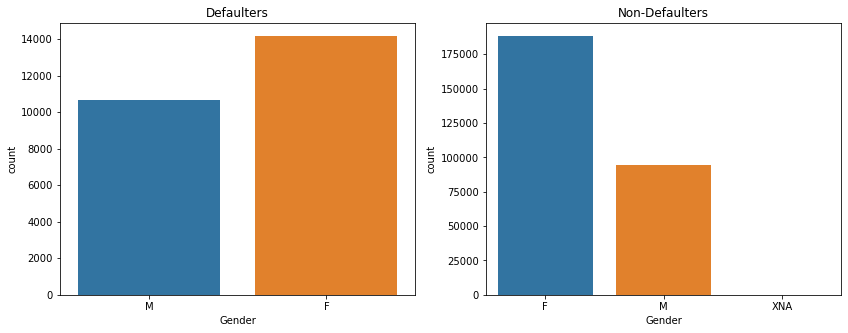

In [172]:
# Plotting two plots for delaulters and non defaulters on basis of gender
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'CODE_GENDER',data=target1_df_2)
plt.title('Defaulters')
ax.set(xlabel='Gender')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'CODE_GENDER',data=target0_df_2)
plt.title('Non-Defaulters')
ax.set(xlabel='Gender')

**Insights**<br>
Defaluters - We can see that females are more in number of defaulters than male.<br>
Non-defaluters - The same pattern continues for non-defaluters as well. The females are more in number here than male.

**Comparison of defaulters and non-defaulters on the basis of Loan Type**

[Text(0.5, 0, 'Loan type')]

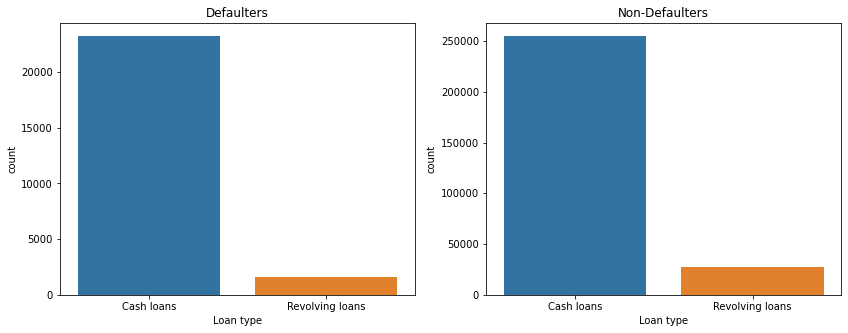

In [177]:
# Plotting two plots for delaulters and non defaulters on basis of gender
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_CONTRACT_TYPE',data=target1_df_2)
plt.title('Defaulters')
ax.set(xlabel='Loan type')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_CONTRACT_TYPE',data=target0_df_2)
plt.title('Non-Defaulters')
ax.set(xlabel='Loan type')

**Insights**<br>
We see in both the cases that Revolving loans are very less in number compared to Cash loans.

**Comparison of Defaulters and non-defaulters on the basis of Income type**

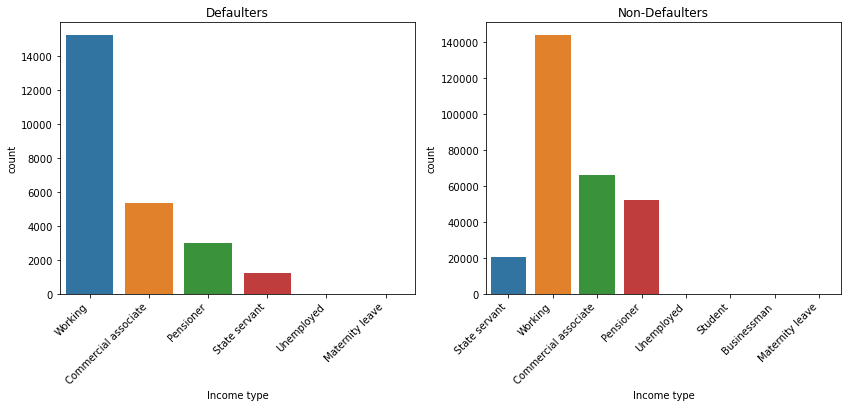

In [178]:
# Plotting two plots for delaulters and non defaulters on basis of gender
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_INCOME_TYPE',data=target1_df_2)
plt.title('Defaulters')
ax.set(xlabel='Income type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_INCOME_TYPE',data=target0_df_2)
plt.title('Non-Defaulters')
ax.set(xlabel='Income type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


**Insights**<br>
Defaulters - Working people are mostly defaulted as their numbers are high with compare to other professions.<br>
Non-defaulters - Similarly here also working people are more in number who are not defaulted.

**Comparison of Defaulters and non-defaulters on the basis of Education type**

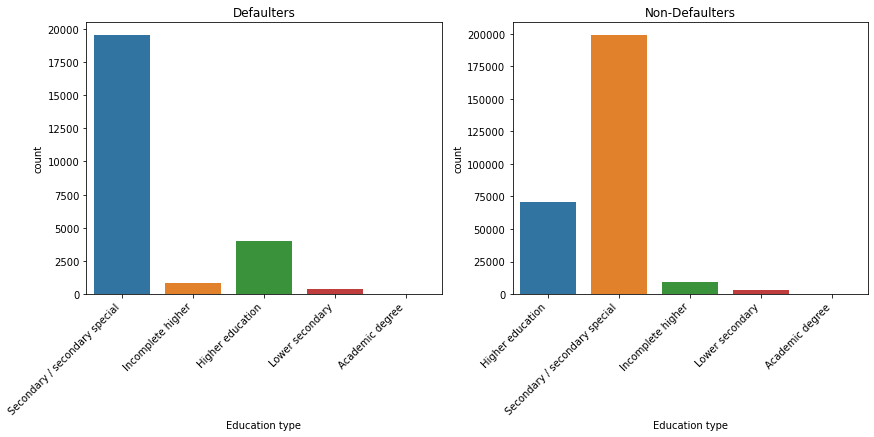

In [179]:
# Plotting two plots for delaulters and non defaulters on basis of gender
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_EDUCATION_TYPE',data=target1_df_2)
plt.title('Defaulters')
ax.set(xlabel='Education type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_EDUCATION_TYPE',data=target0_df_2)
plt.title('Non-Defaulters')
ax.set(xlabel='Education type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


**Insights**<br>
Defaulters - Education with Secondary/Secondary sepcial customers are more number in defaulters comapre with other level of eduacted poeple.<br>
Non defaulters - Here also Secondary/Secondary sepcial are more in numbers.

**Comparison of Defaulters and non-defaulters on the basis of AGE_GROUP**

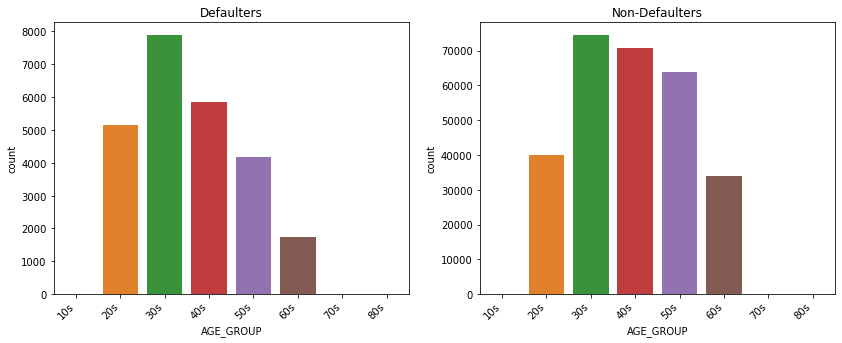

In [182]:
# Plotting two plots for delaulters and non defaulters on basis of gender
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'AGE_GROUP',data=target1_df_2)
plt.title('Defaulters')
ax.set(xlabel='AGE_GROUP')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


plt.subplot(1,2,2) 
ax = sns.countplot(x = 'AGE_GROUP',data=target0_df_2)
plt.title('Non-Defaulters')
ax.set(xlabel='AGE_GROUP')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

**Insights**<br>
Defaulters - Customers who are in their early days in career(specially in 30's) are more number in defaulters comapre with other Age group. Older people are less likely to be defaulter<br>
Non defaulters - Here also the same trend is followed.

**Comparison of Defaulters and non-defaulters on the basis of AMT_INCOME_TOTAL**

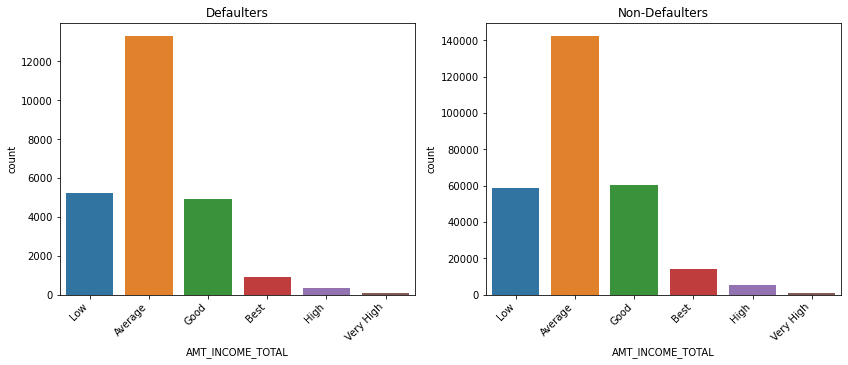

In [185]:
# Plotting two plots for delaulters and non defaulters on basis of gender
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'AMT_CATEGORY',data=target1_df_2)
plt.title('Defaulters')
ax.set(xlabel='AMT_INCOME_TOTAL')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


plt.subplot(1,2,2) 
ax = sns.countplot(x = 'AMT_CATEGORY',data=target0_df_2)
plt.title('Non-Defaulters')
ax.set(xlabel='AMT_INCOME_TOTAL')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

**Insights**<br>
Defaulters - Customers who are average income group are most likely to be defaulter and who are in best,high and very high income group are less likely defaulter<br>
Non defaulters - Here also the same trend is followed.

**Comparison of Defaulters and non-defaulters on the basis of NAME_FAMILY_STATUS**

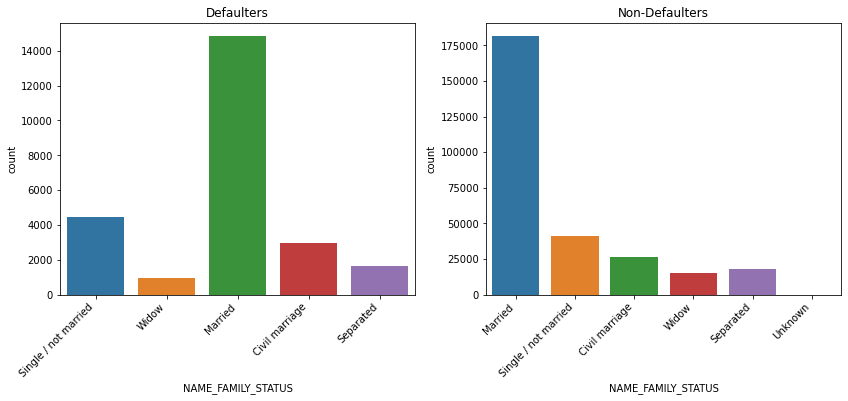

In [186]:
# Plotting two plots for delaulters and non defaulters on basis of gender
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_FAMILY_STATUS',data=target1_df_2)
plt.title('Defaulters')
ax.set(xlabel='NAME_FAMILY_STATUS')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_FAMILY_STATUS',data=target0_df_2)
plt.title('Non-Defaulters')
ax.set(xlabel='NAME_FAMILY_STATUS')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

**Insights**<br>
Defaulters - Customers who are married are most likely to be defaulter <br>
Non defaulters - Here also the same trend is followed.

**Comparison of Defaulters and non-defaulters on the basis of NAME_HOUSING_TYPE**

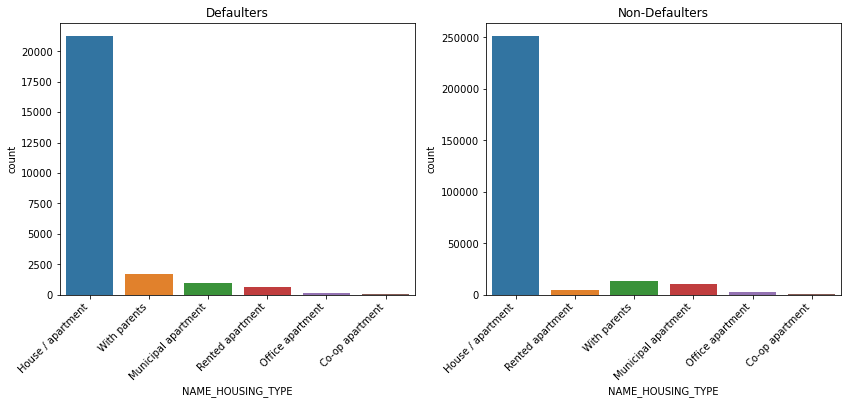

In [188]:
# Plotting two plots for delaulters and non defaulters on basis of gender
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_HOUSING_TYPE',data=target1_df_2)
plt.title('Defaulters')
ax.set(xlabel='NAME_HOUSING_TYPE')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_HOUSING_TYPE',data=target0_df_2)
plt.title('Non-Defaulters')
ax.set(xlabel='NAME_HOUSING_TYPE')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

**Insights**<br>
Defaulters - Customers who are owining a house/apartment are most likely to be defaulter <br>
Non defaulters - Here also the same trend is followed.

**Comparison of Defaulters and non-defaulters on the basis of FLAG_OWN_CAR**

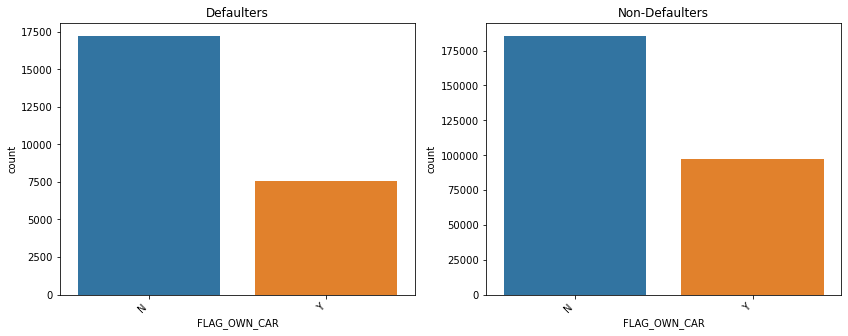

In [189]:
# Plotting two plots for delaulters and non defaulters on basis of gender
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'FLAG_OWN_CAR',data=target1_df_2)
plt.title('Defaulters')
ax.set(xlabel='FLAG_OWN_CAR')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


plt.subplot(1,2,2) 
ax = sns.countplot(x = 'FLAG_OWN_CAR',data=target0_df_2)
plt.title('Non-Defaulters')
ax.set(xlabel='FLAG_OWN_CAR')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

**Insights**<br>
Defaulters - Customers who are not owining a car are most likely to be defaulter <br>
Non defaulters - Here also the same trend is followed.

**Comparison of Defaulters and non-defaulters on the basis of OCCUPATION_TYPE**

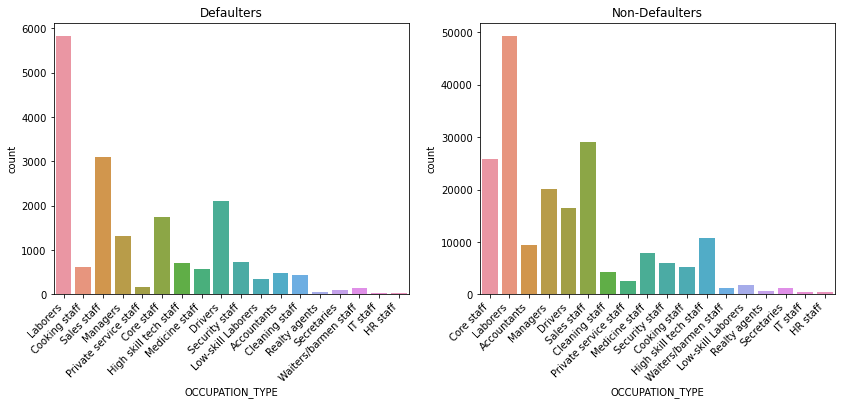

In [190]:
# Plotting two plots for delaulters and non defaulters on basis of gender
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'OCCUPATION_TYPE',data=target1_df_2)
plt.title('Defaulters')
ax.set(xlabel='OCCUPATION_TYPE')data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA0oAAAGVCAYAAADALQE+AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8QVMy6AAAACXBIWXMAAAsTAAALEwEAmpwYAACCjElEQVR4nO3deZgcVdXH8e9Jwg4hBEIICRAERPYt7LIruxD2oMgqCIIsgrK9CipReGVREFCUHWWRRXABBQRXBILsm0RBQLawKfoqCpz3j3OaqRQ9093T1TOTmd/nefqZ6eqq27e6qu6pe+vWLXN3REREREREpMuw/s6AiIiIiIjIQKOKkoiIiIiISIkqSiIiIiIiIiWqKImIiIiIiJSooiQiIiIiIlKiipKIiIiIiEiJKkoiHWZmB5nZi2b2DzNbsM20njKzD1WVNxERkd4ysx3M7JmMb6u1mdbtZvaJqvImUgVVlEQayMrJv8zsDTN73cx+Z2YHmlnD48fMZgNOBzZ393nd/ZUK83WimV1WVXoiItK/Mt68aGbzFKZ9wsxu78B33W5m/87Y9nczu8fMjjGzOVpI5lTgkIxv91aYt73N7DdVpSfSW6ooiTTnI+4+H7AEcDJwNHB+E8uNBeYEHu5g3nrFzEb0dx5EROQ9RgCH9dF3HZKxbRxwJDAF+KmZWZPLL4HimwxiqiiJtMDd/+buNwC7AXuZ2YpmNoeZnWpmT2dL4LfMbC4zez/weC76upn9AsDMvpFdFWoteBvU0jezi8zspML7jc3s2XI+zGxL4Dhgt+zycH9On9/Mzjez583sr2Z2kpkNz8/2NrPfmtkZZvYqcKKZLW1mvzSzv5nZy2Z2ZYd+OhERac7XgKPMbFT5AzNbz8zuzjL7bjNbr/DZ7Wb25Szn3zCzn5vZQs18obv/091vB7YD1gW2yTSH5VWmP5nZK2Z2lZmNzrj3D2A4cL+Z/Snnr837hpk9YmY7FPI3Uy8IM5toZl6u1JjZcsC3gHUzvr2e0+vG2vxsYzN71syONrMXgAvNbCEz+3H2BHnVzH7dTE8QkSLtMCK94O53Ac8CGwCnAO8HVgWWBsYDX3D3PwIr5CKj3H3T/P/unHc08H3gB2Y2Z4vffxPwFeDK7PKwSn50MfBW5mM1YHOg2Od7beDPwMLAVODLwM+BBYAJwFmt5ENERCo3DbgdOKo40cxGAz8BzgQWJLp1/8Rmvvf1o8A+RBk/ezmNRtz96fz+WgPeocBkYCNgUeA14Gx3f9Pd5815VnH3pfL/P+Wy8wNfBC4zs3Et5uFR4EDgjoxvo/KjurG2sOgiRFxdAjiAuEL2LDCG6N1xHOCt5EVEFSWR3nuOKJT3B45w91fd/Q2iAjOlu4Xc/TJ3f8Xd33L304A5gGXbzYyZjQW2Ag7P1sGXgDNKeXnO3c/K7/4X8F8iqCzq7v92d/UJFxHpf18APm1mYwrTtgGecPdLswy/HHgM+Ehhngvd/Y9Zvl9FVCpaVYttAJ8Ejnf3Z939TeBEYOfuura5+w/c/Tl3f8fdrwSeANbqRR5mkl0BG8Xad4ATshJXi2/jgCXc/b/u/mt3V0VJWqKKkkjvjSf6ks8N3JOX918HbiJasOoysyPN7NHsOvE60fLWVPeIBpYAZgOeL+Tl20TLYs0zpWU+Bxhwl5k9bGb7VpAPERFpg7s/BPwYOKYweVHgL6VZ/0LEopoXCv//HzAvQHZT+0e+jmvw9eOBV/P/JYDrCjHlUeBt4grNe5jZnmZ2X2H+Fakmvo2hcayd4e7/Lrz/GjAd+LmZ/dnMir+lSFNUURLpBTNbkwgmPwT+Bazg7qPyNX+hS0J5uQ2IgSB2BRbILgV/IyorAP8kgkHNIj1ko9wy9gzwJrBQIS8j3X2F7pZx9xfcfX93X5RoOTzHzJbu4TtFRKRvnEBcRalVhJ4jKi5FiwN/bZSQux+Y3djmdfevdDefmS0GrAH8Oic9A2xViCmj3H1Od3/Pd5rZEsB3gEOABTO+PUQ18e1lGsfacnx7w92PdPf3EVfdPmNmm/XwnSLvoYqSSAvMbKSZbQtcAVzm7vcTgeEMM1s45xlvZlt0k8R8xD1EM4ARZvYFYGTh8/uArfNm2UWAw3vIzovAxNrNqe7+PHG/0WmZz2FmtpSZbdTD+uxiZhPy7WtEoHm7h+8UEZE+4O7TgSuJ+4QAfgq838w+amYjzGw3YHniylNbzGzujBXXA3fld0EMqjA1K0GY2Rgz276bZOYhYsiMnHcf4opSzX3Ahma2uJnNDxzbQ5ZeBCaY2ewA7v4OrcVazGxbiwGLDPg7EdsU36QlqiiJNOdHZvYG0bp2PHET7T752dHE5f3fm9nfgVvo/p6jnwE3An8kukz8m5m7w10K3A88RVR6ehqF7gf59xUz+0P+vydxA+8jRMXnaqKPdnfWBO7M0YtuAA5z9yd7mF9ERPrOl4gKCPkcvm2JQQpeIbpOb+vuL7eR/jcztr0IfB24BtgyKyYA3yBiw89zvt8TgwK9h7s/ApwG3JHprQT8tvD5zURMewC4h54reL8ghh1/wcxq69dKrAVYJuf5R+bpnBzZT6RppvvaREREREREZqYrSiIiIiIiIiWqKImIiIiIiJSooiQiIiIiIlKiipKIiIiIiEiJKkoiIiIiIiIlI/o7A52y0EIL+cSJE/s7GyIiQ9o999zzsruP6e98DESKUyIi/a+nODVoK0oTJ05k2rRp/Z0NEZEhzcz+0t95GKgUp0RE+l9PcaqjXe/MbJSZXW1mj5nZo2a2rpmNNrObzeyJ/LtAYf5jzWy6mT1efNqyma1hZg/mZ2fmU5ZFREREREQ6otP3KH0DuMndPwCsAjwKHAPc6u7LALfme8xseWAKsAKwJXCOmQ3PdM4FDiCesrxMfi4iIiIiItIRHasomdlIYEPgfAB3/4+7vw5sD1ycs10MTM7/tweucPc33f1JYDqwlpmNA0a6+x3u7sAlhWVEREREREQq18krSu8DZgAXmtm9ZvZdM5sHGOvuzwPk34Vz/vHAM4Xln81p4/P/8vT3MLMDzGyamU2bMWNGtWsjIiIiIiJDRicrSiOA1YFz3X014J9kN7tu1LvvyHuY/t6J7ue5+yR3nzRmjAZZEhGRYGZP5b2u95nZtJxW2T2zZjaHmV2Z0+80s4l9vpIiIlKpTlaUngWedfc78/3VRMXpxexOR/59qTD/YoXlJwDP5fQJdaaLiIi0YhN3X9XdJ+X7Ku+Z3Q94zd2XBs4ATumD9RERkQ7qWEXJ3V8AnjGzZXPSZsAjwA3AXjltL+D6/P8GYEq2yi1JBKC7snveG2a2Trbc7VlYRkREpLeqvGe2mNbVwGYaoVVEZNbW6ecofRr4npnNDvwZ2IeonF1lZvsBTwO7ALj7w2Z2FVGZegs42N3fznQOAi4C5gJuzJeIiEizHPi5mTnwbXc/j9I9s2ZWvGf294Vla/fG/pfu75l99z5bd3/LzP4GLAi8XMyEmR1AXJFi8cUXr27tRESkch2tKLn7fcCkOh9t1s38U4GpdaZPA1asNHMiIjKUrO/uz2Vl6GYze6yHeXtzz2xT99NmBe08gEmTJtW931ZERAaGTj9HSUREpN+5+3P59yXgOmAtqr1n9t1lzGwEMD/waifWRURE+oYqSiIiMqiZ2TxmNl/tf2Bz4CGqvWe2mNbOwC/yPiYREZlFdfoepX4349zLer3smIP2qDAnIiLST8YC1+XYCiOA77v7TWZ2N9XdM3s+cKmZTSeuJE3pixWr54VzTuj1sot86osV5kREZNY26CtKIiIytLn7n4FV6kx/hYrumXX3f5MVLRERGRzU9U5ERERERKREFSUREREREZESVZRERERERERKVFESEREREREpUUVJRERERESkRBUlERERERGRElWURERERERESlRREhERERERKVFFSUREREREpEQVJRERERERkRJVlEREREREREpUURIRERERESlRRUlERERERKREFSUREREREZESVZRERERERERKVFESEREREREpUUVJRERERESkRBUlERERERGRElWURERERERESlRREhERERERKVFFSUREREREpEQVJRERERERkRJVlEREREREREpUURIRERERESlRRUlERERERKREFSUREREREZESVZRERERERERKVFESEREREREpUUVJRERERESkRBUlERERERGRElWURERERERESjpaUTKzp8zsQTO7z8ym5bTRZnazmT2RfxcozH+smU03s8fNbIvC9DUynelmdqaZWSfzLSIiIiIiQ1tfXFHaxN1XdfdJ+f4Y4FZ3Xwa4Nd9jZssDU4AVgC2Bc8xseC5zLnAAsEy+tuyDfIuIiIiIyBDVH13vtgcuzv8vBiYXpl/h7m+6+5PAdGAtMxsHjHT3O9zdgUsKy4iIiIiIiFSu0xUlB35uZveY2QE5bay7Pw+QfxfO6eOBZwrLPpvTxuf/5ekiIiIiIiIdMaLD6a/v7s+Z2cLAzWb2WA/z1rvvyHuY/t4EojJ2AMDiiy/eal5FRERERESADl9Rcvfn8u9LwHXAWsCL2Z2O/PtSzv4ssFhh8QnAczl9Qp3p9b7vPHef5O6TxowZU+WqiIiIiIjIENKxipKZzWNm89X+BzYHHgJuAPbK2fYCrs//bwCmmNkcZrYkMWjDXdk97w0zWydHu9uzsIyIiIiIiEjlOtn1bixwXY7kPQL4vrvfZGZ3A1eZ2X7A08AuAO7+sJldBTwCvAUc7O5vZ1oHARcBcwE35ktERERERKQjOlZRcvc/A6vUmf4KsFk3y0wFptaZPg1Yseo8ioiIiIiI1NMfw4OLiIiIiIgMaKooiYiIiIiIlKiiJCIiIiIiUqKKkoiIDHpmNtzM7jWzH+f70WZ2s5k9kX8XKMx7rJlNN7PHzWyLwvQ1zOzB/OzMHImVHK31ypx+p5lN7PMVFBGRyqmiJCIiQ8FhwKOF98cAt7r7MsCt+R4zWx6YAqwAbAmcY2bDc5lziYeaL5OvLXP6fsBr7r40cAZwSmdXRURE+oIqSiIiMqiZ2QRgG+C7hcnbAxfn/xcDkwvTr3D3N939SWA6sFY+IH2ku9/h7g5cUlqmltbVwGa1q00iIjLrUkVJREQGu68DnwPeKUwbmw80J/8unNPHA88U5ns2p43P/8vTZ1rG3d8C/gYsWOkaiIhIn1NFSUREBi0z2xZ4yd3vaXaROtO8h+k9LVMvPweY2TQzmzZjxowmsyQiIv1BFSURERnM1ge2M7OngCuATc3sMuDF7E5H/n0p538WWKyw/ATguZw+oc70mZYxsxHA/MCr9TLj7ue5+yR3nzRmzJj2105ERDpGFSURERm03P1Yd5/g7hOJQRp+4e57ADcAe+VsewHX5/83AFNyJLsliUEb7srueW+Y2Tp5/9GepWVqae2c31H3ipKIiMw6RvR3BkRERPrBycBVZrYf8DSwC4C7P2xmVwGPAG8BB7v727nMQcBFwFzAjfkCOB+41MymE1eSpvTVSoiISOeooiQiIkOCu98O3J7/vwJs1s18U4GpdaZPA1asM/3fZEVLREQGD3W9ExERERERKVFFSUREREREpEQVJRERERERkRJVlEREREREREpUURIRERERESlRRUlERERERKREFSUREREREZESVZRERERERERKVFESEREREREpUUVJRERERESkRBUlERERERGRElWURERERERESlRREhERERERKVFFSUREREREpEQVJRERERERkRJVlEREREREREpUURIRERERESlRRUlERERERKREFSUREREREZESVZRERERERERKVFESEREREREpUUVJRERERESkRBUlERERERGRElWURERERERESjpeUTKz4WZ2r5n9ON+PNrObzeyJ/LtAYd5jzWy6mT1uZlsUpq9hZg/mZ2eamXU63yIiIiIiMnT1xRWlw4BHC++PAW5192WAW/M9ZrY8MAVYAdgSOMfMhucy5wIHAMvka8s+yLeIiIiIiAxRHa0omdkEYBvgu4XJ2wMX5/8XA5ML069w9zfd/UlgOrCWmY0DRrr7He7uwCWFZURERERERCrX6StKXwc+B7xTmDbW3Z8HyL8L5/TxwDOF+Z7NaePz//L09zCzA8xsmplNmzFjRiUrICIiIiIiQ0/HKkpmti3wkrvf0+widaZ5D9PfO9H9PHef5O6TxowZ0+TXioiIiIiIzGxEB9NeH9jOzLYG5gRGmtllwItmNs7dn89udS/l/M8CixWWnwA8l9Mn1JkuIiIiIiLSER27ouTux7r7BHefSAzS8At33wO4AdgrZ9sLuD7/vwGYYmZzmNmSxKANd2X3vDfMbJ0c7W7PwjIiIiIiIiKV6+QVpe6cDFxlZvsBTwO7ALj7w2Z2FfAI8BZwsLu/ncscBFwEzAXcmC8REREREZGO6JOKkrvfDtye/78CbNbNfFOBqXWmTwNW7FwORUREREREuvTFc5RERERERERmKaooiYiIiIiIlKiiJCIiIiIiUqKKkoiIiIiISIkqSiIiIiIiIiWqKImIiIiIiJSooiQiIiIiIlKiipKIiIiIiEiJKkoiIiIiIiIlqiiJiIiIiIiUqKIkIiIiIiJSooqSiIgMamY2p5ndZWb3m9nDZvbFnD7azG42syfy7wKFZY41s+lm9riZbVGYvoaZPZifnWlmltPnMLMrc/qdZjaxz1dUREQqpYqSiIgMdm8Cm7r7KsCqwJZmtg5wDHCruy8D3JrvMbPlgSnACsCWwDlmNjzTOhc4AFgmX1vm9P2A19x9aeAM4JQ+WC8REekgVZRERGRQ8/CPfDtbvhzYHrg4p18MTM7/tweucPc33f1JYDqwlpmNA0a6+x3u7sAlpWVqaV0NbFa72iQiIrMmVZRERGTQM7PhZnYf8BJws7vfCYx19+cB8u/COft44JnC4s/mtPH5f3n6TMu4+1vA34AF6+TjADObZmbTZsyYUdHaiYhIJ6iiJCIig567v+3uqwITiKtDK/Ywe70rQd7D9J6WKefjPHef5O6TxowZ0yDXIiLSn1RREhGRIcPdXwduJ+4tejG705F/X8rZngUWKyw2AXgup0+oM32mZcxsBDA/8Gon1kFERPqGKkoiIjKomdkYMxuV/88FfAh4DLgB2Ctn2wu4Pv+/AZiSI9ktSQzacFd2z3vDzNbJ+4/2LC1TS2tn4Bd5H5OIiMyiRvR3BkRERDpsHHBxjlw3DLjK3X9sZncAV5nZfsDTwC4A7v6wmV0FPAK8BRzs7m9nWgcBFwFzATfmC+B84FIzm05cSZrSJ2smIiIdo4qSiIgMau7+ALBanemvAJt1s8xUYGqd6dOA99zf5O7/JitaMms67fItGs/UgyN3/1lFORGRgUJd70REREREREpUURIRERERESlRRUlERERERKREFSUREREREZGSpipKZnZrM9NEREQ6RbFIRET6Uo+j3pnZnMDcwEJmtgBdTx4fCSza4byJiIgoFomISL9oNDz4J4HDiUB0D13B6e/A2Z3LloiIyLsUi0REpM/1WFFy928A3zCzT7v7WX2UJxERkXcpFomISH9o6oGz7n6Wma0HTCwu4+6XdChfIiIiM1EsEhGRvtRURcnMLgWWAu4D3s7JDig4iYhIn1AsEhGRvtRURQmYBCzv7t7JzIiIiPRAsUhERPpMs89ReghYpJMZERERaUCxSERE+kyzV5QWAh4xs7uAN2sT3X27juRKRETkvRSLRESkzzRbUTqxk5kQERFpwon9nQERERk6mh317pedzshQ9MC57TWCrnzQDRXlRERk4FMsEhGRvtTUPUpm9oaZ/T1f/zazt83s7w2WmdPM7jKz+83sYTP7Yk4fbWY3m9kT+XeBwjLHmtl0M3vczLYoTF/DzB7Mz840M6v3nSIiMnj1JhaJiIj0VrNXlOYrvjezycBaDRZ7E9jU3f9hZrMBvzGzG4EdgVvd/WQzOwY4BjjazJYHpgArEE9fv8XM3u/ubwPnAgcAvwd+CmwJ3NjkOoqIyCDQy1g04M0497K2lh9z0B4V5URERIqaHfVuJu7+Q2DTBvO4u/8j386WLwe2By7O6RcDk/P/7YEr3P1Nd38SmA6sZWbjgJHufkcOCXtJYRkRERmimolFIiIivdXsA2d3LLwdRjzLouFzLMxsOHAPsDRwtrvfaWZj3f15AHd/3swWztnHE1eMap7Naf/N/8vT633fAcSVJxZffPEm1kxERGYVvY1FIiIivdHsqHcfKfz/FvAUcQWoR9ltblUzGwVcZ2Yr9jB7vfuOvIfp9b7vPOA8gEmTJil4iogMLr2KRSIiIr3R7D1K+7TzJe7+upndTtxb9KKZjcurSeOAl3K2Z4HFCotNAJ7L6RPqTBcRkSGk3VgkIiLSimZHvZtgZteZ2Utm9qKZXWNmExosMyavJGFmcwEfAh4DbgD2ytn2Aq7P/28AppjZHGa2JLAMcFd203vDzNbJ0e72LCwjIiJDRG9ikYiISG81O5jDhURFZlHi/qAf5bSejANuM7MHgLuBm939x8DJwIfN7Angw/ked38YuAp4BLgJODi77gEcBHyXGODhT2jEOxGRoag3sUhERKRXmr1HaYy7F4PRRWZ2eE8LuPsDwGp1pr8CbNbNMlOBqXWmTwN6ur9JREQGv5ZjkYiISG81e0XpZTPbw8yG52sP4JVOZkxERKREsUhERPpMsxWlfYFdgReA54GdAd1UKyIifUmxSERE+kyzXe++DOzl7q8BmNlo4FQiaImIiPQFxSIREekzzV5RWrkWmADc/VXq3H8kIiLSQYpFIiLSZ5qtKA0zswVqb7IVr9mrUSIiIlVQLBIRkT7TbIA5DfidmV0NONFH/D2j04mIiHSQYpGIiPSZpipK7n6JmU0DNgUM2NHdH+lozkRERAoUi0REpC813WUhg5ECkoiI9BvFIhER6SvN3qMkIiIiIiIyZKiiJCIiIiIiUqKKkoiIiIiISIkqSiIiIiIiIiWqKImIiIiIiJSooiQiIiIiIlKiipKIiIiIiEiJKkoiIiIiIiIlqiiJiIiIiIiUqKIkIiIiIiJSooqSiIiIiIhIiSpKIiIyqJnZYmZ2m5k9amYPm9lhOX20md1sZk/k3wUKyxxrZtPN7HEz26IwfQ0zezA/O9PMLKfPYWZX5vQ7zWxin6+oiIhUShUlEREZ7N4CjnT35YB1gIPNbHngGOBWd18GuDXfk59NAVYAtgTOMbPhmda5wAHAMvnaMqfvB7zm7ksDZwCn9MWKiYhI56iiJCIig5q7P+/uf8j/3wAeBcYD2wMX52wXA5Pz/+2BK9z9TXd/EpgOrGVm44CR7n6HuztwSWmZWlpXA5vVrjaJiMisaUR/Z0BERKSvZJe41YA7gbHu/jxEZcrMFs7ZxgO/Lyz2bE77b/5fnl5b5plM6y0z+xuwIPByZ9Zk1vSz87dua/kt9vtpRTkREWlMV5RERGRIMLN5gWuAw9397z3NWmea9zC9p2XKeTjAzKaZ2bQZM2Y0yrKIiPQjVZRERGTQM7PZiErS99z92pz8YnanI/++lNOfBRYrLD4BeC6nT6gzfaZlzGwEMD/wajkf7n6eu09y90ljxoypYtVERKRDVFESEZFBLe8VOh941N1PL3x0A7BX/r8XcH1h+pQcyW5JYtCGu7Kb3htmtk6muWdpmVpaOwO/yPuYRERkFqV7lEREZLBbH/g48KCZ3ZfTjgNOBq4ys/2Ap4FdANz9YTO7CniEGDHvYHd/O5c7CLgImAu4MV8QFbFLzWw6cSVpSofXSUREOkwVJRERGdTc/TfUv4cIYLNulpkKTK0zfRqwYp3p/yYrWiIiMjio652IiIiIiEiJKkoiIiIiIiIlqiiJiIiIiIiUqKIkIiIiIiJSooqSiIiIiIhIiSpKIiIiIiIiJRoeXKRi21x7TlvL/2THT1WUExERERHprY5dUTKzxczsNjN71MweNrPDcvpoM7vZzJ7IvwsUljnWzKab2eNmtkVh+hpm9mB+dmY+EV1ERERERKQjOtn17i3gSHdfDlgHONjMlgeOAW5192WAW/M9+dkUYAVgS+AcMxueaZ0LHAAsk68tO5hvEREREREZ4jpWUXL35939D/n/G8CjwHhge+DinO1iYHL+vz1whbu/6e5PAtOBtcxsHDDS3e9wdwcuKSwjIiIiIiJSuT4ZzMHMJgKrAXcCY939eYjKFLBwzjYeeKaw2LM5bXz+X54uIiIiIiLSER2vKJnZvMA1wOHu/veeZq0zzXuYXu+7DjCzaWY2bcaMGa1nVkREREREhA5XlMxsNqKS9D13vzYnv5jd6ci/L+X0Z4HFCotPAJ7L6RPqTH8Pdz/P3Se5+6QxY8ZUtyIiIiIiIjKkdGx48ByZ7nzgUXc/vfDRDcBewMn59/rC9O+b2enAosSgDXe5+9tm9oaZrUN03dsTOKtT+RYREZFZw6UXbdF4pm58fO+fVZgTERmMOvkcpfWBjwMPmtl9Oe04ooJ0lZntBzwN7ALg7g+b2VXAI8SIeQe7+9u53EHARcBcwI35EhERERER6YiOVZTc/TfUv78IYLNulpkKTK0zfRqwYnW5ExERERER6V6fjHonIiIiIiIyK1FFSUREREREpEQVJRERERERkRJVlEREREREREpUURIRERERESlRRUlERERERKSkk89REnnXaZf3/qGAAEfurgcDioiIiEjf0RUlERERERGRElWURERERERESlRREhERERERKVFFSUREREREpEQVJRERERERkRJVlEREREREREpUURIRERERESlRRUlERERERKREFSUREREREZESVZRERERERERKVFESEREREREpUUVJRERERESkRBUlERERERGRElWURERERERESlRREhERERERKVFFSUREREREpEQVJRERERERkRJVlEREREREREpG9HcGpDo/O3/rtpbfYr+fVpQTEREREZFZm64oiYiIiIiIlOiKkoiIiIgMWjte8/u2lr92p3UqyonManRFSUREBjUzu8DMXjKzhwrTRpvZzWb2RP5doPDZsWY23cweN7MtCtPXMLMH87Mzzcxy+hxmdmVOv9PMJvbpCoqISEeooiQiIoPdRcCWpWnHALe6+zLArfkeM1semAKskMucY2bDc5lzgQOAZfJVS3M/4DV3Xxo4AzilY2siIiJ9RhUlEREZ1Nz9V8CrpcnbAxfn/xcDkwvTr3D3N939SWA6sJaZjQNGuvsd7u7AJaVlamldDWxWu9okIiKzLlWURERkKBrr7s8D5N+Fc/p44JnCfM/mtPH5f3n6TMu4+1vA34AF632pmR1gZtPMbNqMGTMqWhUREekEVZRERES61LsS5D1M72mZ9050P8/dJ7n7pDFjxvQyiyIi0hdUURIRkaHoxexOR/59Kac/CyxWmG8C8FxOn1Bn+kzLmNkIYH7e29VPRERmMRoeXEREhqIbgL2Ak/Pv9YXp3zez04FFiUEb7nL3t83sDTNbB7gT2BM4q5TWHcDOwC/yPqZZ3gPnbtfW8isfdENFORER6XuqKImIyKBmZpcDGwMLmdmzwAlEBekqM9sPeBrYBcDdHzazq4BHgLeAg9397UzqIGIEvbmAG/MFcD5wqZlNJ64kTemD1RIRkQ7rWEXJzC4AtgVecvcVc9po4EpgIvAUsKu7v5afHUsMsfo2cKi7/yynr0FXYPopcNhgaakTEZHOc/fdu/los27mnwpMrTN9GrBinen/JitaIiIyeHTyHqWL6OxzK0RERERERDqiYxWlPnhuhYiIiIiISEf09ah3VT634j30fAoREREREanCQBkevDfPrXjvB3o+hYiIiIiIVKCvK0pVPrdCRERERESkI/p6ePAqn1shIiIiIr2wzbXn9HrZn+z4qQpzIjJwdXJ48E4/t0JERERERKQjOlZR6vRzK0RERERERDploAzmICIiIiIiMmCooiQiIiIiIlKiipKIiIiIiEiJKkoiIiIiIiIlqiiJiIiIiIiUqKIkIiIiIiJS0tcPnBWRFm179ffaWv7HO3+sopyIiIiIDB2qKMksaZ/rtmxr+Qt3uKminIiIiAxtatCTwUpd70REREREREpUURIRERERESlRRUlERERERKRE9yi14IVzTmhr+UU+9cWKciIiIiIyOG139Y/bWv6GnbetKCcy1OmKkoiIiIiISImuKIkAW//w820t/9PJX64oJyIiIiIyEOiKkoiIiIiISIkqSiIiIiIiIiXqeiciIiJSMT0YXWTWp4qSiLRlx2t+3+tlr91pnQpzIiIiIlIddb0TEREREREp0RUlERkwDr3umbaWP3OHxSrKiYiIiAx1uqIkIiIiIiJSooqSiIiIiIhIiSpKIiIiIiIiJbpHSWSI2e7qH7e1/A07b1tRTkREREQGLl1REhERERERKdEVJREREZEBbusffr6t5X86+csV5URk6NAVJRERERERkRJVlEREREREREpUURIRERERESnRPUoiIiIiIv3g8mtmtLX87juNqSgnUo+uKImIiIiIiJToipJ069KLtuj1sh/f+2cV5kREREREpG+poiQi0k+e+voLvV524uGLVJgTERFp1qHXPdPrZc/cYbEKc9J5Qz1OqeudiIiIiIhIia4oiYg06beXtHfT7fp76qZbERGRWcUsU1Eysy2BbwDDge+6+8n9nCUREZF3KU6JSH9Tg161ZomKkpkNB84GPgw8C9xtZje4+yP9mzMRGcg07Kr0FcUpEZGevXjGA20tP/aIlWd6/9JZt7SV3sKf/lDDeWaJihKwFjDd3f8MYGZXANsDCkAiIsyaAWiQUZwSERlkzN37Ow8NmdnOwJbu/ol8/3FgbXc/pDTfAcAB+XZZ4PEmkl8IeLmirFaZ1kBPbyDnbaCnN5DzNtDTG8h5qzq9gZy3VtJbwt0H/aU5xakhkd5AzlvV6Q3kvA309AZy3gZ6egMuTs0qV5SszrT31PDc/TzgvJYSNpvm7pN6m7FOpTXQ0xvIeRvo6Q3kvA309AZy3qpObyDnrRPpDQKKU4M8vYGct6rTG8h5G+jpDeS8DfT0BmLeZpXhwZ8FigPPTwCe66e8iIiIlClOiYgMMrNKReluYBkzW9LMZgemADf0c55ERERqFKdERAaZWaLrnbu/ZWaHAD8jhl29wN0frij5lrpA9GFaAz29gZy3gZ7eQM7bQE9vIOet6vQGct46kd4sTXFqSKQ3kPNWdXoDOW8DPb2BnLeBnt6Ay9ssMZiDiIiIiIhIX5pVut6JiIiIiIj0GVWUesHM6o1uNOgM5PU0s5H9nYe+YmZz9Hce+oqZzdffeZhV5QNPRWSAqLo8G+AxufI4VdX6DqXzhYFuVoxTqii1wMyWMLN5vKL+imb2fjMbX0VaVTOzzYGDqiiozOxDZrZHBdmqpbcccImZLVlRekub2WxVpFU1M1sBuMDM5u/vvHSamS0PXDtQj4mqmdl6ZjZPRWltCRxWVRAysw+b2YazYlCb1VRdPkrvVRmTqy7PqozJmV5lca/qOFXluVbV5wuZZmVl91Ayq8apQV1RqrL1JQ+ye4kHBFaR3hbA+cD/VZFelcxsaeBU4HJgtJn1ej/JQuoM4EYzG1VB3oYDnwUuAp7PArqd9LYAvgNU8kDMive5OYETgCuB4WY2rs30qsxbpS2bGbA/RRwTb5rZSlWm364OrO9lwLbu/s9208+y6RTgQuJ4bevkx8xWBK4CnqTOc4CkOh0oHwfsMd4JFa9vZTG56vKsypic6VUW9zoQpyo716r6fCHTrKzsrmL5TurAOfQsGacGbUXJzKzWGmFm49s8EZkdWBK4BJjfzI6pfUcbWVwHeAhYOVsn2i34LP+2m85Y4F/AfMDBwOeBuXuZ1ihiB54D2A34bDutMBksFgYeAc4C7gJebSO94cDOwNnA3Ga2fm/TyvSK+9yCbe5ziwKjgX8DuxIFQq+2Q528LW1mVaW1RgbKXssCdCKxLQ8Ffkrsg20pHBOLtptOYX1XMrMF2kyv9ns9bmZfM7MFqf+w0mbSGg+8AcwPHA18kTjeepu3RYD/AJcCBwLfz+m6slSxDpSPVca8So/xYrr5t+1zjyrL21RJTK66PKsyJmd6lcW9DsSpys61qj5fyDQrK7szvcrici29/NtWzKuTt7bi3iwfp9x9UL+AI4BzgIV7ufxyxIZdB/g18QDByW3kZxvgk8AiwKPAy8Do/GxYL9OsjV64KfARYM5eprM98GD+/33gLWC7fD+ixbR2AH6b/98EvA2s05u0cpnFgFeANYBliFaEpwqft5q/bYDVc53/C0yvcJ87Ejiztl17sfzSxMMr58x8vgJcWlHePgPcCCxSQVqHAvcBi9bbH5tMY3Hgxfy7AjAd+E1v0qqXB2Br4Gpg6QrSPBL4CbBYG7/ZqcBGwJ7AM8Dtvc1XHutP5P/fzv344/l+eC/ytjUReJbI9XwB2KPd302vur91peVjKe22Yl4prbaP8fIy7capOum2W95WFpOrLs+oMCYX1rWSuFd1nKLCcy0qPl/IZSoru+uk3XZcpgMxL5dtK+4Nhjg1aK8oAZjZfsBOwBfc/SUzm7eVGqdFf9vvA3fm6wGidWJ260W/YzObCJwE/IJocXo7090VwN3f6U0rlru7mW1F7IR/c/d/9yJvswEfBs41s/WI2v8XgAvNbC2PZ4Q09dtlq8sOtWWJwvQc4EozW7yVtArGAt8DxgHHEcH2Z2b2sJnNmWk29VywvPx+CdEi8RxxIrCQmS2Wn/e6VcLMDiSC0Ffc/VUzm7PZfBWsCNwKrA/sAuwOrGRmX+pFfqzw/8eJfW2Ku79gZmPNbOFW08y0PgLsA2zq7s+Z2TKWXS48S6smLUwEiHWBE4lC9SUzu9bMZs99u+UWu1zug8DXgVPcfbrlzca9SdPMdgV2BHZ292fMbFEzW7zFNPYBxrn7L4n9+FHgITPbvtV85T61IXCmmW1AXJk4DPimmW3h7m+3UpZkWXcEcEFOegS4DFja4t6IXv1u8l4dKh9rabcV80ppVXWMU1um3ThVJ49tlbcdiMmVlWdVxuRMr+q4V2WcqvRciwrPFzJ/lZXdmV7lcbnqmJd5ayvuDZo4VXXNqz9flGqSxCXqQ4HliZaK64FzgdlaSPNM4nLyNGAkccBdRrZAtZi/ZYHbiQP3q8AEYCWi9v+5wnyttmLNDdwBbJLvP0i0eqzRym9HXML8JfB7YHxO/zTwGrB6s3kjHrZ4JPHgxV8BC+X0U4iTgkVr87WQv1FEofwqUaDUpl9MFPhztJDWCsBpwFHARTltv0x7tVbyVtzncr0/n7/9isQBfS0R3OZqIX9LEt01ngF2LEx7kDgBavl4IFpLt8p9bxfgeKIrwneBZZr8/WstVosTLWufIwq9E4EniMJr1Rb33VHAdcBLwH6F6T8m+ry3cqwOL+6fmbcvAvMCBxEt99e0+tvl+92JsmDXTPNXmd4KLeRvR6Jl8zqi68sCua98lwhETf9umd7ewG+Bu4HFc9oewN+Jk1tooSwhuvU8CzyU78cQ9x78L1m26NX+iwrLxzr7aa9jXqeO8UL6lcSp0u/YVnlLxTG54vKsspic81UW93LeSuJUIb0qz7VGUdH5Qi5XWdlNtXG5sphXzlu+ryLu7c0sHqcG1RUlr21ps8PM7DzgHmA7oi/uP4hC/h3iIOxRoUb6ENFi9Sd3/7u7/wK4gmgx2tlauHHR3R8nLuufCPzS3Z8F/kT0n13NzE7I+d5pNk2LmzLXAm4APmFm3wcOJy5P7tBC3hz4M7Aosc7zmdkIdz8LOBaYZmarNZM3d3+bKDyXB+4nDlrc/WjipsrpZjYu52tmHc3dXwceIwLGAtk6hrvvBfwRuN9SE/l7GFgV+B8isOLu5xPb5SYzW7PZvBX2uU8R2/F5okX3m8Ql5puJPtyteIXYT6cBo8xsCXd/kujesI+ZfbnFvO1LBIjZiBOBg4ltfDTR973H3yxbNj8IfMHMDiUK43eIVrsPEoF8C6K1qNWWsL8Rv9kviHWdlHnfFlgI+EEziWTL2VbEvjHZzA4jCvS9iGA+H7F95zez1RukVeybvVi2ij1GlCEHE9vlEKLVs+lWSXe/lghsmwLXuftrwG3A74DNzWzPZtNKfyYC9iO5XnO6+2XA/sAtZrZRM8dr4Zh5hjjBeDPTmkG0QL8O7GJmG7aYP6mjyvKxqpjX4WO86jhVWXnbgZhcSXmWy1QWkzO9yuJeqiROVX2uVfX5Qi5XWdldYVyuLOZleh2JewyGONWJ2ld/voiD9PvAAvl+QWDu/H8nYjSVBVtIby2i5eBc4LTC9Mn5PT3226SrhW5Y/t2PqPneT7bMEX18P0SMBtJK3lYHbgEmZT4PAdbLz3YArgFmb5S3Wv6IYLoE0RXh60RfYSvke9lm0sr3Y4GVM52pFFohiRa/ZlpLat+9MNmnmGjpvIgIFB8ozLtKk2nV/n6OGPXnxNpvltOPJg7sOcrr1EPamxItTbPn+8WA+Qrb4e5G27WQr/nz73zAesQJwBHAhJw+EdiwhX1kA6IryKh8P28hn9vl8bB4E+mMzfV4obbtcn+xQlp3A+9rYbuOy79z5H53KtFqtVph3kktrOtBuT6PApsX9p2x+f+yRCG/VJPpHZHb9Txg3/zthudnOxEtp0s0SKM2/zBg9twfTidOxhbOz8YTrcT7NvO75f8jiBb6RYhW9bNzW48o5K/b47WcXiGPo4hWzTsK+9zSxMhRbd/zMlRfdX7rtsvHwvyVxLwqj/FSum3FqTrptVXeUnFMpsLyjApjcilvlcQ9OhSncpmqzrXaPl/IeSoru+ukXVVcrjTm5TJtxT0GYZyqNLH+eJU2ynzEUKuv1A6q/FHnIi71PUqDS4aFg21tolBaJd+vRtxAdkph3jEt5G1NYOXC++OBh4EV8/0ctNY9awLRB/eCOp9tSFxe3qbJvO1LFOpT6CqcTwW+ljt1jxWGUlp7EJdBawfteOBbRMHc9ElvIb3tiVbCyzN/I4D3E5emTwCWL+ehQf5Wpqtrywgi+JwKrFWYZ4EW8rcI0fr4VK3wIFqC5iYK/Yb7XCGtrYEfESdKH8ppH8o8Hk0hUHS3vqV1nZfoZvEcsFdp+i5EAbpik7/bnMRJw+XEMTZvYV13JLqvrNzMeuZyH8llziTug5ibKNRPzlfL3XFyv/0V8BuiFXbOnD4c2JI4Edi+hfzdlv//Fjg3/58P2JZo+ev2t6t9b/4dlvvxZoXPziVu9K7dNN7jPlfaFp/I321fomybk64TqU1p4kblUnr7E8HxiMK0k/O3rO3TbQ0wMJRfVFw+UmHM6+Qxnsu2FafqLNNWeUuHYjIVlGdUGJPrpFdZ3KOCOFX8jArOtQrztX2+kJ9XVnbX2RZtxeXSb1dZzCvsx7fl/y3HPQZpnKo8wb58lX7EWovSWCLwXF47uHIH3JjmW5K3JVqXjiH6ke+e01ciLp2fke+b7Rt8GFHzvYK4XFtr+TuauEy/fC/WfWzm7w/ARwrTlyb6IX+k/Bt1k85BeUBsQVzSPJlohZknf8eTaHJ0IuK5Eb8FPkYEsuOIbhCLEH2Nj6O1e4k2JloHFyZahR4k+t+PIEbIuaTZbZrpHZW//41EIb9IFgBfy3Vdo9FvVtrnZiv85t8hAk8tGM1DFLDN7nOb5vqtSFw2v5ns404UeGcDE1s4HhYigvVwoovLd4AtCp+vTvZ5byKt1WvfndvzO3QVoKsSJyhjW9gOGxCtYIsRXQ/uIrqDzEP0oz+dJlvU6QoYtRa+kbmdr6erD/9iRKvsBt1tX2BzYIfC+32ILgyfJMqAWmvfROB9lEYB6yF/w4juEF8luuN8r/DZ2cQzW+Zp4bc7kAiKGxD9tL9OjOo0O3FyewqtNbgcQQSa2v53fuGzs3Ldh/d0TOjV9G/ddvlIhTGvk8d4Id224hSdK28ri8lUWJ5lepXF5Eyv7bhXSKvtOFVKr7JzLao/X6ik7KbCuFxMjzZjXk7vVNwbVHGq8gT745U73IXEw93WAz5AFC4XkzcBNvsDAkvlBplA1GDvzYNk3/x8FZq7bFvbmbcnCuThWRi8muktWMh7w4O3kN56xOXKtYlg+CliFKEtC/OOamadiSB2GXEZ81OZz4tyx1s0D+imLmPmgfQDogD+FNGf9XvAl/JAXpgGN2RSupGUuNS9FlGY3km0UNxFnFDMQ3YvafSb5f9TgJ/n/xcQ/WW/TBRcI4ng0/Ql2zxwzyVu0H1/bpev5n63WPn76yw/rLBNhxMF3cpEwXVPpv8TouAyWuuSeRRx6fyOXH5porvLueTQsi38bocBjxOF3hWFbX1BbpN7adBFgMINp7kuuxGthlvlfrIXUdB9kXjOQtMVh0xza6Kl6931y33kWiJQvkzjy/srETcivy/fb5Tb4bbCPEcSXUxauSH7LOLkZA7iPo+/Ar8ofL5nC2mNJh/WRxxjvyFaSr9LBLHZaHyVu3jj72LE8T430TXlh8TJT/GEQN3tKnhRQflYSu9w2oh5VR/j5XSpME7lPG2Vt6W8tRWT6WB5RgUxmQrjHp2NU22da1Hx+UKd9Csru3P+tuJyKa22Y14uU3ncYxDGqY4l3Fcv4KNEa8kcxKg8J+f0JXPjnlc82OssPwddBe0ixA22yxI3sN5HBIzDiX6pBzSRnwUL/y+TO8v4PGh/ktN/lWkv1OK6bk50LdibuIlyO6Kl6UCicN22wfJjye4dRKvmGKKwXBO4JaevSYzY89meDoxMa9n8fyfi0uro/N1qaW1HPFPi0zQYTScPnr3yoNiYrpakeYmWoOXy/feJE45GJ+fzFP6fmyh030cUTDcSBer9uX9M6G7/6CbtPYkRdeYgWoZr+9xauc99iR5aN4hL0Jvn8tsRwWx2Iqj+kK6Wol8TBU5TfbPz/53pCozXAFfl/+OI/unfoMnATXSHuIKu/ujTgMtr35nbq8eW0lyv7XM/3SF/m2G5TS4kT0iIE6CLKTz7ock8Tsr9Y3MiQJwJ7FPYx08Ctu7pt6PrRGB24rj6RL7/DnGys2Nu83tp3CVimcL/tX1uLmLUq9oJwGvEjePF5d7TYkqcPK+f/++Vv+G8RAv/zTl9WeIYO5YG93kQJ1+19NYjTu7GEN1mfpfTNyJuSD+/p7T0arhfVlo+ltJuK+aV0mr7GK+TZltxqk567Za3lcVkKi7PqDAm57yVxT2qj1OVnWtR8flCbd8o/N9W2V07fgr/VxmX24p5hWO7krjHEIhTrYxcMSAUR+ZIo4hWpb2IA+wLOf1l4ibZt72bETVyFI1VidFtFiI2xI4ez2NYC/iOuz9lZi8SB8sDDfI2DNgwR/h5kGhNO8Td/2pmKxNDjkIcKDsRB3sz6zyMKJwOyOVGEa0Jd3mMu/8DYmf/S4OkhgPfMLMXiJ35NnefYfE0+FE5z2giCF/m7v/tIa1RwEVm9gjxG/428zIa3h1N8a1M6wfeYDQdd/+vmb1O/MYziAMed/9Hjsj0GTM7n2gJO97dn+4uLYune+9vZn8iCuQPE4X8XMQD6I5y94fN7Nc57V+lfaqcXnmfW5Toz74/cUJwQk6/m3jWxSs9ra+7/zv3ry/k+nzK3f+T22Fp4INm9gDwT+Km1meayZuZzUX8dmdbPNF8HiLAQYxWdRbRZeOf3aVXS5MIWp8nguWCxHNPJpnZnWb2M3ffgjgR6FGu17xEF4bhwKc9nk3yJrEPftrMLiQK2yPcfXqjNAv5XCjzcI+7/9zMfkUcH2uZ2UFEC9Zb7l3PVShux9JvdxSx760H/MTM/k60pH2MaDH+B/GQvId6yM9IYJP87vcRw7JeavFE89eJbioQLbszPbOkmzLqbWCqmf2L2Aa35PEwJzDW4rknSxD3Rlzk7v9p8JMtTJRPxxKBZ4PcPk6cKEKcQE6lhdG5pK5RVFQ+VhnzimlS0TFeSLOSOFVleVt1TO5AeVZZTK467lUdp6jwXKvK84XMX6VldyficqbVVsyrk7e24x5DIU71RW2sEy/iScZfJlrXfkO0ltRqyMcBX2wynYWJFrW/MfNNYp8gWl4OJlrt1mohb3cRB9eS+X44cQnyIqJ/5o3kSB0trvPRRN/O39PVcrUvUVtvtpvF/sT49cfn+xFEcLiEuCT8ANka00RaxxHDWO6f74cRLQk/JXboByiMNNNDmrVuDHMSO/6zwPsLny+T+bubQj/3Bmkum+v5FIVWQqK/+C+JlpjbaK0/9Tq5fp8hDvpr6Oo3/3nghBbWdULuJz8juuPU0tkhf7d7KfQdbiLdA4jL+nvn73QNXTekHkFckm9qBMTCtA1ye+xd3F/zd2t4Fa6wrvNmOnfldqndcLo4EYB+1cq6lr5jdyII1Z7jMRvRreFsmu8utC3R8jgx369LlAe7F+Zp6t464oTkZWBaYdqiRID9EnHvwQmFz+r97sVjbHfiRv1aK/oIojXwbLoezNjt8VraDiOI8uPfxAM6a5+vn/vzd4CnaaEfv149brtKysdCem3FvE4c4918T6/iVJ102i5vC2m1HZOpsDyjwphcSreSuEcH4hQVnWvRgfOFXK7tsrtOmm3F5W7SbDvm5XJtxT2GUJzqky+pPNOxgS8hxmZ/H1E4HUD0nd09D95mR7ebm7iEeT5xA+aHCvN8muhX2vAyZuH/+YnWvivzVStElyJad86jQfedUtqrAifl//9TLBRyfR8mb9hrIm9rEi05mxB90g8pfDaGuOGx2wOtlNYqxM2mU4jCbafCZwvnTj2xifWrbYeNiIeazUVc7n2CrhsR30+cZIwu56OH/C1E3Oz7JDM/cG7+3KbXNNpHiukSrUC/JwqksUTr5L7Epf+PEl0HerwBuLCu6xCX4msjOF1MVzedOfK7xve0rqV0NyJGIZor319F3iRKBJ/7e1rX0u+2NzECV21bbEQUpvv2tG/0sK4bEsPYzkMcTzcWtutCRCG/QDPrWkjzg0SQ2ZRobd2WKIgn5+ez0/xNp+OIPva/Kk1fm+iOsHcTaQwv/L8gce/EuUQ5UDux2DC3+fH1fvdutsW6wGZEAH8IOK7w2VjiikCjk7tiessT3Xr2yLwdQ9cwrZvmOrc09LNe3f7WlZSPhWXainmdOMZL6a9KG3GqnFfaLG+pOCZTYXlGhTG5Tnptxz0qjlN04FyLCs4X8rPKyu46abcVl0vrW1nMy/nbinsMsTjVZ19UWYZjJ7koC4LaiBxbEIXD1UQNvdlCb6vcWUYRl/JOzHTWJEar2b5wsDRzYByVG7X2DIuLgB/l/+uTTyFuIp3iwXEmUYAentMuI4LaxURwbOomQOJy6m10taitRRQu+9HV6tHsKH5HEa2iS+T77XN7bEm0Dn23xW1aG8byg4VpexLdSg4nRiFavZnfLP8/gK5W3JWJoTwPyvcfIU42mnnq/bDS+/Vyf5mPrpOLy3JaU5Xf/P5HKTxjguiffDHRh/+vNH42T3FdR+d++wI5eg4RxL5KjGp0IU2O4JS/9e352/8q973afRU/Aj5OCyPLEM93mQ5sVJh2INE6eRTRerVKL/aVR3MbPw4cWtgH/0zhhLTRb1d7n+t3J4VAmJ9NovEgELVWsGFEi+2W+RutmL/9qfn5p8ljr96+VSfdzxBXDWot8h8ggtBRdI1I1PRQqERgfpA4GZgt98Nz8nv2JrrXtNSyqVe3v3XV5WPbMa+QVmXHOBXHqfIxQTXlbSUxOeevtDyjgphMB+JeYf624lRpH6nsXIsKzheK+xsVld10Li63FfPq/aa0GfcK8w6JONWnX9arDM6889UOuqWIAHFe4eCaN3f4eZtMdxMKrRA5bWRuiIuIm/Y2b3ED/5quy5iW6V2QG/5eWhsidIM8CLYmCtTLgaPzs3WIgqc2FGSjgmU7onVujny/LNHytBTRwnQDhQceNkhrZ+Jp1LVWkiWyAFifaF27uYW0LA+I39B1897GxPCoY3IbnUCh5amJNA8kRm1ZojBtJeJp3OcRLZ2NbrBdi65Wx22Jgrx24+o55DMViMJwGDCyybwtTly+rxUqq9I1Ys0hxMlGjycUpeNhNrpaX08khnpdrzgfPXe3K7amLZ3Lz0YUSr8iAtlZuR+vS4NhS0tpL0Q8ZHLlfL8hMbrWSKJV8RgKw6I2ua/MR1zKX4poVbqProc8DiP6ajd7dfXjRHDdJd+vT5QpRzebp1LebgGmFqbNntv3fOI4Pq+F9LYmAljtpHgloiV9LDFS2tW0dkK2LXGTfu0hhBOIbitb5PZ9lCavrurV8Lduu3ykwpjXyWM802w7TtG58raymEz15VllMTmXbzvuFZZrO06V0qvkXIvOnC9UUnZTYVwu5a2tmFcnb1XGvSETp2obbcAzs08Sl6FnI1o25iNuZh1G9HftaeCBclrDiBrv88ToLTsRBc0VRMG8JNECdW8L6Z1D9Jd9hrgMuQHwQ3e/ysx2AO5196dayONuRCF+Ut48uTIR1H7o7l9rNp1MayPiMuZDRLePjYH/EC0lTwJ4EzcSZlqTiZtEf0/0Bd6M6Ie/N/Fcgbfc/e8t5u8EohB4kShc/kXcaHqgmc3WzLbNGxdHEtvgRCIQ7kZ0gbmSKPA2Au509z/3kM4woo/9xe7+nJmdRA7dS9wHsBHR9WPzZn+zQtpzEIHh/4h+5BMz7dvd/Xgzm93jpsXyzcz10jqC+M2WJIL0a8R2mQh8391/W/td6qWVN6mOc/dHzGwTIqA6cTL1ReIS947EPRE3ETcC93iDeJ3vOIMIONOJ7TqCuNF8dzMb7u5vd3fDaSGNmfJvZscRrZCLEoX907lPzmi0zoU0DiW63HyJKMw/5+7nmNl6xL5zk7uf3sJ6TiC6knwx87ZTrus3if79m7j7LT3lrXSD7ZpEefQnopzbAPgvsV/eT5z8/l8L+dud2E8eyPztTQSkT7r7y2Y22t1fbTY96V6V5WO7Ma+PjvG24lSnytsOxeS2y7NCWpXE5KriXinNKuNUpedamWbb5wuFtNouu0vptRWX631WRczLedqOe0M1Tg3rjy9tVf6AnyJqqaOIS3ojiQNtNHE5s2kZDB4hHoJ1NVEIfI3YMO9z98drB26t4GvCi0QL1rlES9+zRG0dd7+ulQI5/QvYz8yWdfd/uvsdwGPAmma2Z4tpPU206GxFtJ58lGgxWiTTbuWE/3Gi8NyHuNH0E8TDBBd191dbrSSlq4nhX7/l7rsSXSwWaKXQ8/A3otX2bKLVcGXi0vdH3f05d7+8QSXJ3P0dd/8qMJ+Z3UbcIH0A0ZXmHKJ1eGXicnjTzGyEu79JnETMQbQYfoxoAZst1+E/tXVpkNZkIhgeSbR6fY4oRC8mCuYdc8SZntKaCOxpMULTt4HX3f05onvGU7ncCOIE6pRWTqAyOAL8L9Fq/V13/yhxQ/F/c7u+XctfT+vr7m5mm5rZN3PSo0TXjf/NgDGJuPFzRHGZHvK2NNGFZkuiL/TdwMlmdpS7/464SfyqZtc1vUn0+f4ecUL2U6Ibzvru/nYh0A4r583MNjGz1UrTXyCOqXWJ7iq7El1Dxrr7m60En/R74j6I3Yn1XZHoYrI6gCpJlaqkfKwo5k2kQ8d4Qa/jVCfL21RJTK6yPCuoJCZXEfdK61pZnMp5OnGu1fb5QkGvy+6yiuJy5TEv89ZW3Bvyccr74TJWsy+6LlOeSldf22FE7bc2Dv37ae1BfeUbbmsP5xtPtCAs2ezypTwuSIz3vlC+34EoVEe1sJ5rE5dFl873hxNDZa6arx8RrX/Htrqupe/Zhai1N/3Mmjpp1UZu2YloxZrYi+37nv7SxOXze2lhtJrS8gsTB1ut68YeROHXyhPvP0q0un43f/95cvoaRJ/Zu2m+y0a3T7Pv7boSXQ1OK7zfiRhyd2HiRu+mHvpHBP5/1I6twn48g7jv4SmaG7Ww7n5WmrY5Uahu38r+lsfEV4gbTGsj6nyB6OLzY6LlqttuILk+ta4/H8ztOjq3429y+q6Z/v692N9q+RzLzM/huBj4fINlN89jZ+0Gae+W69nomVWzFZYZVvpbfL7KVkQXjh6fe6JX6/tB4X2vykcqjnlVHeOlvLUdp6iwvO2u/KGXMbm79ErTWirPmshryzG5lE6v4l5h+U7EqbbOteqkV+n5Am2U3d2k11ZcpqKYl/NXFvdQnJplKkr7Eq0lSxQ+u4Xsq9lkWgvS1Q+6fNPobkSrRytDeo7tZvocmd9HaKE/JVHbf4QIMNOILhYfIC7F3020Ni1HBJXLiH607+nLnv/X7cNNjBCzeabf0wPEimnVfZo1MYLNNkTh3mjwjOJTlsdR6AfPzH3oFydOELYr56O7/DWYVht2tJVRBifnvrVI/sbnEPcVzFNvfRqkNY5ozRxX+k1HEK2915KBtrt17eZ42JIYPWd8YdqFNB54oBykl8p99TzikvyYnL4o0RWklVHuNiAfylf+zvwtv9HKuuZ86xHdUNbPdX6CrhtsFyHuE/hAg31lGaKP+A+IVteROX1HooUO4r6SU2lwwkj9QG2l/XsxolvJJQ3S2oJoVZ7cw/47J9E96g5gpQbpbZP7wA10jURV7yG2+xDHf4/p6dXjb11p+VgvbXoZ8zp5jBf2s17HqTrpTaaN8pYOxWQqKM+oMCZ39z3dTGsp7lF9nGrrXIuKzxfKy5W2Zctld3fbgF7G5VJabce8/KySuIfiVOSnvzNQ+nHG0VWz3I244XSjfH2T6IqwFnEj5DSabBkiLt2dlxv9PSNwEAFj80Y7X2H+g4ja/Xx1CoJ5iG4S72+UTmmnvikP/M2JPtWXAfsVdsS5c2f8Iz0PA3s40TJ3PnEz7Wylzxchg2UT+Tokf/fTiBtsy+s6kQYtm/l9k/P/LYlC8pe1gz+nFwureXvaDsxckG+YaS5Qnj+/91CaHFkml5lEXNL/ZC1fRCA7i7hpca4W9+eliBagSXXyPqy2//awruPpOrE5iBgq88vETY5XEE/g3o1o3f0jPQwPWvruA3PZXfP9Trm/bUfcF3BSveOkh+NrHaJAfofC8zFK887V07p2s8yHS/vJ/ERL+NdaSGNY7sOvAccUpn8kf8NLiK4NTQ3Bm+kdSbRkLln8LP8fSz4lvbxvF6Ztk9vr10Tg6mm7jaFxS+RWRKvq1kQQuh+Yr97vTbRu9moIaL3e87tXUT5WFvM6cYyX0q8sTuX8lZW3VBCT6VB5RgUxmc7GvbbiVOm3a+tci4rPF0p5a7vszumVxeU6abcd8wrr2lbcQ3GqKz/9nYHCD7MYMZrKrkQr1X3E5cbfE61B+xM33P2UqCGv0mS6WxFdAe7PA25zukaaafqkrZDe/sRl4/fl+/kKn810ObHFdJcjAsc0ogD8NDEE5/5ES9to4ubAnh4Guzsx3OicxA2np7SxPfbM32sh4DngC71MZwrRIrUvMZrPpCyQ/gycXpiv1aB9BDH6zTnEaD/vGQ60UZpE4F+HCOzzEyct5xHD565QmG9uouWl2QeYLlrYFw4Efk4+06GF9VuY6De9N9FH/C4i+NxGFMRrEH2gz8nft9mW0k0zrS8QLU6n5P61A9FKelezx1amtz7xjJQ1ieDwHDM/TLCVilG5sNyYKAfmLUw7gejOcFwL6axFlClXMHMXpG2JYNzoSlyxFfPy3Abn5L6ycuGz8glavROBcUQ3hkm5711GHONNdx8upfc+4mTis4VpZwNbtno86NXS7952+UjnYl6lx3gp7V7HKTpX3lYWk6mwPMv5K4vJmV7bca8wX9txqpRe2+daVHy+QIVld06vNC6Xv4dexrxu0up13ENxauY89XcGCj/OXFkInJYHyEo5fV1iBJad8v18NHHfT867ONEdoPaQtC8QNztuRqlVp8n05iQCzTpEn89DcuMf0GI6tcJpGQoFHVFrvzz/X5O4QW65wufllqhyP8/PES0S+xPj1787jGyzeSq8/x/iMvA+pbSa7fNcbKnZnbgB83q6WmIWIi4rn9OL7bAycF3+fxhRwBdbmRoGRaK15A/EsypuIfrqr0i0Cn2RaNVs9mnosxX+X5ooMH9CtCi/Hzierv78TVeiiUB9MXApsFtt+Xz/7cJ8dbv/1Elvb7JrTL5fh7gh+at0tcw1NfRuIc1dgLML71chbvA+pMV0avvyRsTJV21I4KnEDfKrE61hlxIB6tSe0sn/98rffkci2G5LjLz08TxOjm12exDdNC6k6zkxywOfJVqJm+oeQJwgfrY0bdtcp0/QYhAibu6fM/e3L5HPhCFah68lTlY+TA5Nq1fvX1RcPua8nYh5lR3jVBSnclpl5W0p3UpiciG9tsozKozJddJuK+7RoTiV87d1rkVnzxfaLrtL6VUSl6ko5tX5/dqKeyhOvXcd+j0DsRPXdpi5iZaNu4mCvdbPdQfiEn1LhQvRV/ZmYLXCtCuJS4nrlnewnna+wrSPEZdCryO6RUwh+mZ2ezNkN2lvRRToj+S6Lkxc0v0D0WLxYGGH6rFvMl3PO9gj1+3Gwm96LPClRtug8P9RxEhB+xI3vt5Y+Ow4uumK0F2aRKE0G9EX/UdE62mt8FuYGIlouVa2A3GZ90SiVejdB5oRBVjDExWiNeX3zPzgwBOI4L1c5usE4mSl4dUG4mRpNeKmyeuI1piTidbiS4kW19Mb5at8POT77XIdzyVvaszf89bC79hsa91KxBC0Xy1819pEq/NUmqtglrfFJrnO89J1cnAGMSLO7i0eE9sSl+Y/Q3TxmZp5PIIITL/Kddg196WenhF1AHHC+GHgn8Q9E3MTrX83E8ddjydmzHwSMhvR1WhaYdpyxFCoP6TBk8dz/knA28AnStO3yf1kX5rspkE8n+f8THMkMWrRV4kuQ7fldv3fPEb+QLTgt3wFXa/qy0c6G/PaPsZL6bUVp3J6leVtpTG5nB5tlGdUGJO7yVuv4x4Vx6k66VdyrkUF5ws5b9Vld0fiMhXGvEyvirinOFVej3798pl3vEUK/+9JtDB9It9PJmqfczaTHlHI1fo+nkz0I61dlt8sd5grW8jbgUSr1cnE5eql6XrS90a5wedvYb1Xyp1+IlHAXEnUtMdn2kdQCCoN0vp0HhhzEZd9byFar1YgAsa9NP8E6G2JS6wL5Y79S6IQXjQP1KbTyvS2IU4A1sj3e+fBvwtdo/P02NpU2g7z57adnehj+yu6Hk62J4WHsfWQ3mii7/m2+X7OwmdfJFqt5iJa7z5LD60nmZ/ZiEvcfyNuepxU+Hw8cVPwj4iWux6fFl5a11UK+9gGxEnJwUQr7PZE94ZmW4a3JVtEc73+Bny69p25rRduYbtuTpww1h5ad17uw2sT/Y/PJ1p2z6f5Stx4YpjXxXL9HiKC0P/SNQrWXMTx+xilG5VLv93w/O4JRCvaLRQu5+c+1ONJFF2jlhldZcdsxM35FxTmW7m2LzW5nmsQ/cYPLE3fmmhB/Th1bjyuk877iFbDc3JfWYAIQneTJ6453zB60XqtV7fHUVvlIxXHvFLeKjvGc7m24xTVlrcdiclUXJ5RQUymwrhHxXGqmD8qONcqpNn2+ULOU2nZTeficlsxr07e2o57hXkVp4rr0d8ZyB/pYOIy8teAvXLaPkQguoUIGCs3mdb2uczPicvxy+TOcz5RyN+TG+wGmhjiOfN2C9HF4LcUbqqj68FaTeUtlxlFtBo8Wft+IhBdTvQlb3RTZ7HP7U5EX/ElC9M2p6srxw/rHVzdpDuWaGW6pzBtD+KGwB8T/eSbvkxN14PD1i5N35NoTZhCFF49XQIutgodRbTWXEN0TXl/bsPziGeEPEjz9+lsk/MvmO/nKHx2O9kqRg+tdER3mJOIwm44cbPuc8CGdfI+PguKKU3m71CiH/rpRAvi3ETwv4Foobugp23Be1sitycCVu2m69pzNpp+GjddgXFlolvAyUSQqI3Ic2Jui7uIIYJ3JPpGNyxMc/k5iWN1ZaJlacnM92N0PU9lJNF6vEJ360ucpKxGtNDdSLTS1fL+OZp4anth/mFE14ALcx/bMPPxAHBRo9+9h/QnUT8IbU5rN/7OR5xsfp84qZ2LCEIn0WD4WL1ae1F9+dhWzOvEMV5KbxRtxKlSWm2Xt3V+u7ZiMhWWZ1Qck6kw7tHZOFXZuRYVnC+UtmvlZTdtxuU66fU65pXzTAVxr076ilO1dej3DHR1YZhIPPDqfuKJwRCtMKfS/DMjPgD8InfevYDXc2PPT7T4fTUP3PXygFmoThpLUSjICgfEobkDjsgdvDasZ8N+1eWDEFiWGEbyDLpGX1mSKAx7usFuZWDjwvs96RoxqDic6oh8zddsnnLapPz9Ti5MG0WMGjR/k9ugOPrNTYXpxeC4M7BqC/tI7YFmq+U6/4lo7RtNtHDsTevPZNgq01kg39f6jl9P85Xy0URr5keJFtcNiBOLHQvbq/YMj1OI1rHh9X770m/zq9zHrgR+RxSa82b6F9Tbb7tJazW6umdsRZx8HZDv1yBukH3PyEmlNEbSNerRhkQQ3LpwrFzEzM+OmC+/6wEaDxVa21eKJxqbEA8ShLix+tsUWl/puWK9Ta7jEsB+RHefdQq/6/20NhrlBcRJ2XK5XSfX9mXgJXp5H0ThWHutlTSIlsXiTbkL5+/8A+LEabXcXl8lRmFq6t41vbrfN+tss7bKx1ymypjX9jHe3TrTyzjVTdq9Lm+pMCZTcXlGhTG5TtqVxD06E6faPtcq7nNUeL6Qy1RadlNRXKbimJefVxr3SmkrTnkfV5TKBx5RsO2ZB/IhRC14o9zQn815RvWQ3iJ0jaG/NNHic37h848BL1OoTdP18Kz3FM55EHyHaF1aMaedS1wSvaYw3yeBPVtZZ6KP6NFE4T470ZJwChEUa/2ZG3Ut3IXopzwu8/qxzNuYwjz7kjcFNpm/fYia/eeJS8DrEq0wX+7NtqXrsvR8xEnAroV5PpTf1ah/8XLABvn/hkR/8xMKn+9KDFvZVmsE7w3eexLD0vbYRYWuvusfyG16DV2twlsSBfP/EH2+P5jTp5b3ucJvVmwF+wgR1A4hWuvWIVrsLiQKl2YHblgilzmerq4I2xJ9vI/K9436tc9HFGS1BwVuCrxa2xaZ3yWJ4+7i2vYn+kk3bFmjTqtUrvs/iBOYp4EPF3+jer9f/r8U0fr7zXw/gji2LibKld81k6dCevMS5cCaRIth7TebSJxEtD0yD3Ei+w6FIWkbzL8m0Xe8dgPxb4guSPMS3aC+lfPMR5OVab0a/uZtlY/l/ZY2Y14prbaP8XI+qSBO9fAdLZe3VBiT6UB5RoUxmYrjHhXFqZxe9blWZecLddJuq+yms3G5rZhXnk7Fca+b7xvycapvv6yr5avYb3Ieos/3D+lq1biWaEnpdqhKov/plkSr13z5/gSiZr0hXS1WexGj1tTSHkMW+N2k+z6iIP4SERjfR1zePz4/34cYf76VlultiUurHyG6VvyAaNl4H9HP+htEAO1u3P6Z+rUTrXA7EoX48US3j0mZtwdofrS2PYmCbCuiZW4qcSIwieiv3ONwlHXS24oIascRNxMeQnQt+Xp+9iiwRYM0ZsttNppsCSX67v+IGFmnVnh9jBxGs7vfrYU8P0j0rf4dTT70j+iT/AuikNyeHDI0P1ub6DKxcYO0ig/Se/cJ1UTAPb+2/xOF3lk02X+/kM6WxI26n6Pr2Ls0979m+1GPyeNg33y/CTO30Fnuxy0Vxrltp5EtX6XfYDzR1WLdZtaXCICjiROaxyg8zDD3mWVpXPmt16XmeCL4H1+YdgPZElvMcxv732q09kDCWgvfyxRuLicC5vFEWdL0yGt69fhbt10+UnHMK72v5BgvpNdWnGryO1oqb3OZymJyVeUZFcdkKo57VBunOnWu1fb5QqZTadlNhXG5lG5bMa/OfjeRNuNeC8ftkI5TffdFERieKuxkxaEqx+XBvB7R7/syeqhpMnNNf37isufH8gCuDTW6QeEAHpd/694vwXtbEJYiLn+eRFyWnkS0fF1FtPI0uhFzcWD9/H9UHlDLEP2Xf01cur2RCEJL08OTkUvpfjTX9+NES8bk/K5jiaB7HT33V16DuKGz1qL2bbpuYJ2f6Ht7Zr5fndb6oW5APH9ilSwMTiMCyAbEePmnAds0SKNWaAynqxvEJrldv00UUhML26npbgwNvndbYqSoVp7afhkZcHLazrmd92fmLhczjZZTmL4AEUAPLEyrrf8cRAvzaXk83EbzhfF+xNCsX87v2I4olM7Kz64DlmginWLf9d2IE4G98v2WRMvmrqVlmu7ek7/LF8hAWNz2LW67w4myYzRx8rAHEcC378V+MCx/87OJwLUWcYL2NeIE+RoKraj99SL6eb9G3ktQ+O2WoI3noAz1FxWXj1QY80rpVnWMdyRONfG9Dctbqo/JnSrP2orJxbxRcdyjmjhV6blWKW9tnS+Uf0MqKLvpQFym4piXyxxORXGvUy8GUZzq6x/uI0TNt3bpfURhJ/o00YJ1Bw0ehlf4wZcn+j/unQXKznnAfIG4aXHD0vyNuu+sA0zM/8dlml8kCr7hREvgqB7yZUTLzfO5nrVLqItmXv+Q/48nLnffUi9PPaR/DnBW/n8QUWh9pPB5t5eUiX6s9xOtpLWbc48kLtPWRtCZn7i5doFebNtPEwF7TWJEk9rvOCr/vjsSTXe/XeH/JYnWm2OJ/vEb5G97DhEYK39iM81fOjciUD9PXu4ufLY7cbPz+CbT+nD+VvsWps2efxckAu1lNNk/m2jRuzfTvYVoaV6aCEbfIArShpVBuo7JxQrTtsh12yffb0sMudrqsPjF5618LPPbqwovMYTyXaV8jiRa5n4NbNVEGsW+4pcQrZnfJFr31yT6jH+eCLpTC/O2dSWpgv11TercaKtXr3/PjpSPVBTzCum1fYzT4TjV5Hp0W95SYUwupteh8qzXMbnOulYW96goTlHhuVYp3bbOF4rz5P+Vld1UH5cri3mZRttxr69eDJI41R8/XLmfcu3JzasSrSg9FaDjyf6uRC367jx4RxItO98lLn8PI1rbmrpCkOkdSdysdzHRv3UJ4tLx2UQAaro1jbhJ7Wbi8nvthsnl6Lph74NEYb92s2nmcitmQTAq33+K6LKxTU8HP9EHfnr5+4ib7r5FFH4TiaD+60YHMTnaS2G7rUwEnt9mIbBofrYzcZm1lYesHkQOi0u0yH6OOBn4IFH4n0GDIcA7uO+ukPmZi2gtmU6OMlWYp+nucTltE6Irxb6l6evnb9rt/QDM3NpXGxp0SuHzC4FLi9utiXWspbklMRrUFcRD5mbL/FxG183izdy8Ojtdw8fOk8tfm+nPl7/nx2rr0eL22JWuhwgWn2S+EHHvwGINli92q1gR+J/CZ18gWiHX6m65/n7RYt9xvbr9HSstH+uk307Mq/wYL8zbkThV4XZpOyZXXZ7VSb9XMblOOpXFPdqMU/l5ZedadOB8gQrLbqqPyx2LeblMW3Gvr18MgjjVXz9cOXAckgdzty0meUAcSPSdXjWn/ZIcbYi4ZDqF6IO7axN5mKvw//bAz/P/C7JQ+DpRMC9CdLloNGx3sVvFFkQrxnZ5gOyYB8itOf15CmPI10mr2Mq0D9ECNHf+BheTLVj5+X407gLyGeCw/H9E6bNdiZt1byYuJa/SxG83kmhVupG4FL0MEWCvzu9aOA+OB2jt8vkORKvuxMK0hYiAeSEN+u/2wX67WRZ6nyEuw69OtMh+qsnla4V7eRvUCuXa0L6fAF4hn5LexD5SCzTHEjft1grp2YnWtQXKyzTI51rECdl6RAvY6URf9tmIE4CraP4hfVvla18iuI4gWhNPJO5VuJHCiV4z61uYtgvRj73YrWYPYONG68rMz9r4GXHD6QvMfPP053P/7raffX+/aLHvuF51f8NKy8duvqM3Ma/yY5wK41QHtkOlMbmQVtvlGRXH5FLalcY9KohTVHuuVen5AhWX3VQcl6ko5pX3u8K0Xse9/noxi8ep/vzhakNufiY3+qpNLLMIcBhxU94k4CulzxfKHabRjZhbE4Vu7YnKGxMFcO3ZFmsQQfHyPKgbXar9AHHpd+N8b8SY8V8h+iz/hCik5yf6y3bbQsfMBfJkovXsNqKv7SFZSF3f5O9Va007CzipNK04Is5ixHNCFmxh+21PjBh0dWHaLkTL36+JYLt9eZ1KaWxMoSWKGGnpiPx/9kIeR+a2aeo+nQ7sq8sW/t+EKPRrI+msBfyFxlcvls/fZN58P7z0+SZEwX5dHg/NDlF+KHESNzvRfeT63DaLEyc+d9DCg9zyt/49cHNh2nZEv+zjiJOLZq4kLUy0Si5J3EvwLPDR0jybEjdo/5kGT70vLLM/0cp9fB5P/5vpr0m0yj5Kg5bm0jF2MHBi/r85cV/GkcX9vD/2Ob06/+pk+djN97Uc83K5So5xKoxTHdgWlcbkQrptl2dUGJML61Z53KOCOFVYvpJzrcL8bZ8v1NkWbZfdVBiX6VDMy+Xajnt69f7Vv18erTnv0PiepOLBMYoYYvB3uex5RGH/tdx5GnUb25ZovZlcSndEprV0vj+LuNzdcNQQYuSXd4gHrO1PtCgtARxD9KvenejbPrmF32Yt4Cf5/wJE4LoxC66/Avu3kNamRD/z2hOvh9FVGH+GfOBfE+kUWzCWIVokf0KhD3Su7xxka1+DQm+X/J1qraE7E91A3leYZ09y6NJ+2kfnJVr1zi1M2ywLqam5rs2OIHdJrl/tqdvlQnlzonvIqk2m91Gir/LShWkfI1qxridaAZt+GHIhjY1zHzu8MG0noitIM8/tmJ1o9T6fCBrHEsFod0o3mee++FHgkG7Smrvw/6G5H29I3EdRG/XqK/ld19DkTd3E8f45oqX1NOKkcY48Vq4mA3BhuQHZUqdX+6+qyscmv6upmFeYv7JjnA7EqYp+k8pjcin9tsqzwjKVxGQ6EPeoKE5R7blW1ecLHSm7qSAuU2HMy3kqjXt6tffq/ww06FNNVwvfSlng1Vr3DshC4EhimMsPAps0SGsRoiVozXw/O9GHdHzuvKcSBfZBRCtdKzdPfhD4JxEIp+byTxM1/uF5YExqMq2NsnA6rc5nOxDdIlq5/2oe4rLv/5InAzl9N6JLQ4/rmYXcuvn/8FIBuCTR4ndGbqOLaPDwReIy7Gr5/xLADOKm3VFEC9OXc1tPoXSS0Ef7ZG2fW464eXMSESSKDyI8LQuoiQ3SWgf4UeH9t/P36q5QnqtRvgrvD6ZrRJliX+WReYw07JpSWNd1iVa/2rGxHjEa0aGFeZs+Qcn9/gvkyQjRj/z7RB/+EUTr9rI57+eJQDAbMwfqd1uZc7/7Wv79DBHYZmfmYZdna5Cn4n57KdHCvwcxetDGOX0E0Zf80GbXVa9Z+9Vu+diL72tqIIN83/YxXkqvsjhV0W9RaUzuYHnWdkym4rhHhXGqlF5b51pUfL6Qy1VadlNhXC7M03bMy88qjXt6tf/q9ww0lcnYcf5E9AX+AzEU5ypEP9qbKQS3BukskAfDSsRNkyfmzvpr4qbd+XJH/w5NPN+hTvpbEJdAZyNan04gH8BGzyPS1euHWusX/54+tvTuBsDxuW6/JILPSUSLTDPPsdidaFGqPQyvXIiMI1rW7gW2bSK9k/J3XzXfH048pG8l4lL4kbmdrqEXV0Qq2ue2zH1uhSyYVsv94nvE5fhbabJrCtEvufhwxHKh3PDhpcxcgVgp8/RZIngXC82PA6u3uK5bES1mBxInUbvm9LVzHzmyhbSK+VydCP5nEjdhr5m/3zeIkXA2yvkOpXSSQaGVuZYu0e3m18T9FLXhaD9JnKjUHd62Xv6IgFO8p+BTRF/32rE6rN766DV4X+2UjxXmoWPHeOl7ehWnOrTOlcfkKsqzesc9bcZkOhD3qDBOZXptn2tR8flCcZtUWXZTQVwufw9txLyc3pG4p1d7r37PQI+Zi51gFDEc43o5bXui28FmxM2UR9H8lRrLwuhnRP/Ri4gb9NYmWim2zPlmbyPP2xBBaP5836iVu3iQ7UW03tRGRPkGcTm9kpvJiVFwPkgEo0/S4AF9RKvXxPx/T+BvlIYBLc0/vrxOpc+Lhdh5uV1rLWwH5++2er6fm356IBkx3O69FLo+5L4zIfP9IwpDwHaTxobAwYX3dwLXF95/m2gdavr+oVzuCCKQjiNamc4kRnJaPPefhxpt11J6E4nWy/cTw6L+OV+fyM/XJZ+10kRatRbJJYgWtGHEwxu/kvlcMD/bgQyi3aRTbmWeM/9uQdwAXxuha+/cZ3o8PkrH2FJEy/LPKXSJIE4E7qWFK7V6Da5Xq+VjB/NR6THezXe0FKc6uK6VxuQqyjMqjsl0KO5RQZwqLTeKNs61qPh8oc62aLvspuK4TEUxL9OoNO7pVd2r3zPQVCbj8mVxTPvDgZtyp2ypgCf68q5LjGY0R2H6+eQD6CrI75bAi7T2vI3D8yCZDDxBVyvY2URLQtN9qSv83Y8nbgB9X77fu17hV68QbJDufkQry93Ezc21oHEQ8STnPuv60U3+FicfTpeFX+0ZCrXWnJH5t6cCflyms3JhWrlQ/l5u22ZHo9sy01ioMG0s0e3jeuJko+UTfeLkYm3gnny/K9EiuFsv0tqaCGZTiW4fc+Xv8GUK9xsU5u/uYbzlVubbiHsB7sp95Du5/zS6J6n4rI25Cuv7M+KEdIHC5302wpdeetV7deoY7+G7WopTHVrnSmNyVeUZFcdkKo57VBCn6qTZ63MtKj5f6ETZTWfictsxL6dXFvf0qvbV7xmos7PUaugL09U68Sni5ri18v0axA14vb7yU/rOXXJHr6yGTrTYbdzkvPMAF+X/xxAtQcWA8TVaGG60grwvStcTtr9MXAouF361y+qtVpJWz/Tmz/cnEd0DVs33+1a5HVrc54oPlfsThcBK9FE/sdH6Ei1zxZtO/wKcUvj8TuDawvuenrs0tvR+L7qecfKeoEUPz3aos67LEa3ntW4G2wAX5/9rE8/0aOpKUiHtdYnuDO/P7foo0W1gHqKV7avNFPB038q8HnEfySdyGzUasr/4rI3LidbRw3PZ9xEnAEdRGs0MdWXQq49enTjGW/z+puNUH/8uTcXkTpVnVByTqSDuUWGcKqXX1rkWHThfqLrspsK4XEq3kphXyGPbcU+v6l/9noG6mYpLvncStehTiRahrxPPBriY6HqwQwXfMy4PvofpUF/0egcuM19OnovoK359rt81dF1yPYB+uEeHCAwrFwrSk0qF355EC91Gra5//ubXAcsUpl1PXFruj3UtPpDwqlzXrYm+xX8hRtfZI9d/+xbSnUx0jViSeBbDSYXPHge+32D5D+RvfDpdD0T8EPGU9kUL800h+oQP6y5I1FnXj2Th/q08xtamq6vLd3Jd1y0u0yjd/P4PETewfpg4yVmT6MpxJdFq3PRJHt23Ml8E7NHK9s3964jcJk8SXSIWJwLZH4Ct+3q/00uvThzjbeRlQDQO0EJMrrI8o+KYXP4e2ox7dC5OtX2uRYXnC+V1rrrsps24XMpbpTEv060k7ulV7avfM5A7weyF/5ckbl5djriR8xTieQfvz4Nxd/ISdXeFXgvfOxfR8tRno6qVCuR9gD3z/4OIh6bV1m3PLKQqHXGphbwtTAy1uVS+Lxd++wKbt5DeInT1ub8ot2NtSNDdiRa7/npO0mZZ6K5PtFzdlNPXJS6dn0FXX/nuAu0kYnjSOYgWq2voGm54idyWXyzMP7FBnhYjnlx+NNHC9B2ide7nxInEJ3P/+SONWyJr3RaGEV0XfkK0TG1DnGCMzM82IJ4L8uFW9hdmHsrUiH7em+b704k+36tWsJ12IYY2buWepPWIVtK5iBGSTiG6zpyfv4Va5/Tql1eVx/hgedFETK66PKPimEyH4h7VxKnKzrWo+HyhTpptl91UH5f7NOZlek3FPb069+r/DMCyeZBvngfrEkS/zNqNfvMTIxEd3t95rXi9D8qdv1aQjCSebfEXoj/6H+inG8vJB5cRT0S/hK7L8l8iWsCWKszbzBWHo4h+tncQLXK1hyaeTbQC/pbSswY6vH6LZpCoFXofI7oYbEa0rC2e03t8TkQpzUOIJ4TXRt+5ksLD+IgWsGeAL7SQ5hmZzojM4/n5+59G3Nx9ZqN9JI+pX5Mtb3k8fYEY6er3hf1vY2ZuwWq2f/Y2xInKt4Bjctr3iJO/2vNp2noQHq21MtcdqYjotvDl/H/v3Bd3L3w+IFrU9RparyqO8aH06mR5RsUxud24V3WcokPnWlR0vtCJspvOxOWOx7xMs+M9nvRqclv065fHkJgPEk+AXiSnjczgMIXsv00MUXlkM4XdQH8RrQ+LAL/K9Z+TaLn5IjG05/uJFp4JfZinBQqF29gsBGqtdmcTN3guke+/SoPRW0ppT6ar5etS4If5/weILhPH0oejS+X3Pky00tRudj2IuKx/B9nnOYPJF8g+7z2kVxzRaD9iCNXV83fbNqePIlo4F6S5B7a+2xedOFlahAj8fyFOrK4lTqQa3aNT68u+JxHkN8/35xHdDlbM9x8k+lY39ZT1QvobEt0NVsj94g85fQ2i5e5nwE4VbLOmrvwC6+Tf4UTr/ClEi+R8xPNhHsrtcD7wmb7a5/TSq/yq6hgfSq9OlWd0ICbTZtyj+jhV2bkWHThfqLrspgNxOZfpk5iXafZ5jye96r9qhXWfM7ORRJ/d77n7BaXPdiduSnyHOEA+S/ThvrnPM9ohZvZ5on/wY8B/iYfPzebuR/RxPmYnLhW/RLQIvUr0Tf6Uu8/Iec4mnjNyhLs/2SC9DxH9wb+c7z9CXPZelihktnP3N81saXef3qHV6i5vE4mbes9w9/ML04cRXRlGufuOZrYpUaB+xt1v7CE98zyAzGxld3/AzA4mWv7GAE8RI9WMAf4FfNzdX28yr0acRH2eaPVanWi9+qGZfQB40d1f62H5ZYmAdw3R0rot0Zd8P+B1oh/6w8B/iKB+tLv/uEGe5nX3f5jZcHd/28y2y7TmA/6HaOV7ysxGu/urZja3u/9f8XfqFDNbkmg5/AywKjGc7RPEww/nJ4aQ/Q7Rivqku++Vy3U8byL1tHuMDyWdKM/qfEevY3KVca8Dcaqyc62qzxdy/krL7irj8kCOedKH+quGRtwseQldo8AMZ+b+qR8h+gufyiActpe4IXE3ui5770O0LPbpA//yu9chWmqOIQrNbxa3Rc5zOjmcaTdpWG7TR4A3yJskiZsc7yFaSGujznyaCARzl7+nw+u5D/CN/H8YUSh/krhxcjXgLGIkol8C27SQ7pFEX/MJ+X4KEcwnEy2VY4DRvczzskRQ+nwLy7yn9TCnfzynr0oEst2JS/vr17ZhD2l+IH+b7xIndiOJ1s4niSA3f2F7n0MTT1uvcLseS9zwu2H+7rcUPls08zMl37+vuM/2VR710qu7V2+O8aH06kR51s33tByTOxH3qo5TVHyuRQXnC4X5OlZ202ZcZgDHPL369tV/XxyXPR8sHuhZKAwjWhFql9VbGn56IL3qHczdTPsE8cC0Pu2HysyXp5chbjY9m+jG8BPi4XpfzwK02WE9tyFamC4ETstppxMj9UwmAtkD9EO/+yzUf0s8wO0CYhjPh7Ig/G7OMz/RYtdsYTw505w73y9CtBJPzkJ54wryvQ8x5OvcTcw7Mgv3fUvTa1ePa91WPtTC9y+fgeETxE2536TrHoELiec6zEcE3EdooZJZ0XZdhuhCslTuf/8F9il8fjRwYr3fQy+9BsKrlWN8KL2qLs86FZOrjHtVxykqOteiM+cLHSm7aTMuD/SYp1ffvkbQT9z9dTM7C9jJzP7q7vcRB8DbZrZxTr8D+Ed/5bEdpcu/axGtOtPc/c3SfIsTLScfd/eH+jh/75jZFkTh8SmiwDqCGGXpTqIrw5xEF5B3ekhrrLu/mG//QgS3C4ENzGyqu3/GzA4jRudZgHjuw6MdWrWe3A38gOj/PJ0o2B8iRp86yszmcPe/1Waubb8GRhHDin7QzDYkRlqal+gnP4pofWrXHcCOTc77L+CvRBcVal0GCutyDfA2cFbm91V3f7u7xLKrxY+Ah939u9ldaDTRTeinRBCZSmzveYCj3P2nfdX1IPPzEvA80Zf7J2b2UeAkM5vN3c8jhmx9rLhcX+RNpAWtHONDSWXlWdUxuYNxr9I4VcW5VpXnC8U06VzZPYpexuWBHvOkH/RnLY249DmVGD1kU+Iy9vpEDX2r/q5FVrSORxKXyC8nHpL2ntFQaPDE6w7m7cNEX+ANC9MWI1qxPkcTN68SzxGYAZwMTMht+FGiy8J6RGHypf5e11KeR5feb0S0Ho3rRVoTiG4NvyBOdCYQAWSVivPcVEsz3bQe5t8F6Ro+tpWHJa5JBLRP5fvPEw86/CHRyrkSMVxr7VkjHb9aQ+Gp7fl+G6KlcOl8vxNxv8LtwGf7e5/TS69Gr2aP8aH06lB51nZM7ou4V3Gcavtcq4rzhVym42V3u3F5IMY8vfrv1f8ZiFFTPk2MUvO9PGAm52ez9M6XB9uP8//jslAuXr7ut26FxGXos8iHyRF9s68Gds7C7zKaGLefeN7CP4mbIz+ZhchWwPFEv/HliNaxkwfaNiVaFLcmnvfQ46Xzcr6723b5+z0CLNaP63VABq9V8/3w/Ls90T1k3l6kOQl4jehz/1vigY7bE0+ov5m+Hbmwtj7DiBt9a91w9s/8zJvvd6Iw7Gt/Hm966aVX715VlmdVxeS+jHutxKkG6fT6XKvC84VKy+5OxuWBFPP06t9Xv2fg3YzEQTyGrhvvBswJdQvrMLLw/yiiX+z/EJfObyJblcjhKfv7RfTvnkFcZv5qFqIPEaP1tPIMoeWAF4lnWaxFtHq9BnwyP1+BXrSCdXjdZyNa1G4BPtLCcqvk31qr5prAoURf78lZGPfrc0/o0JVa4kbi12oBrBDkFuqHdRxGDMV6RmHaIsSDDhcrbqNiXvXSS69Z69VOedbJmNwXca+3capBmr0616rwfKHysrtTcXkgxTy9+u/Vb8ODDzZmNgdxY98CRJ/pJYkbOb9A9G/dxWP4yH2Bg4kuAzP6K781ZrYZ8JS7/ymHJb0U2LHVvJnZGsRNt/u4+3Vmtj7wH3e/u/JMV8TMZiOeR/FCD0ONDvPomz2c6OP8EHFz6flmth7xzIi93f12M1uUKEj/2qcrUoeZjSVGSfoUcbPzUkTr5g/b6Uud2/lG4KvufkZO66v7kYZ59n03s2OJk5wvmdkoojX3h0RwXNrd9+90fkSkb/SmPOuLmNwXca+ZONVXenu+UHXZ3ZdxuT9jngwMqihVJG/4W4p48vb8RDeBl81sD2AH4unP7xD9fKe4+8N9mLd3C6lCXike6GY2mWjR+by7X9fL71kL+DlwpBee/zAYmNn73P3PZrY2EVRPIVrSxrn7T/o3d93LE4x3iKfUP1tFAZ+/wS1Ei+kzfVRJMnf3DIwfJrqijCaOq/mJluaX3H1DM/sBcIO7X9rpfIlI32mlPOurmDzY4l7V5wudLLv7Ki73R8yTgUMVpTaVRtIZS7Sw/Af4pbt/LaevT1xaXgT4mffRg1bNbC53/1f+vwowLr/fS/ONIJ4P8Lq731jBFYe7gf3c/cL21qD/FAp3I/om/47osvEY0XXhVXe/sjYvDK2R1MxspLv/vY++q3iMnQb80d2/bWYXE09Jvy5Pmm4knl4/lngw4Ut9kT8RGTj6IyYPhrjXifOFqsvu/ozLfRnzZGBRRakNpUJgHDkspsVT1b8MPOLuJ2Qh+qo38ZTqCvO2AFGAXAbMRYzC8xrRivPFzNt7hvCs6IrDasD/ufvj7aQzEFjXE7kvIYaAnZcYavQ54EB3f65fM9hPigGr0xXEwnddDvwdODa7zNSmjyae3zHM3ffoZF5EZODqz5g8K8e9Tp0vdKrs7o+43JcxTwaWYf2dgVlZoUA+gnj42k/M7HB3f4x46NoqZnYz8VC2t/o4e6OA14kHph1L3Ai6DlGQHAasYGbv2f5VFADufu+sGCzKzOyDwG0ZRG4jnqh+FDFs6abA1y31Xy77R20/6WTAyK4axe94jOi28YGuWcyI4X7fqQXaobg9RKR/Y/IsHvdGUeH5QifL7v6Ky30R82RgUkWpTWa2P9HfeTLR+nK6mX3R3e8khr+8FdjL3Z/py3xlS9lFwFPAskTfWognhL9BPPF6pb7M00BXLljd/TdEQfwtYijYDYF9gM8SXQ+O9NTXeR3sCi2Gw8xsZzNbnmgR/hpwrpkt4+7v5G9/orvvncsN0/YQGboGakweyKo8X6i67FZclv42or8zMCszs/mIJzzvQjzrYQFiyNA/ZGHxP8QD6fojb+sArxKXtecBtjazV9z9V8BnzOybxI2skgqtkR8jbgKeAfwvsCIx/OsbRMvVL939xv7K51BQC7TADcTJzrbAv9z9oOyu8QMz293dH3X3/8K7XSO0T4sMUQM5Jg9kVZ4vVF12Ky5Lf9MVpV4ysw2Bndz9FqIA2Yx4EvfjwJXA3ma2YF92A6p9l5mtQLQAXU88Pfp/iSdq725mmwK4+yHu/mBf5W1WYWYHE8+H+DvRTeBW4K/ufhbxLI83iFYs6YDS8fJZYqShw4BViZulcfcTiedwzNSnXS2IIkPXQIzJA1nV5wudLLsVl6U/qaLUpDqF6+LA58xslMczBP4KrGtmhwL/Bia5+yt9efKWNxpuQ9yIeTNROF0JLEH0yX4O+KiZja7X31iA6HLwaXf/ursfRgSPqWY2j7vfCqzfiRtFJZ57kvtwbd/8G3GT7nXApe5+gZktbGYbu/vR7n58/+VWRPrTrBCTB7Iqzxf6oOxWXJZ+o5PlJhUu/86V7y8jWkYOylnuJi4LfxQ4x91f6It8ZeEzqTDpw8Dp7n4OcWPmpfkaC5xJPKTvVXVR6lJoWRsOLErcdFrzE2Jo2f/L9//t29wNDWa2DHCsmS0EXG9mmxDDx+5HPLfitJz1QuJJ9bXl1DosMgQN1Jg8kHXifKFTZbfisgwUqig1YGabZosUZrY18CUzOzA/vgFYGMDdLwCOATZ194f6KG8GbAf83czmzcnDgfUyT/8Bfgr8A/guMNr76BlOA52ZbWZmB8G7LWvD3P1t4Hiiy8GhOetKRLAdWZu3XzI8iJnZUu7+BNEi/DTwF3e/DXiYuJ9gCTM71cx+BDzn7lNry2p7iAwtAzkmD2SdOF+ouuxWXJaBSM9RasDMFgTmIwa+eAbYCdiNaM24EPgGcLa7f72P8zUWWMTd7zezMcBxwOXEqDU3Ade6+0l5k+auxLMRfuXul/dlPgcqM1sT+D1wkLufl9Nmc/f/WjwP4wrg18A6wG7ey6e2S8/MbAdgbnf/npltR7QGz04MT/t/ZjYb0e1iDeC/7n5JLjfT0+NFZGgYqDF5IOvE+UInym7FZRmIVFHqRra+vDsSi5m9Cpxb61trZp8nLvt+FrgX2MHd/91HeRsB7E8Mi/lN4EGi5WwOovB7hWhZe5goULYhCr833P3UvsjjrMDioYO3EA/B+1b2rx6ehfK6RB/tf7r7y/2a0UHMuoaS3Yd4OORPLUZYWgX4kLu/aWYfcfcfFZZRJUlkiBnIMXkg69T5QqfKbsVlGWhUUaqjeDCb2ZHEpegfEi0d17n7Z/KzeYgHnE1390f7OI8fIAq+NYkH6b0AHEoMh3oh8DjRr/e/xCXqbwK7+Kz7QLyOyP7aNwPHZz9tzOwQoj/0x9z9tf7M32BVOsZmI1qBhwHfcfd7zOxbxH77NvCyt/DUdhEZXGaFmDyQVXm+0Bdlt+KyDCSqKPXAzLYnLut/3t3/kpev7wa+7+7H9EN+5nf3vxVacpYhRql5GDgDmE4MobkYcKW732ZmSxGtR9909/v7Os+zgkKh/AngTeAsojXyvv7M12BV6EphwGLu/nTesHs8MAH4dgbc7YF53P37uZypL7rI0DXQYvJA1onzhb4suxWXZaBQRakgL+t+APgz0ff5SGBzd1+mMM9Y4E/AqR7PBOirvM0BPEJ0NTg1L0dfTTxX4E5gdWJIzyeJp2lf6e6PZSE2l7v/o6/yOivKQvkuYhjZddz9gX7O0qCW++W1RFeZZ4gAfi/Rd34x4sTnl4X51d1OZIgZyDF5IOvk+UJflt2KyzIQqKKUzGwL4pL0g8RNoc8RzwD4PPCkx9j9tXkXBub3GO2lL/O4DtGX+ERimM0X3P1IMxtP9CleAzgduD9bkHRy2QIzWw54R90TO8PMdgf+7O53mtlVwO+IBwfeRLQcXgLcTjzw8CF3v6ifsioi/WxWiMkDWZXnC/1ZdisuS39TRYkYbpTo77ysuz+fl40/RrRejSRaXP7u7kf2WyZT4XL0Y+6+bmH60sBk4Gfe4AnaIn0tR1r6BnFPwUXALsBVRCC/jejjvi5whrvf1E/ZFJEBYFaKyQNZFecLKrtlqNNzlMLLwDzAJgDufj1xk+MCxOXrM4HxZvaVfsthcvdpwMbAB8xsv8L06cSQqKokyYBiZnO6+wzgHOB/gDXc/XxgA+BBd/8S8GPiGFyosJweJisyNM0yMXkga/d8QWW3SDyHYMhz9wfMbG3g5uzbuyDwL6IVxs3sYeDLwKv9mc8aj2chfBj4qZnN4+5n5vR/9XPWRGZiZscBS5rZse7+GzM7HDjazJ4F3gD2MbMLiJuKb3L3y2rLauAGkaFpVovJA1lvzxdUdosEdb0rsHjY2c+B1919yZw2u8cTqwecDCS3EA91e1b3I8lAkjcQXwJsSxxXpwLvAFsQw8Z+O4PxBsQT3Q/M5TS6nYjMcjF5IGvlfEFlt0gXVZRKzGxl4JfAIe7+vf7OTyNmNtLd/97f+RApMrOF3P3lbA2eCiwCPJQfr0K0Dh/j7i/V5s3lNACJiLxrVovJA1kz5wsqu0Vmpq53JXnJ/8PAXdlydWF/56mBN0AtOTJwZF/4Fc3sp+5+s5ndQjxj415gTuLG392AJYDNCoHWFGhFpGgWjMkDWY/nCyq7Rd5LFaU63H2ama1BPCdgQKsVdqokyQByOzAf8A0zOz3fbwc86u6/NbMDied5vFRcSPuwiNQzK8XkgayJ84XbUdktMhN1vRORjjCzDwLfAi4EJgJrAXt5PNhwbnf/v5xPV0NFRAYIld0iXTQ8uIh0hLv/hmiNnAv4B/B+4DAzm1eBVkRkYFLZLdJFXe9EpGPc/c9m9nVgUWA14ir2PwqfK9CKiAwwKrtFgrreiUifU2ukiMisR2W3DDXqeiciHVd8UrsCrYjIrEFltwx1uqIkIiIiIiJSoitKIiIiIiIiJaooiYiIiIiIlKiiJCIiIiIiUqKKkoiIiIiISIkqSjIkmNkEM7vezJ4wsz+Z2TfMbPb8bC0z+5WZPW5mj5nZd81s7vxsKzObZmaP5men5vSLzGzn0nf8I/9ONLN/mdl9ZvaImX3LzIblZ2PM7L9m9sl8f3Zhvtoy95nZzsXvMLPZzezrmfcncl0mFL7bzey0wvujzOzEbn6L4wvf83bh/0PN7I7aKEdmNjynr2dmJ5rZX/P9Q2a2Xc5TnF57japmq4mIDB2KUzPlU3FKBgRVlGTQywL1WuCH7r4M8ZTxeYGpZjYW+AFwtLsvCywH3ATMZ2YrAt8E9nD35YAVgT83+bV/cvdVgZWB5YHJOX0X4PfA7gDufnDOt3VtmXxdXUrvK8B8wPtzHX4IXFsLFsCbwI5mtlCjjLn71Nr3AP8qfOeZwF+A/XLWTwN3u/vv8v0ZucwuwAW1oFqbXni93sTvIyIiSXFqZopTMlCM6O8MiPSBTYF/u/uFAO7+tpkdATwJOHCxu9+RnzlwNYCZfQ2Y6u6P5WdvAee08sXu/paZ/Q5YOiftDhwJfN/Mxrv7Xxulka2G+wBLuvvbme6FZrZvrtutwFvAecARwPGt5LHkCOA3ZnYHcAiwVp11etTM3gIaBjsREWmK4lTzFKekz+iKkgwFKwD3FCe4+9+Bp4nAcE+9hYiWue4+a0oGj82AB81sMWARd78LuArYrclklgaezjwXTSPWreZs4GNmNn9v8+vuzwNfB+4ATnL3V8vzmNnawDvAjJx0RKE7w229/W4RkSFMcapJilPSl1RRkqHAiBa5etOtzvRm1EuvOG0pM7sP+C3wE3e/EZhCBB6AK8huDU3oKf/vTs8AdQlwaJPpdudsYLi7X1SafkSu06nAboUntBe7NGzS5neLiAxFilOtUZySPqGudzIUPAzsVJxgZiOBxYCbgTWA67tZbg3g/jqfvQIsUEhvNPBy4fNa3++i3YGxZvaxfL+omS3j7k80yP90YAkzm8/d3yhMXx34UWnerwN/AC5skGa33P0dM6sX8M5w91N7m66IiHRLcaoFilPSV3RFSYaCW4G5zWxPiFFygNOAi4hWp73yMj35+R5mtgjwNeA4M3t/Th9mZp/J2W4HdrMckQjYG+j2cr6ZLQvM4+7j3X2iu08Evkq03vXI3f8JXAycnnkn12Vu4BeleV8lWgP3K6cjIiIDluKUyACkipIMennpfQdgFzN7Avgj8G/gOHd/kQgCp1oMu/oosAHwd3d/ADgcuDynPwSMyzR/DPwauCcv868PHN1DNnYHritNu4bmuzUcm3n+Y67DLsAOhW4FRafRtzewFvt+32dmE/vwu0VEZnmKUx2nOCW9YvX3XxERERERkaFLV5RERERERERKNJiDyCBmZscT3R+KfuDuU/sjPyIiIkWKUzKQqeudiIiIiIhIibreiYiIiIiIlKiiJCIiIiIiUqKKkoiIiIiISIkqSiIiIiIiIiWqKImIiIiIiJT8P/PlZeBiYA4MAAAAAElFTkSuQmCC
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


plt.subplot(1,2,2) 
ax = sns.countplot(x = 'OCCUPATION_TYPE',data=target0_df_2)
plt.title('Non-Defaulters')
ax.set(xlabel='OCCUPATION_TYPE')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

**Insights**<br>
Defaulters - Customers who are having OCCUPATION_TYPE as laborers,Sales Staff,Drivers,Core Staff are most likely to be defaulter <br>
Non defaulters - Customers who are having OCCUPATION_TYPE as laborers,Sales Staff,Managers,Core Staff are most likely to be non-defaulter

## Correlation of relevant numerical columns for defaulters and non defaulters

Selecting the correlation Columns

In [195]:
corr_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AGE','REGION_RATING_CLIENT']

**Corelation of defaulters**

In [196]:
df_corr_target_1 = target1_df_2[corr_cols]
df_corr_target_1.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AGE,REGION_RATING_CLIENT
0,202500.0,406597.5,24700.5,351000.0,25,2
26,112500.0,979992.0,27076.5,702000.0,51,3
40,202500.0,1193580.0,35028.0,855000.0,47,2
42,135000.0,288873.0,16258.5,238500.0,36,3
81,81000.0,252000.0,14593.5,252000.0,67,2


**Correlation matrix for target 1**

In [198]:
df_corr_target_1.corr() 

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AGE,REGION_RATING_CLIENT
AMT_INCOME_TOTAL,1.000000,0.038131,0.046421,0.037583,-0.003154,-0.021486
AMT_CREDIT,0.038131,1.000000,0.752195,0.983103,0.135070,-0.059193
AMT_ANNUITY,0.046421,0.752195,1.000000,0.752699,0.014028,-0.073784
AMT_GOODS_PRICE,0.037583,0.983103,0.752699,1.000000,0.135603,-0.066390
AGE,-0.003154,0.135070,0.014028,0.135603,1.000000,-0.033648
REGION_RATING_CLIENT,-0.021486,-0.059193,-0.073784,-0.066390,-0.033648,1.000000


<AxesSubplot:>

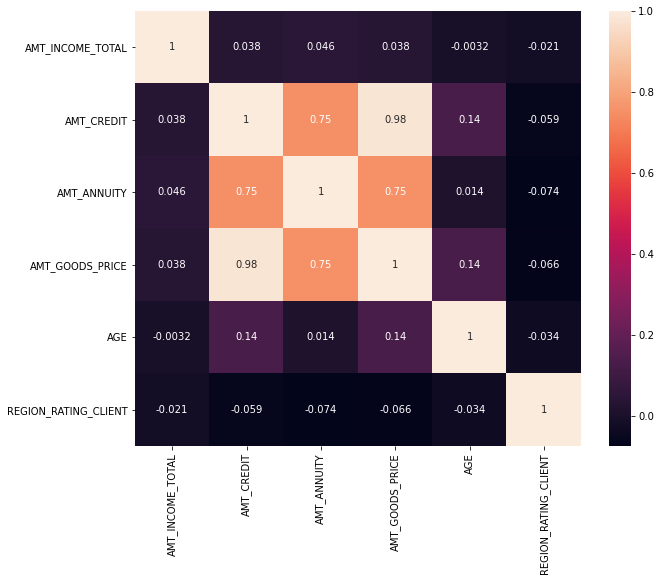

In [200]:
plt.figure(figsize=(10,8))
sns.heatmap(df_corr_target_1.corr(),annot=True)

**Highly correlate columns for defaulters**
<br>
AMT_CREDIT and AMT_ANNUITY (0.75)<br>
AMT_CREDIT and AMT_GOODS_PRICE (0.98)<br>
AMT_ANNUITY and AMT_GOODS_PRICE (0.75)

**Corelation of Non-defaulters**

In [201]:
df_corr_target_0 = target0_df_2[corr_cols]
df_corr_target_0.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AGE,REGION_RATING_CLIENT
1,270000.0,1293502.5,35698.5,1129500.0,45,1
2,67500.0,135000.0,6750.0,135000.0,52,2
3,135000.0,312682.5,29686.5,297000.0,52,2
4,121500.0,513000.0,21865.5,513000.0,54,2
5,99000.0,490495.5,27517.5,454500.0,46,2


**Correlation matrix for target 0**

In [202]:
df_corr_target_0.corr() 

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AGE,REGION_RATING_CLIENT
AMT_INCOME_TOTAL,1.000000,0.342799,0.418953,0.349462,-0.062494,-0.186573
AMT_CREDIT,0.342799,1.000000,0.771309,0.987250,0.047366,-0.103337
AMT_ANNUITY,0.418953,0.771309,1.000000,0.776686,-0.012254,-0.132128
AMT_GOODS_PRICE,0.349462,0.987250,0.776686,1.000000,0.044552,-0.104382
AGE,-0.062494,0.047366,-0.012254,0.044552,1.000000,-0.002415
REGION_RATING_CLIENT,-0.186573,-0.103337,-0.132128,-0.104382,-0.002415,1.000000


<AxesSubplot:>

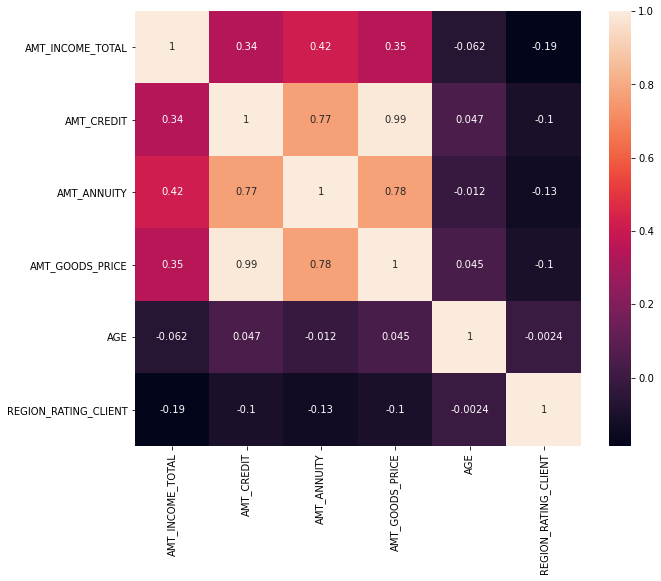

In [203]:
plt.figure(figsize=(10,8))
sns.heatmap(df_corr_target_0.corr(),annot=True)

**Highly corelate columns for non defaulters**<br>
AMT_CREDIT and AMT_ANNUITY (0.77)<br>
AMT_CREDIT and AMT_GOODS_PRICE (0.99)<br>
AMT_ANNUITY and AMT_GOODS_PRICE (0.78)



# Bivariate analysis on categorical variable

**Credit amount of the loan of various categories**

In [206]:
categories = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
             'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','AGE_GROUP','AMT_CATEGORY']

**Analysis for Defaulters**

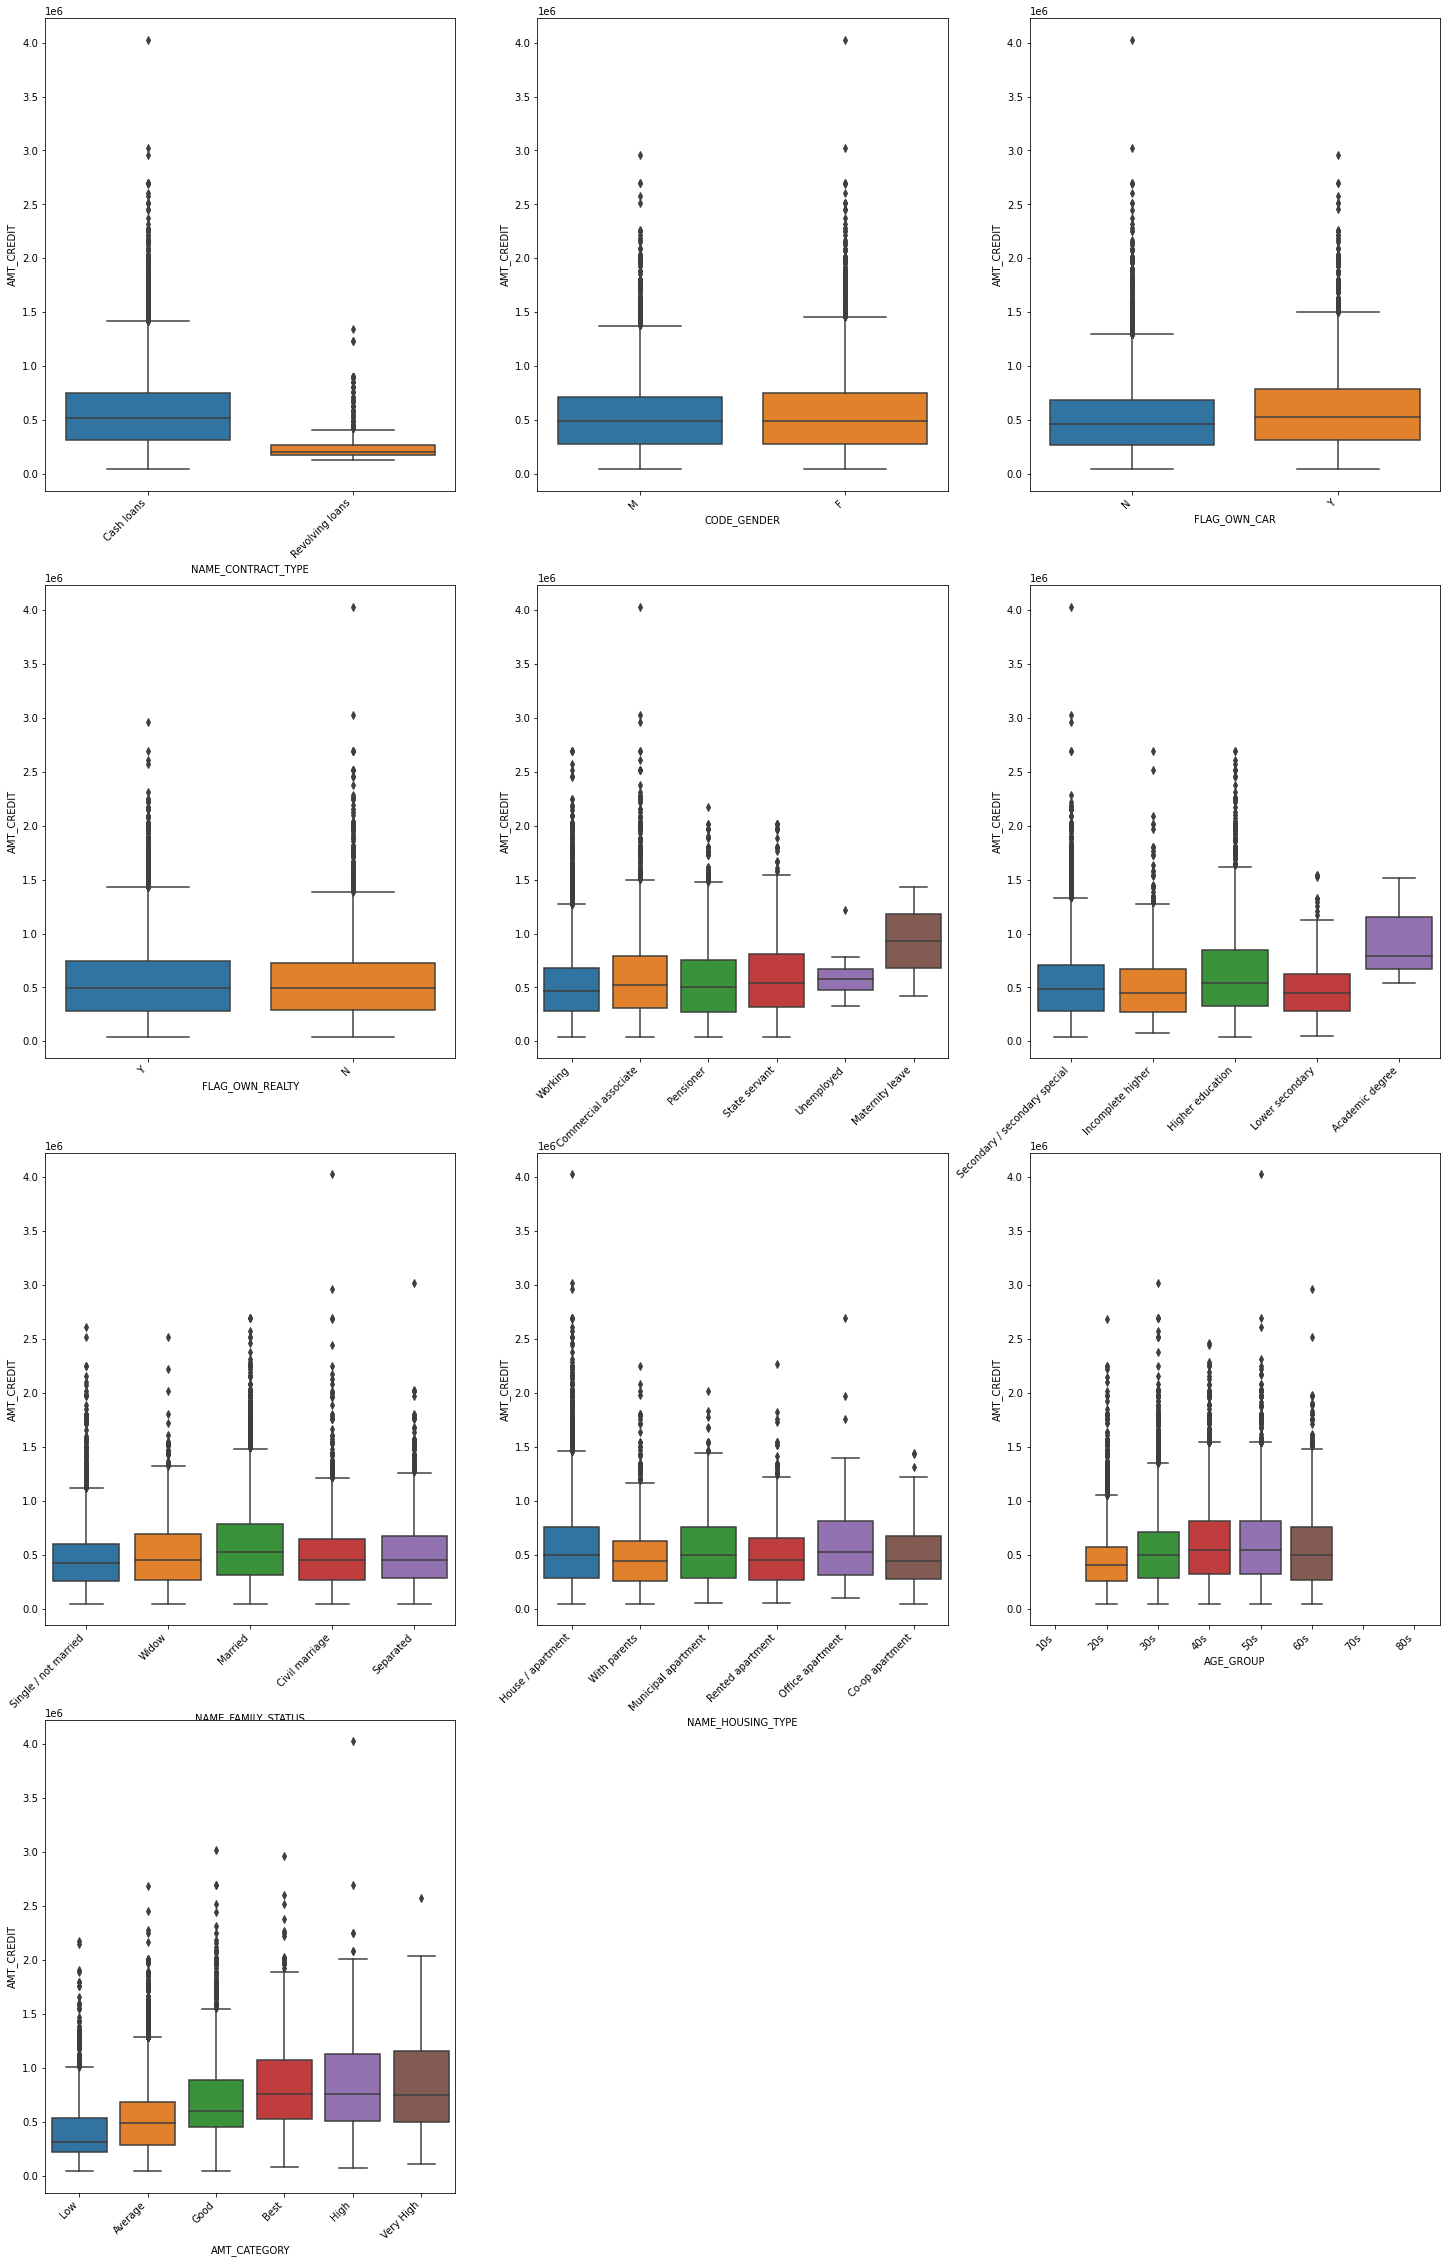

In [254]:
plt.figure(figsize=(25,40))
k=0
for category in categories:
    k = k+1
    ax = plt.subplot(4,3,k)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=target1_df_2)
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
  
    plt.savefig('bivariate_defaulters.png')

### **Analysis**

Credit amount of the loans are very low for Revolving loans<br>
There is no credit amount difference between genders, client owning cars or realty.<br>
The Young age group got less amount of loan credited compared to mid age and senior citizen.<br>
Higher income group have more loan amount credited.<br>
Clients having higher external score have more loan amount.



**Analysis for Non-Defaulters**

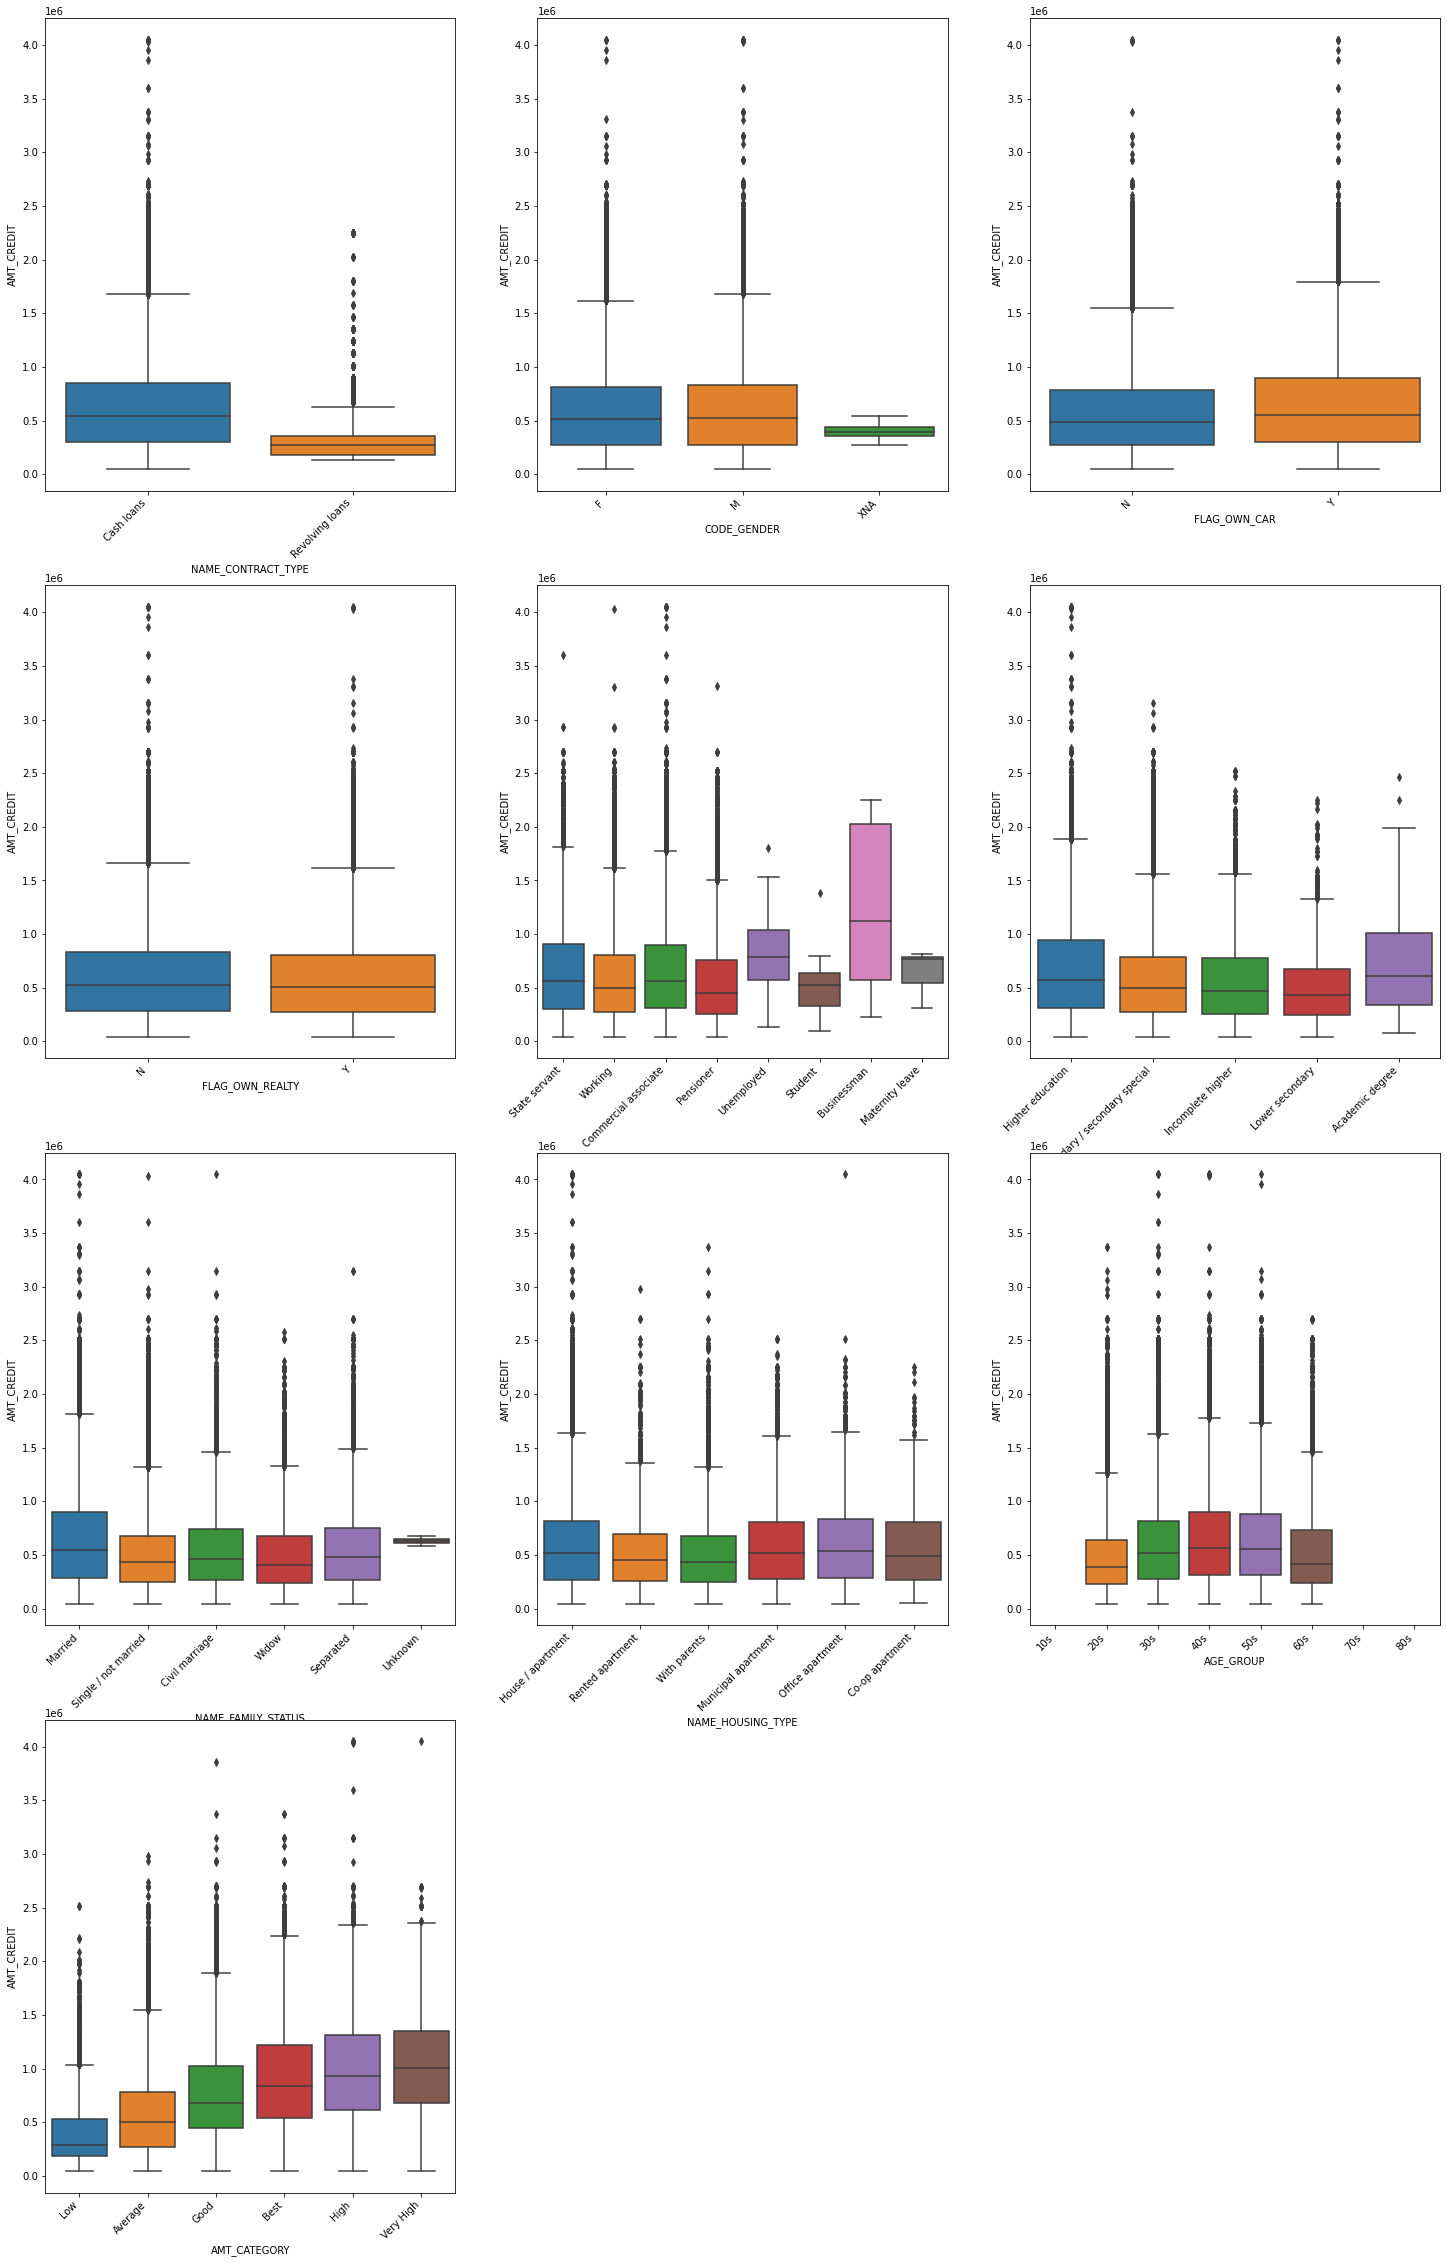

In [255]:
plt.figure(figsize=(25,40))
k=0
for category in categories:
    k = k+1
    ax = plt.subplot(4,3,k)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=target0_df_2)
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
    plt.savefig('bivariate_non_defaulters.png')

### **Analysis**

Credit amount of the loans are very low for Revolving loans<br>
There is no credit amount differnce between genders, client owning cars or realty.<br>
The mid age group got more amount of loan credited compared to young and senior citizen.<br>
Higher income group have more loan amount credited and lower the lowest.<br>
Clients having higher external score have more loan amount.<br>
Surprisingly the unemployed people have spike in credit amount of loan<br>
The Married people have more loan amount credited.



# Previous application Data


## **Reading the Previous Application in Pandas Dataframe**

In [209]:
df_application_previous = pd.read_csv('C:/Users/SAGNICK/TrainityBankLoneEDA/LoanCaseStudy/previous_application.csv')
df_application_previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [210]:
df_application_previous.shape

(1670214, 37)

In [211]:
df_application_previous.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [212]:
df_application_previous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

**Creating copy of the dataset**

In [213]:
df_application_previous_copy=df_application_previous.copy(deep=True)
df_application_previous_copy

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.000000,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,Y,1,0.000000,NaN,NaN,XAP,Approved,-544,Cash through the bank,XAP,NaN,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,Y,1,0.340554,NaN,NaN,XAP,Approved,-1694,Cash through the bank,XAP,Unaccompanied,New,Furniture,POS,XNA,Stone,43,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,Y,1,0.101401,NaN,NaN,XAP,Approved,-1488,Cash through the bank,XAP,"Spouse, partner",Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,Y,1,NaN,NaN,NaN,XNA,Approved,-1185,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


**Data Quality Check And Missing Values**

In [215]:
Perc_Of_NA_Columns_prev=round(df_application_previous_copy.isnull().sum()/len(df_application_previous_copy)*100,2)
Perc_Of_NA_Columns_prev

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

**Checking for the columns where NA values are >50%**

In [216]:
Columns_with_min50_NA_Values_prev=Perc_Of_NA_Columns_prev[Perc_Of_NA_Columns_prev>50]
Columns_with_min50_NA_Values_prev

AMT_DOWN_PAYMENT            53.64
RATE_DOWN_PAYMENT           53.64
RATE_INTEREST_PRIMARY       99.64
RATE_INTEREST_PRIVILEGED    99.64
dtype: float64

**Dropping the columns where >50% data are NA**

In [217]:
df_application_previous_copy=df_application_previous_copy.drop(Columns_with_min50_NA_Values_prev.index,axis=1)
df_application_previous_copy.shape

(1670214, 33)

### Merging the Application data with witht Previous Application Data on SK_ID_CURR column


In [218]:
df_application_current_copy.shape

(307511, 83)

In [219]:
drop_columns

['FLAG_CONT_MOBILE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'HOUR_APPR_PROCESS_START',
 'WEEKDAY_APPR_PROCESS_START',
 'FLOORSMAX_AVG',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'FLOORSMAX_AVG',
 'FLOORSMAX_MODE',
 'FLOORSMAX_MEDI',
 'TOTALAREA_MODE',
 'EMERGENCYSTATE_MODE',
 'REGION_POPULATION_RELATIVE',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BEGINEXPLUATATION_MODE',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DO

**Dropping all the irrelevant columns from Current data**

In [220]:
df_application_current_copy=df_application_current_copy.drop(drop_columns,axis=1)
df_application_current_copy.shape

(307511, 39)

**Merging both the datasets**

In [221]:
combined_df = pd.merge(left =df_application_current_copy, right =df_application_previous_copy, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner', validate=None)
combined_df.shape

(1413701, 71)

**Getting the different Types of contract statuses:**

In [222]:
combined_df.NAME_CONTRACT_STATUS.unique()

array(['Approved', 'Canceled', 'Refused', 'Unused offer'], dtype=object)

 ## **Doing analysis on People with Contract Status as Approved**

In [226]:
combined_approved_df = combined_df[combined_df.NAME_CONTRACT_STATUS == 'Approved']
print(combined_approved_df.shape)
combined_approved_df.head(5)

(886099, 71)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE,AGE_GROUP,AMT_CATEGORY,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,1.0,2,2,Business Entity Type 3,2.0,2.0,2.0,2.0,1,0.0,0.0,0.0,0.0,0.0,1.0,25,1,9.0,5,3.0,20s,Good,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,Core staff,2.0,1,1,School,1.0,0.0,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,45,3,3.0,0,2.0,40s,Good,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,Core staff,2.0,1,1,School,1.0,0.0,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,45,3,3.0,0,2.0,40s,Good,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,Core staff,2.0,1,1,School,1.0,0.0,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,45,3,3.0,0,2.0,40s,Good,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15,Y,1,XAP,Approved,-2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,1.0,2,2,Government,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,52,0,11.0,6,2.0,50s,Low,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,FRIDAY,5,Y,1,XAP,Approved,-815,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


**Univariate Analysis for few categorical columns in combined dataframe**

In [227]:
combined_categorical_columns = ['NAME_CONTRACT_TYPE_x',
                       'FLAG_OWN_CAR',
                       'FLAG_OWN_REALTY',
                       'CODE_GENDER',
                       'NAME_EDUCATION_TYPE',
                       'AMT_CATEGORY',
                       'AGE_GROUP']

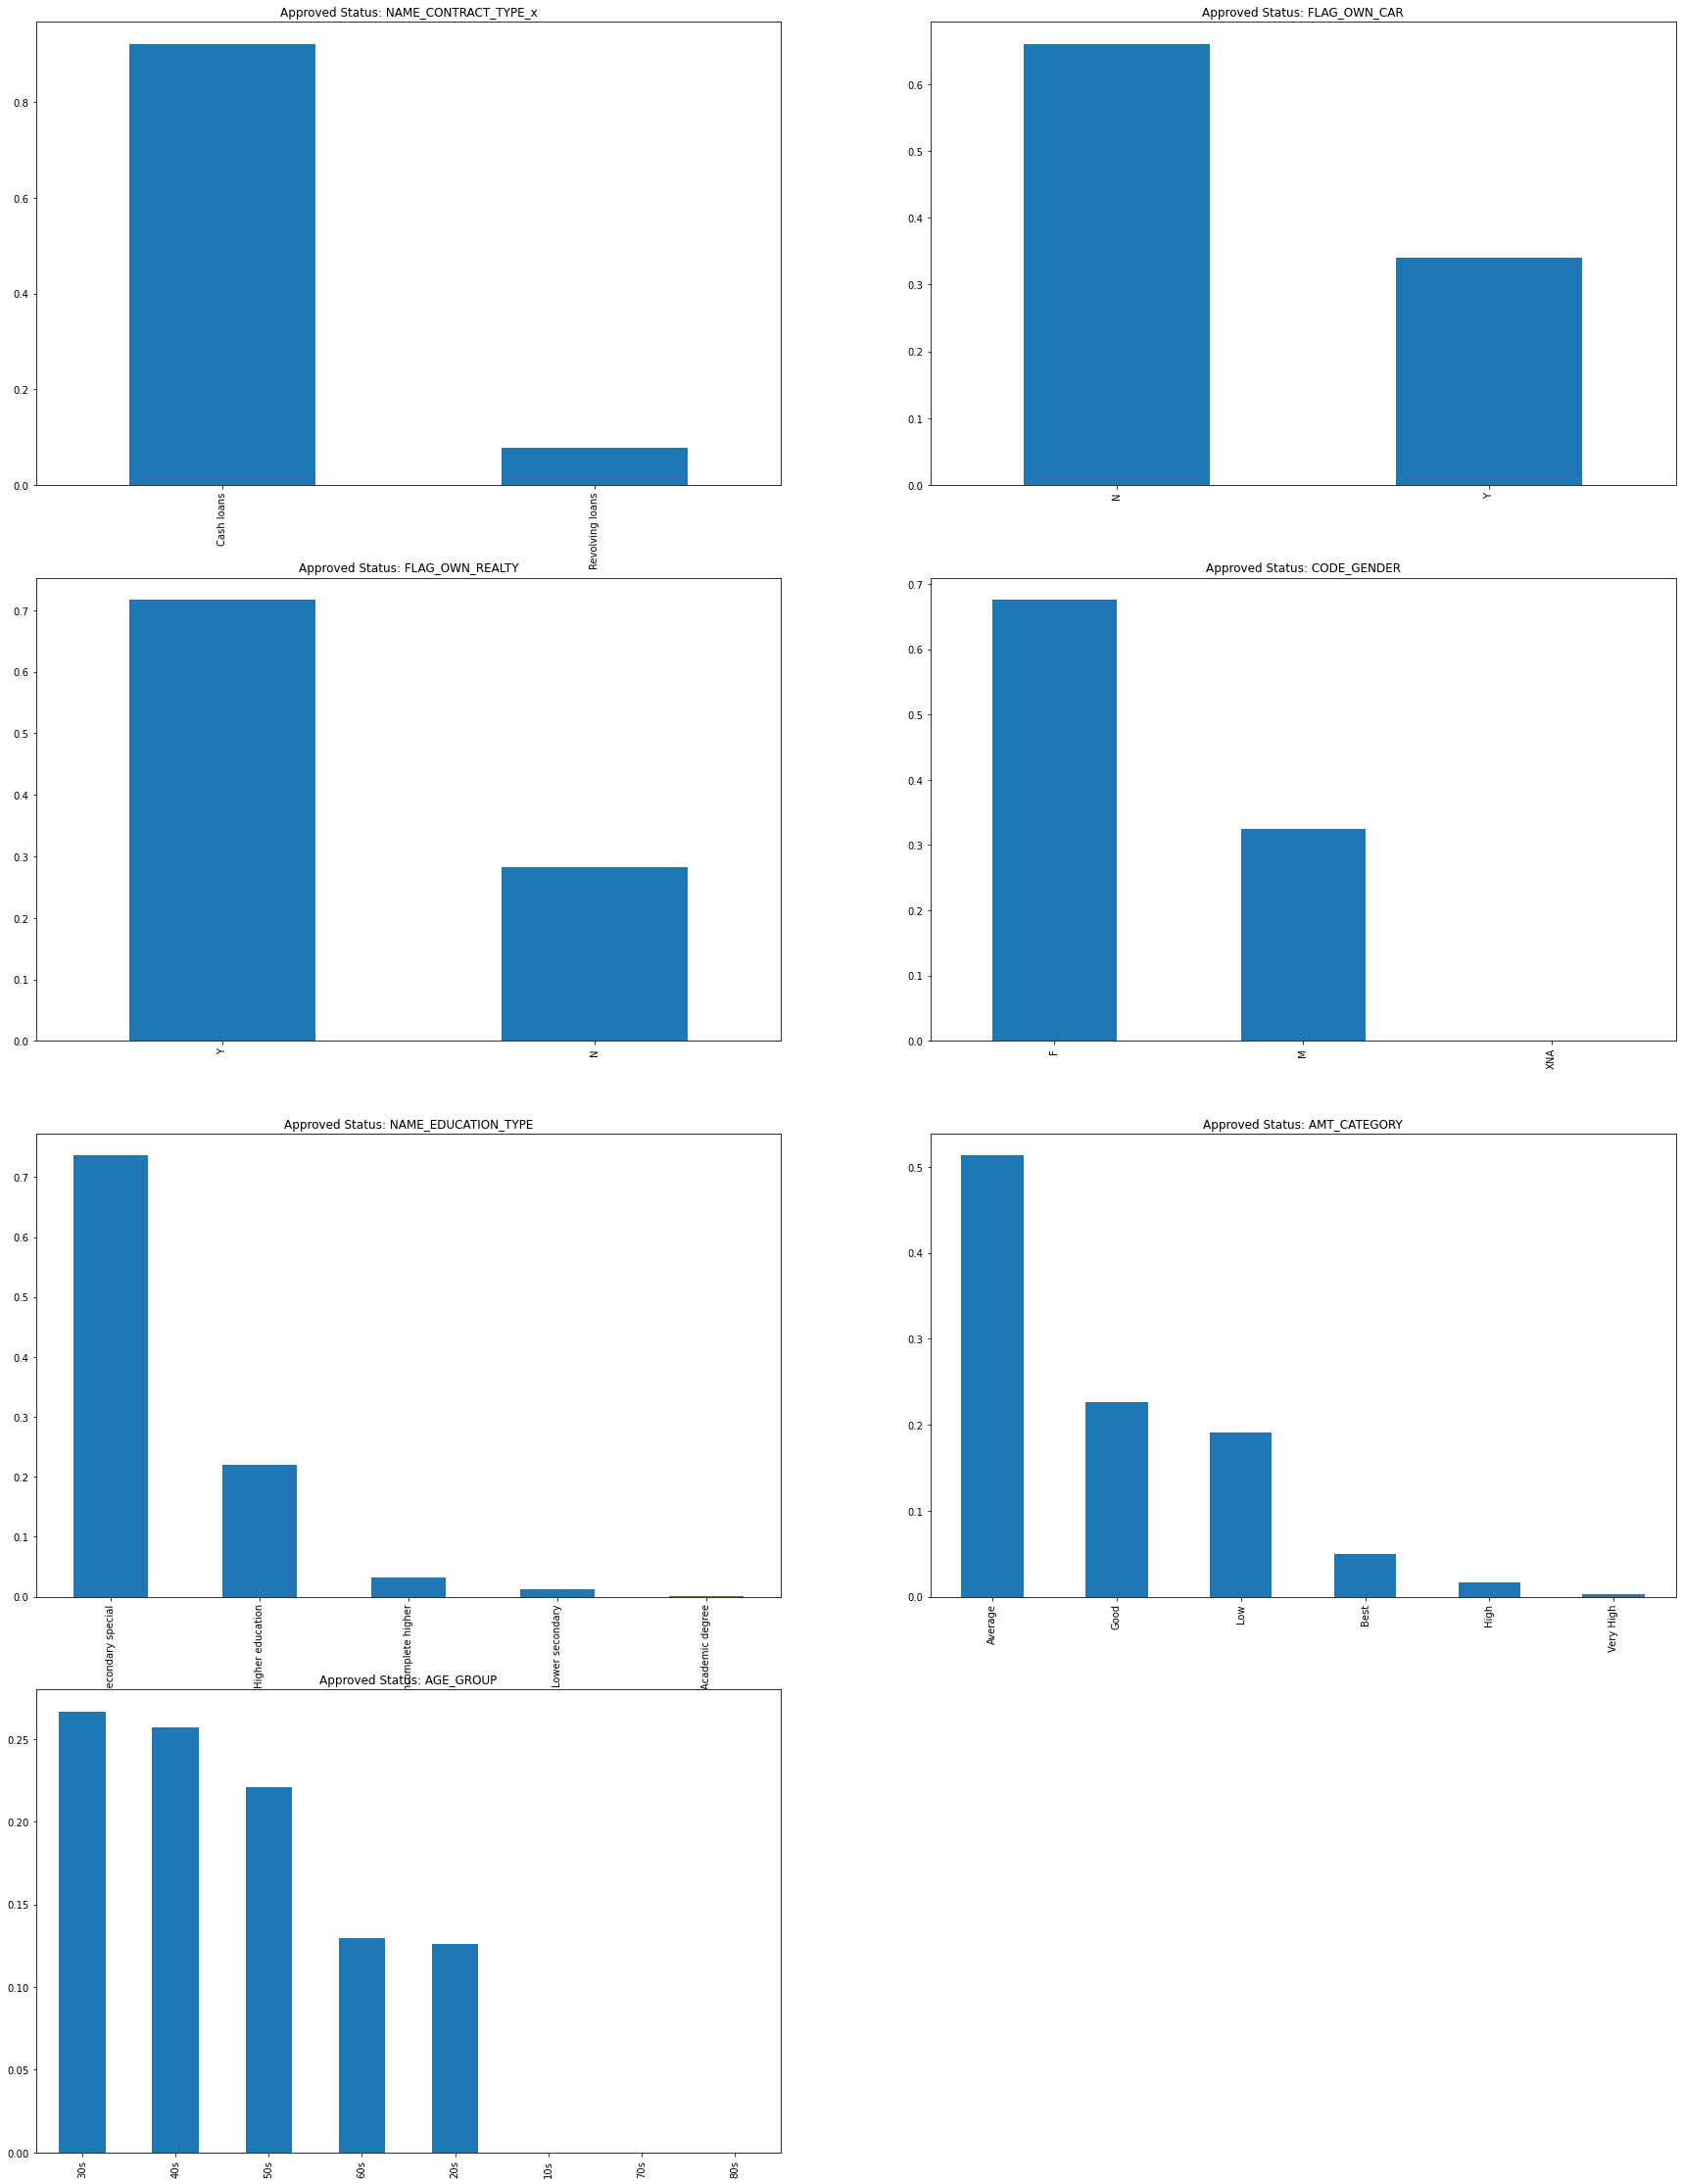

In [271]:
plt.figure(figsize=(30,40))
k=0
for i in combined_categorical_columns:
    k+=1
    ax=plt.subplot(4,2,k)
    combined_approved_df[i].value_counts(normalize=True).plot.bar()
    plt.title("Approved Status: "+ i)
    

### **Univariate Analysis for few numerical columns in combined dataframe**

In [233]:
combined_numerical_columns= ['AMT_GOODS_PRICE_x',
                    'YEARS_LAST_PHONE_CHANGE',
                    'YEARS_ID_PUBLISH',
                    'AMT_INCOME_TOTAL',
                    'YEARS_EMPLOYED',
                    'YEARS_REGISTRATION',
                    'AGE',
                    'AMT_CREDIT_x',
                    'AMT_ANNUITY_x'
                   ]

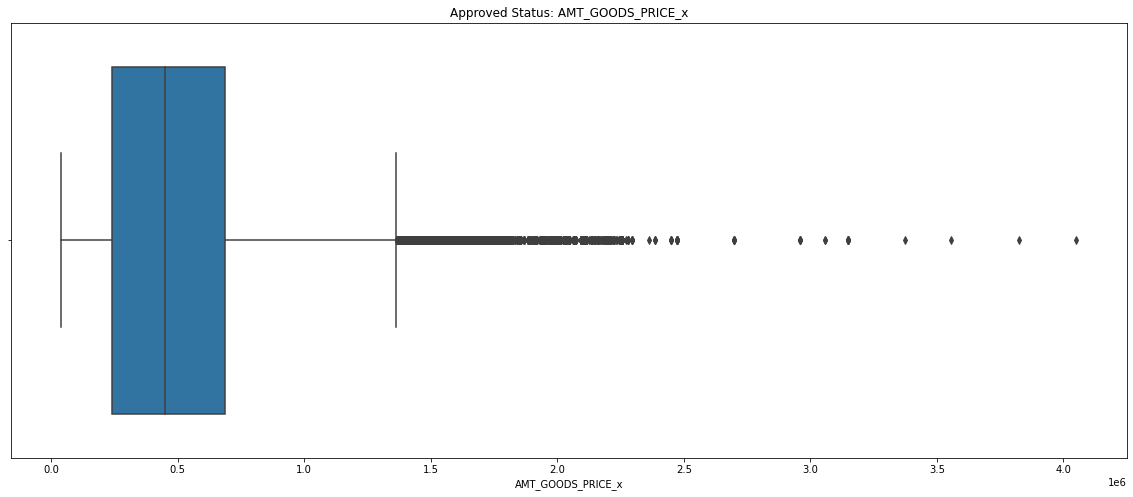

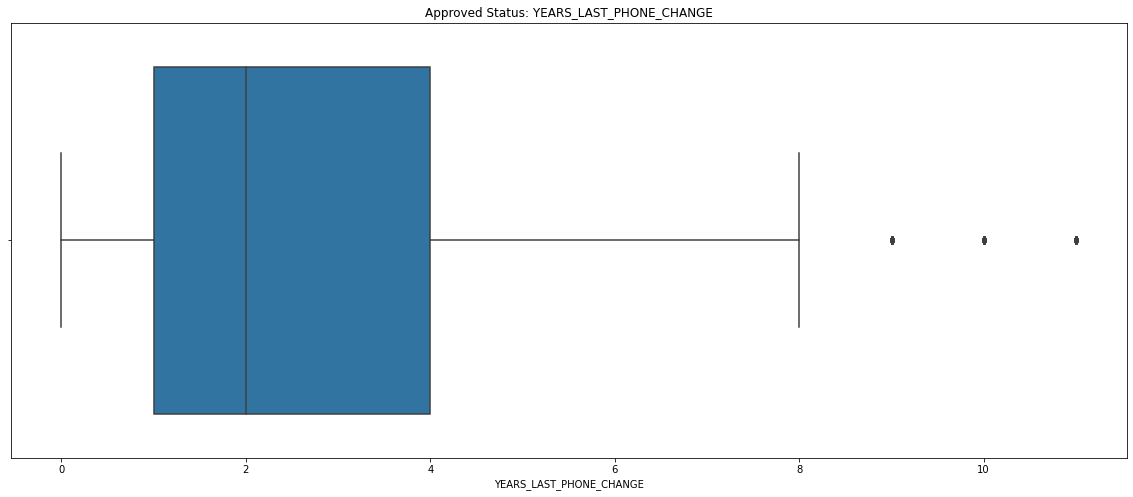

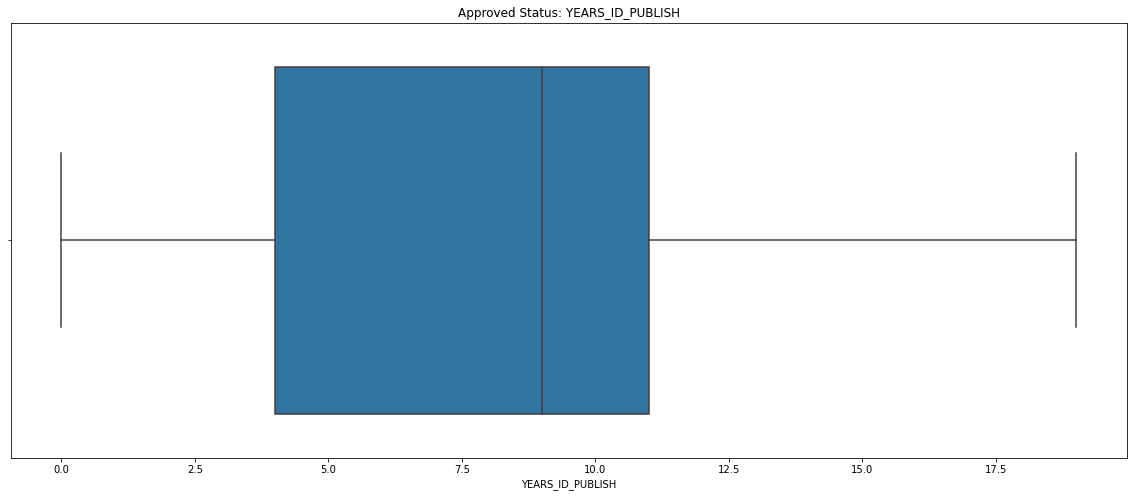

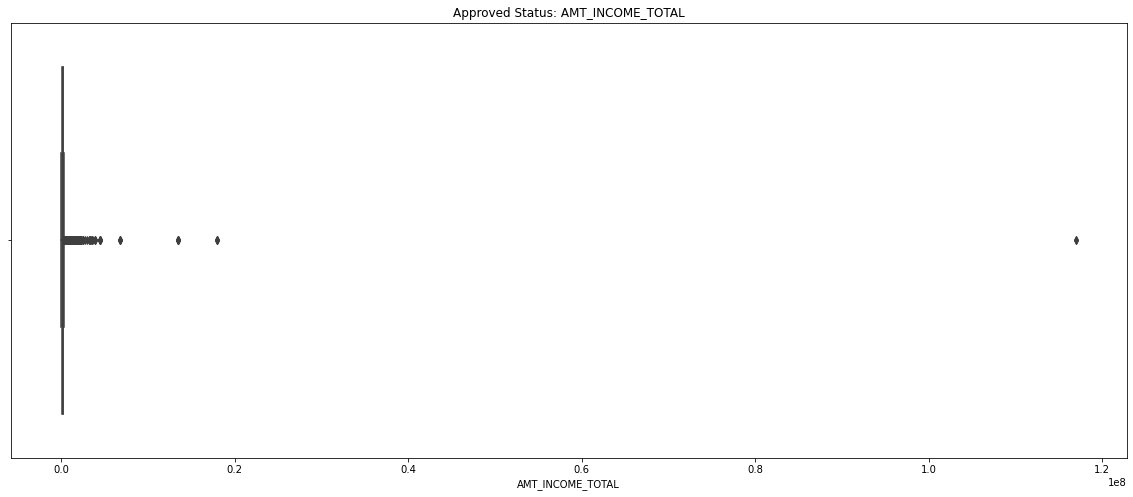

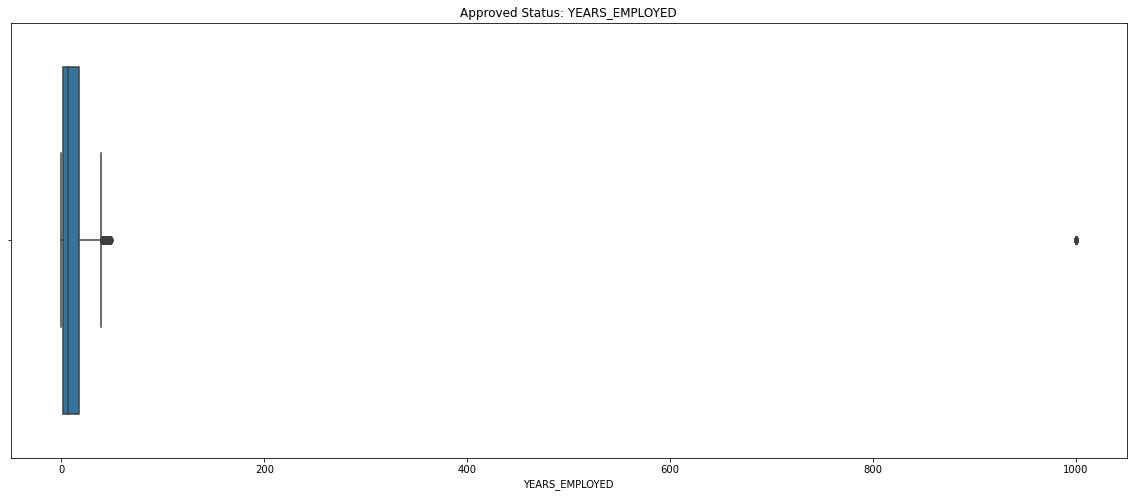

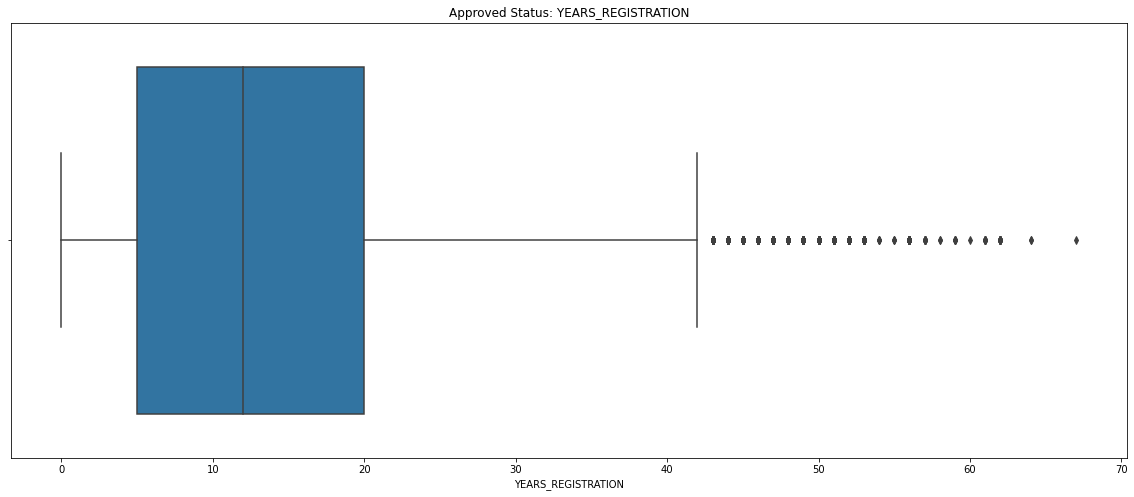

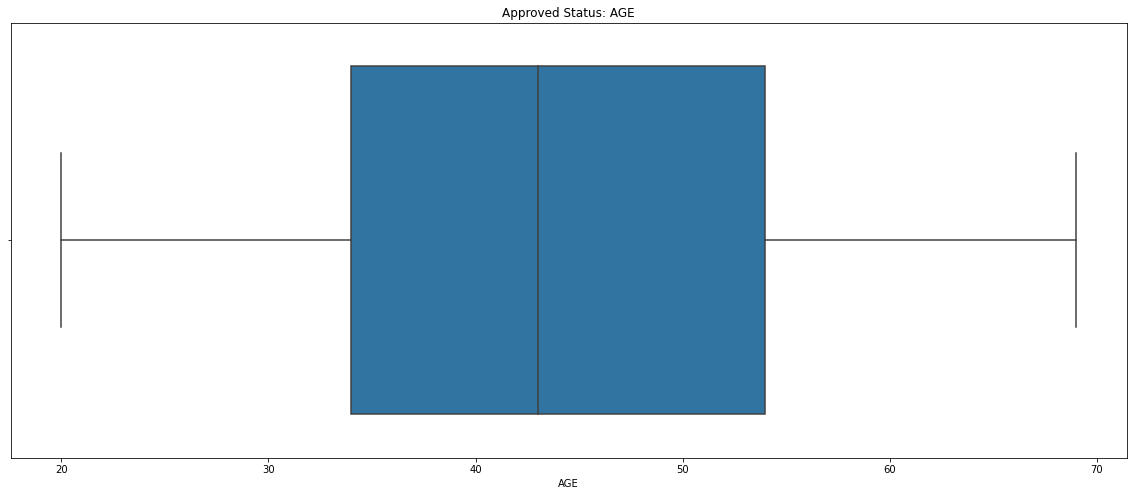

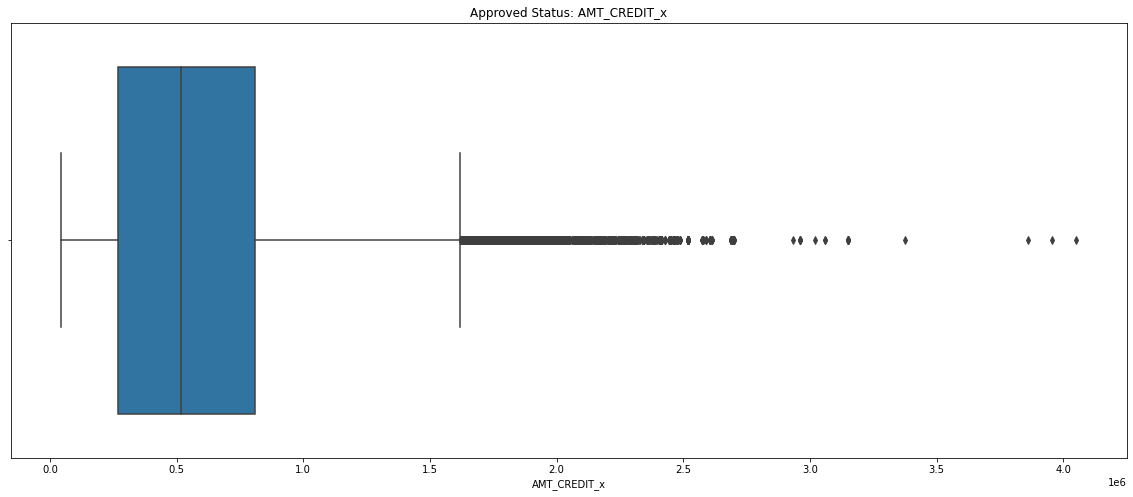

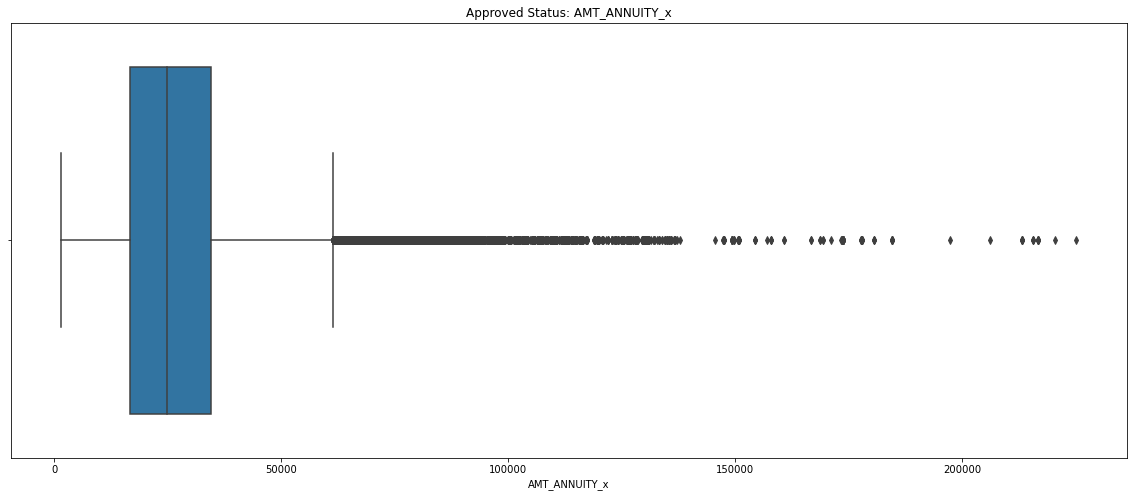

In [234]:
for i in combined_numerical_columns:
    plt.figure(figsize=(20,8))
    sns.boxplot(combined_approved_df[i])
    plt.title("Approved Status: "+i)

## **Bivariate Analysis for few Categorical Variable of combined dataframe**

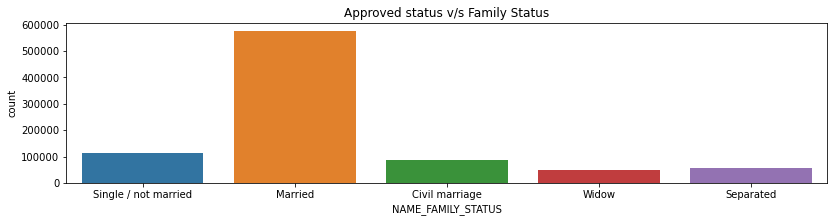

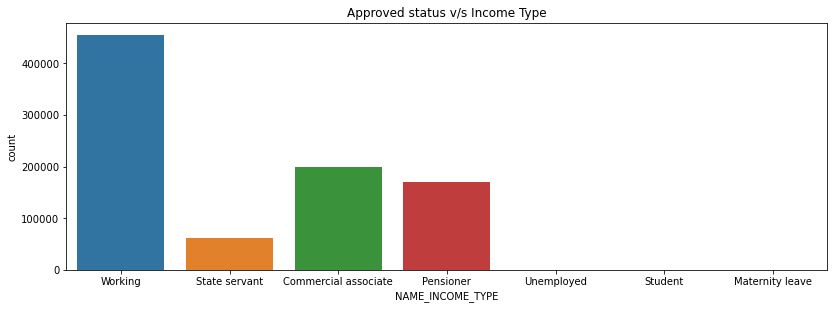

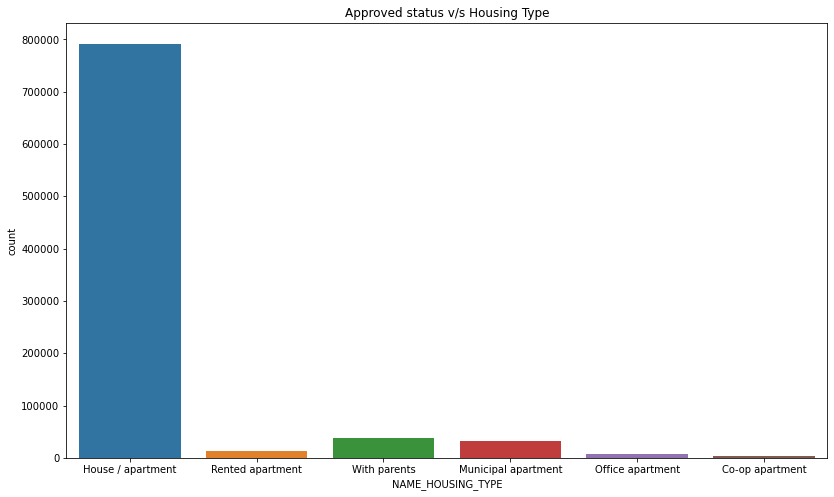

In [235]:

# 1. Second Variable : Family Status
plt.figure(figsize=(30,10))
plt.subplot(3,2,2)
sns.countplot(x = "NAME_FAMILY_STATUS", data = combined_approved_df)
plt.title("Approved status v/s Family Status")
plt.show()

# 2. Second Variable : Income Type
plt.figure(figsize=(30,10))
plt.subplot(2,2,1)
sns.countplot(x = "NAME_INCOME_TYPE", data = combined_approved_df)
plt.title("Approved status v/s Income Type")
plt.show()

# 3. Second Variable : Housing type
plt.figure(figsize=(30,8))
plt.subplot(1,2,1)
sns.countplot(x = "NAME_HOUSING_TYPE", data = combined_approved_df)
plt.title("Approved status v/s Housing Type")
plt.show()

### **Insights from the above Bivariant analysis for categorical data is as below:** 
1. Approved status v/s Family Status: People who are married are more likely to get loan approved
2. Approved status v/s Income Type: People who are working are more likely to get loan approved compared to students who are least likely to get loan approved
3. Approved status v/s Housing_type: People who own House/apartment are more likely to get loan approved then compared to rented appartments/ co-op apartment types

## **Bivariant analysis for Numerical Data.**

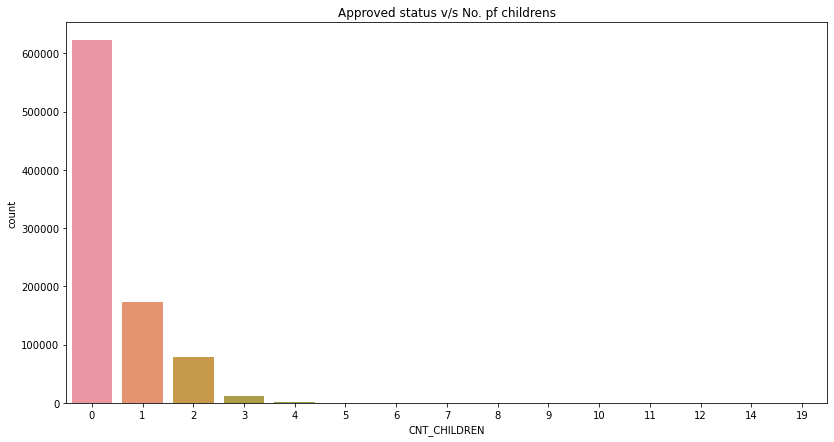

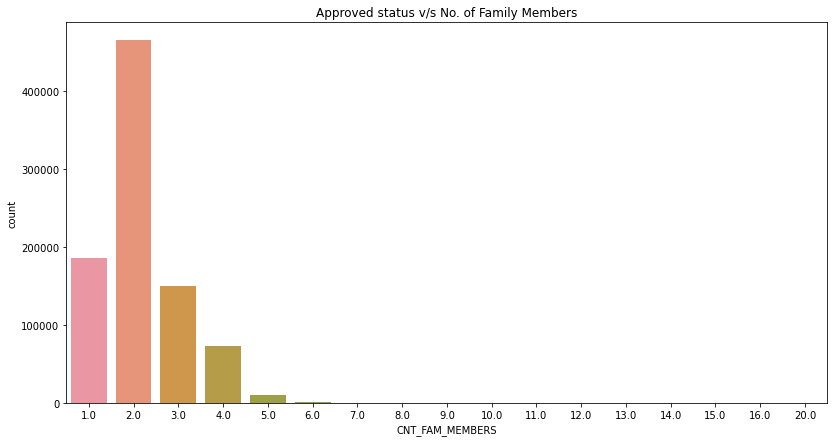

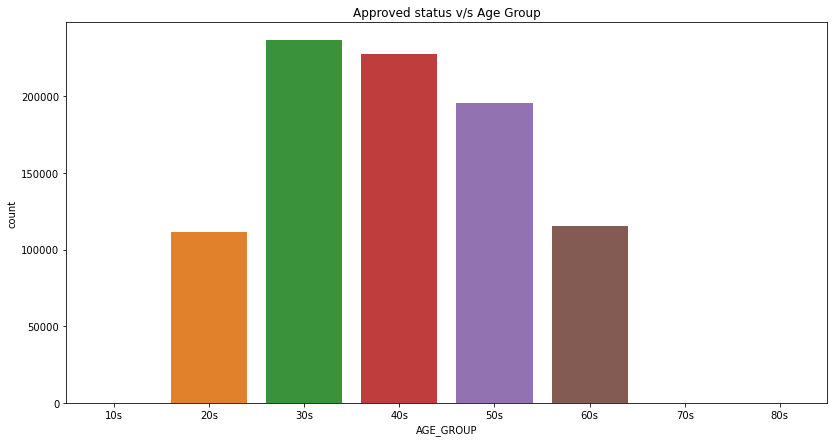

In [236]:
# 1. Second Variable : CNT_CHILDREN
plt.figure(figsize=(30,7))
plt.subplot(1,2,1)
sns.countplot(x = "CNT_CHILDREN", data = combined_approved_df)
plt.title("Approved status v/s No. pf childrens")
plt.show()

# 2. Second Variable : CNT_FAM_MEMBERS
plt.figure(figsize=(30,7))
plt.subplot(1,2,1)
sns.countplot(x = "CNT_FAM_MEMBERS", data = combined_approved_df)
plt.title("Approved status v/s No. of Family Members")
plt.show()

# 3. Second Variable : Age
plt.figure(figsize=(30,7))
plt.subplot(1,2,1)
sns.countplot(x="AGE_GROUP", data = combined_approved_df)
plt.title("Approved status v/s Age Group")
plt.show()

### **Inference from the above Bivariant analysis for numerical data is as below:**
1. Approved status v/s No. of children: People with 0 children are more likely to get loan approved
2. Approved status v/s No. of family members: If the number of people in a family is 2 they are more likely to get loan approved.
3. Approved status v/s Age: People with age in between 30 -50 years are more likely to get loan approved compared to the people in 20s and 60s

## **Analysis on People with Contract Status as Refused**

In [237]:
combined_refused_df = combined_df[combined_df.NAME_CONTRACT_STATUS == 'Refused']
print(combined_refused_df.shape)
combined_refused_df.head(5)

(245390, 71)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE,AGE_GROUP,AMT_CATEGORY,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
13,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,2.0,2,2,Business Entity Type 3,2.0,0.0,2.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,52,8,26.0,6,1.0,50s,Average,1697039,Cash loans,32696.100,688500.0,906615.0,688500.0,THURSDAY,15,Y,1,XNA,Refused,-181,Cash through the bank,LIMIT,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,48.0,low_normal,Cash X-Sell: low,NaN,NaN,NaN,NaN,NaN,NaN
33,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,NaN,2.0,2,2,XNA,1.0,0.0,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0,1.0,55,1000,20.0,9,0.0,50s,Average,2668005,Cash loans,NaN,0.0,0.0,0.0,WEDNESDAY,9,Y,1,XNA,Refused,-1162,Cash through the bank,LIMIT,Unaccompanied,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
79,100027,0,Cash loans,F,N,Y,0,83250.0,239850.0,23850.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,NaN,2.0,3,3,XNA,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,3.0,68,1000,24.0,10,2.0,60s,Low,2531618,Cash loans,22556.475,225000.0,239850.0,225000.0,SATURDAY,14,Y,1,XNA,Refused,-181,Cash through the bank,HC,Unaccompanied,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),5,XNA,12.0,low_normal,Cash X-Sell: low,NaN,NaN,NaN,NaN,NaN,NaN
84,100030,0,Cash loans,F,N,Y,0,90000.0,225000.0,11074.5,225000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Cleaning staff,2.0,2,2,Business Entity Type 3,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,52,9,6.0,7,0.0,50s,Low,2691769,Consumer loans,3140.460,33660.0,33660.0,33660.0,SATURDAY,7,Y,1,XAP,Refused,-2688,XNA,SCO,Unaccompanied,Repeater,XNA,POS,XNA,Stone,30,Furniture,12.0,low_normal,POS industry with interest,NaN,NaN,NaN,NaN,NaN,NaN
85,100030,0,Cash loans,F,N,Y,0,90000.0,225000.0,11074.5,225000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Cleaning staff,2.0,2,2,Business Entity Type 3,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,52,9,6.0,7,0.0,50s,Low,2579186,Consumer loans,3140.460,33660.0,33660.0,33660.0,FRIDAY,15,Y,1,XAP,Refused,-2689,XNA,SCO,Unaccompanied,Repeater,XNA,POS,XNA,Stone,30,Furniture,12.0,low_normal,POS industry with interest,NaN,NaN,NaN,NaN,NaN,NaN


### **Univariate Analysis for few categorical columns in combined dataframe**

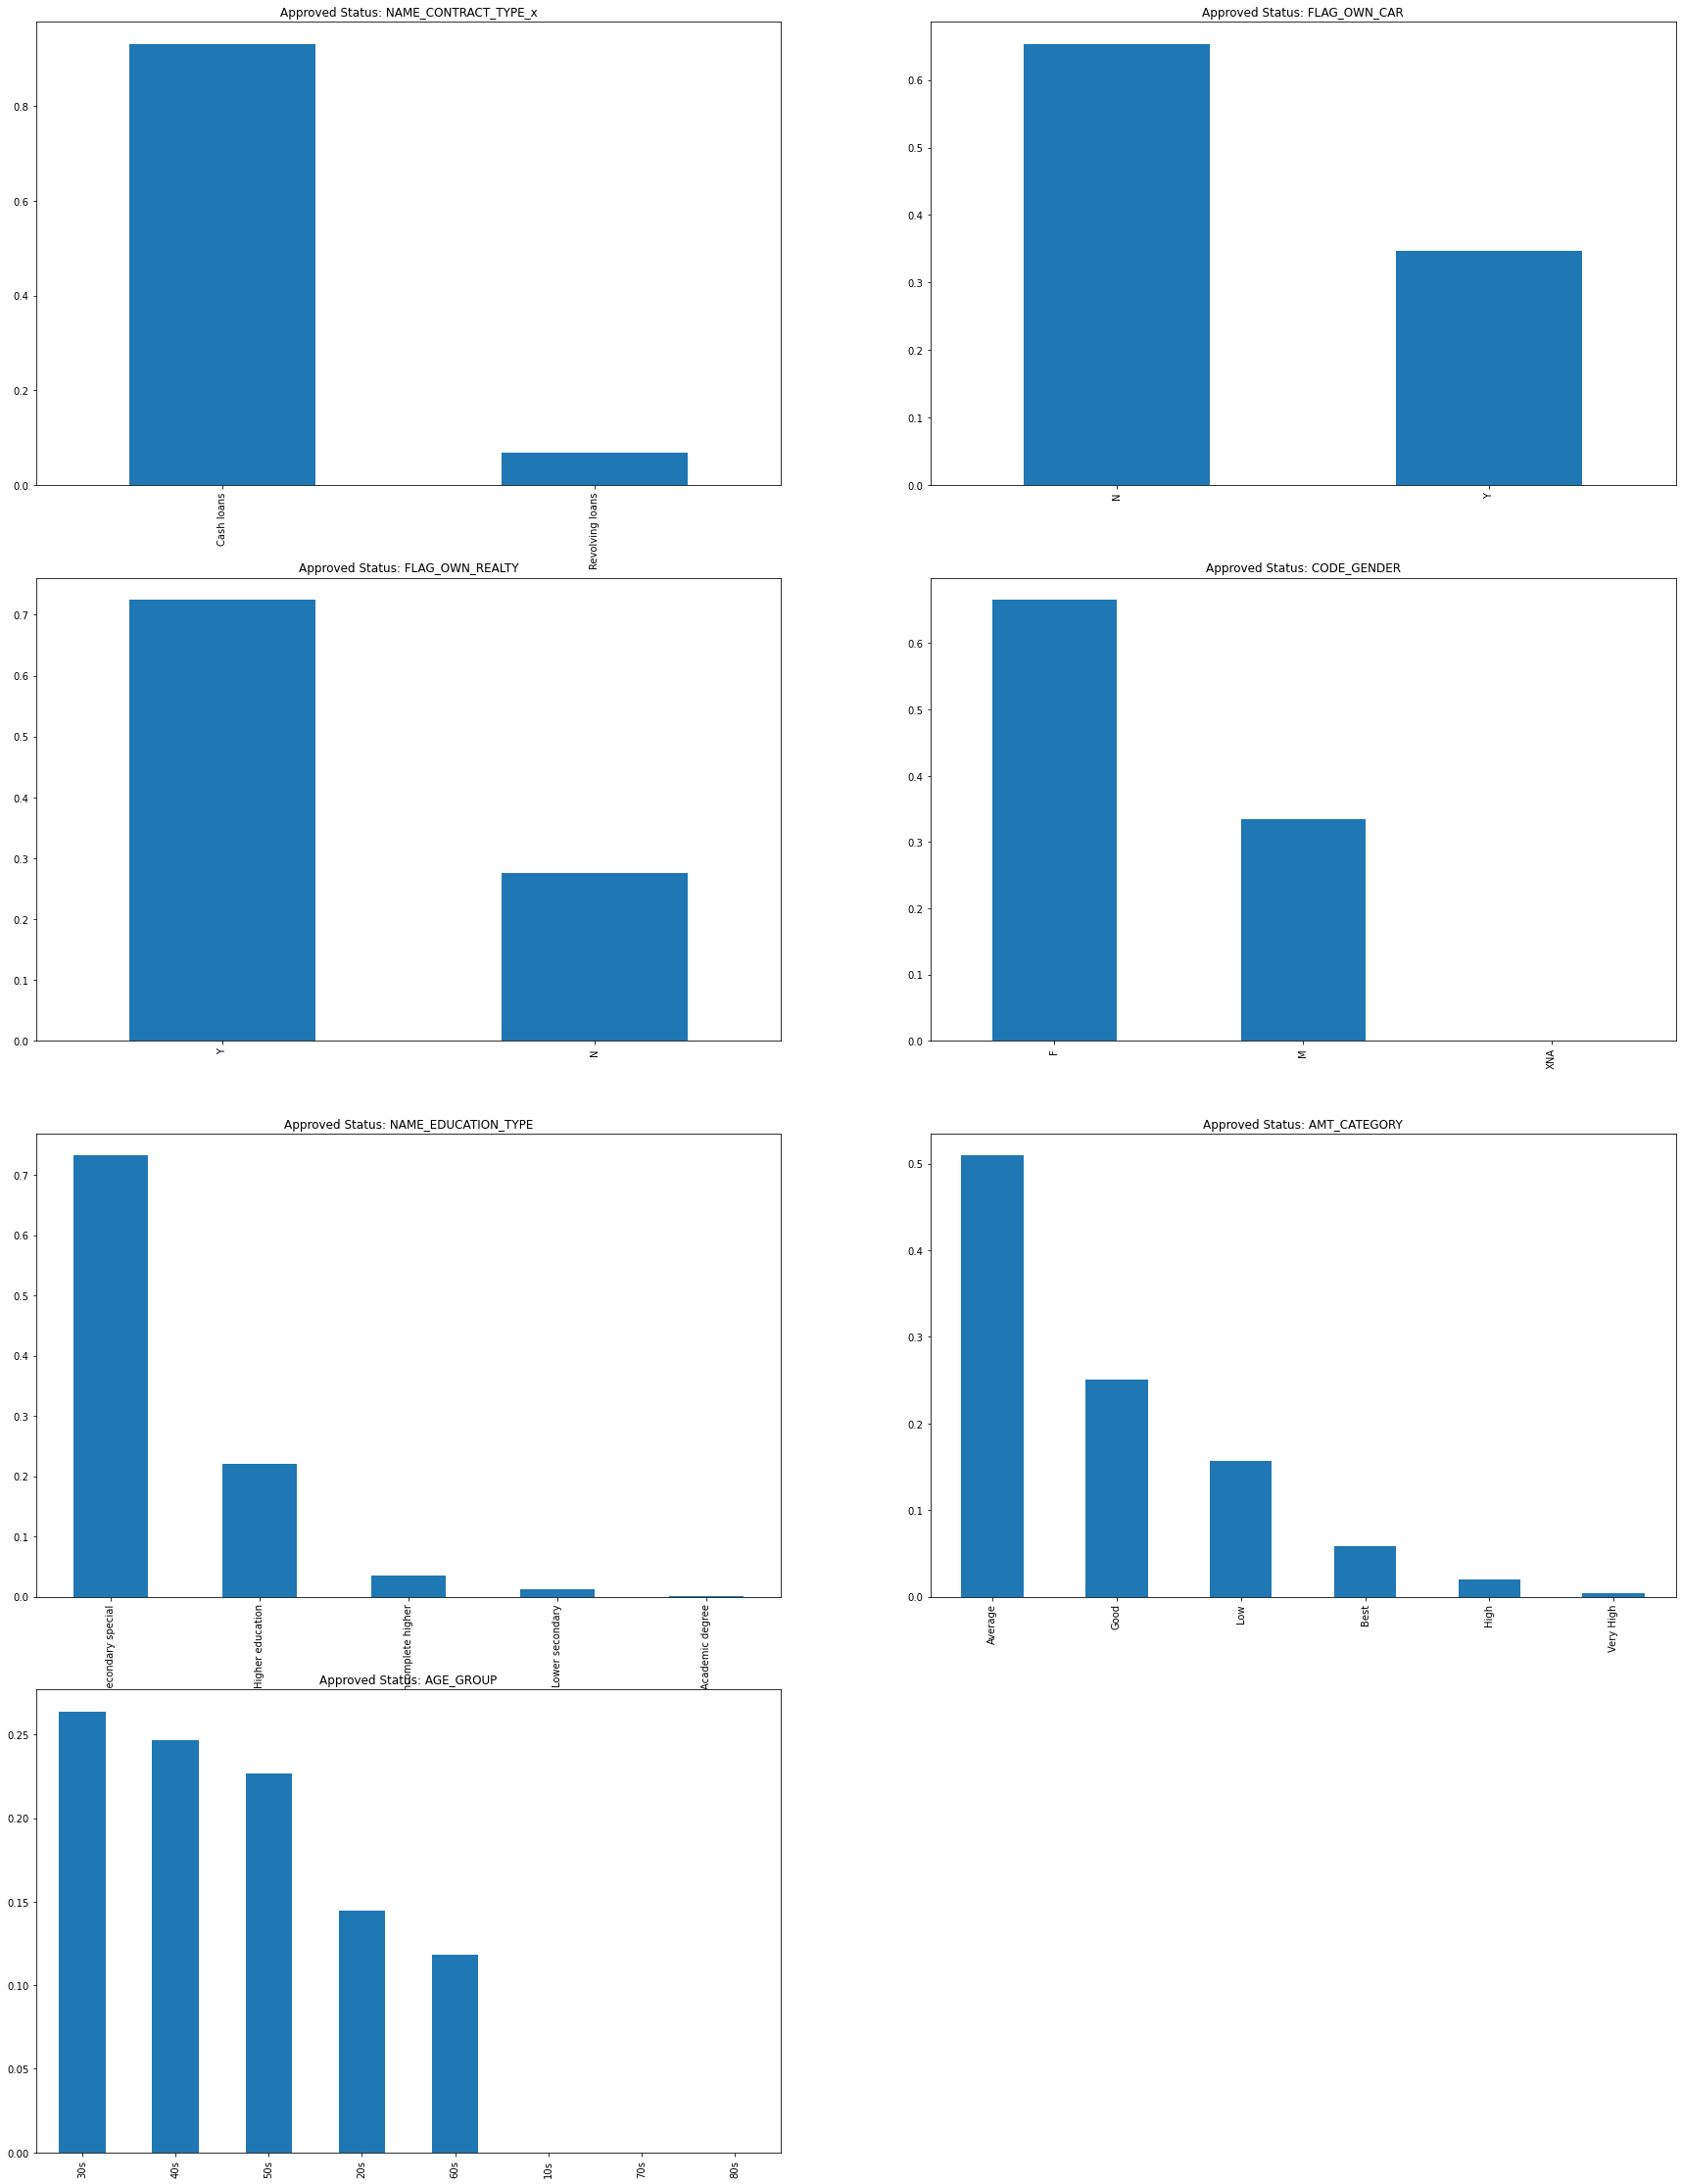

In [272]:
plt.figure(figsize=(30,40))
k=0
for i in combined_categorical_columns:
    k+=1
    ax=plt.subplot(4,2,k)
    combined_refused_df[i].value_counts(normalize=True).plot.bar()
    plt.title("Approved Status: "+ i)

### **Univariate Analysis for few numerical columns in combined dataframe**

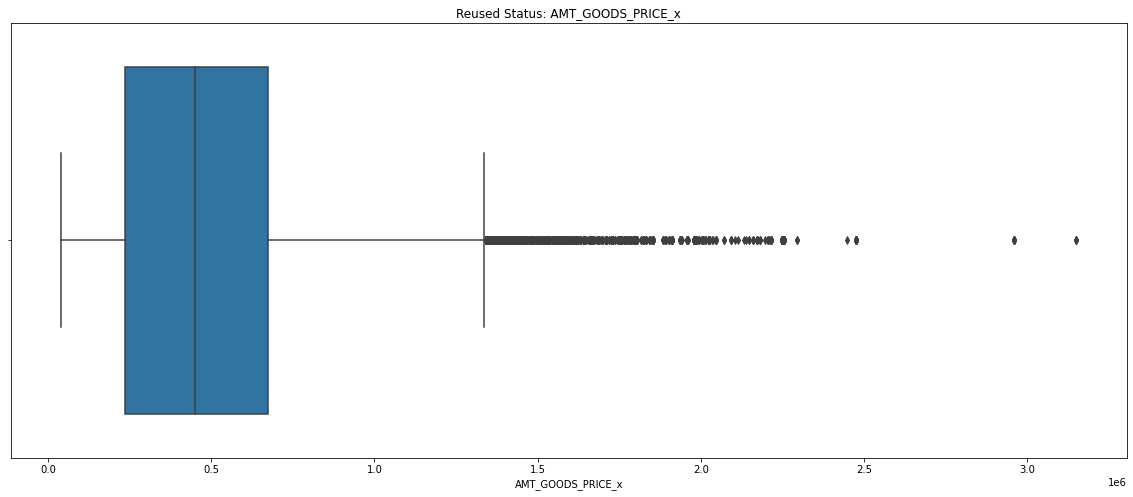

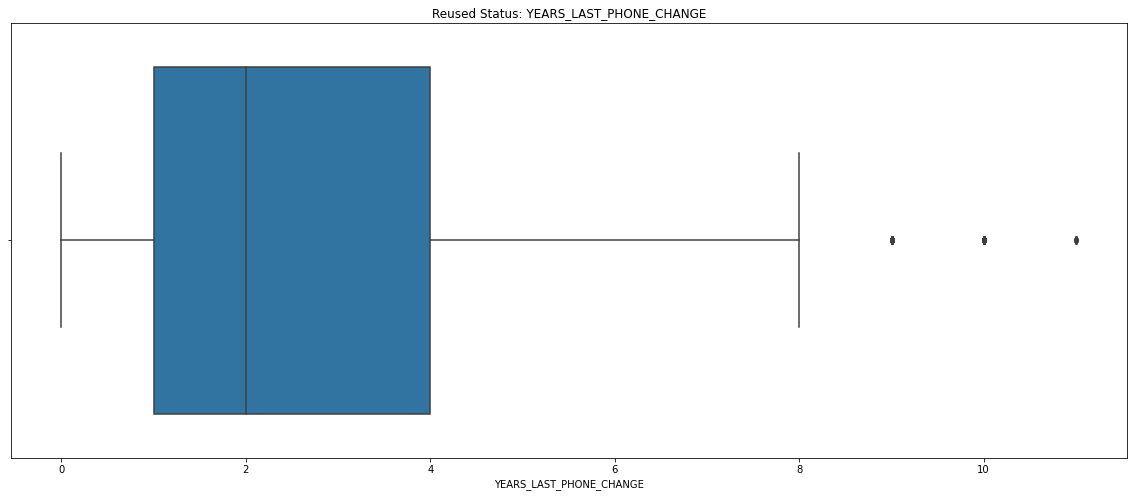

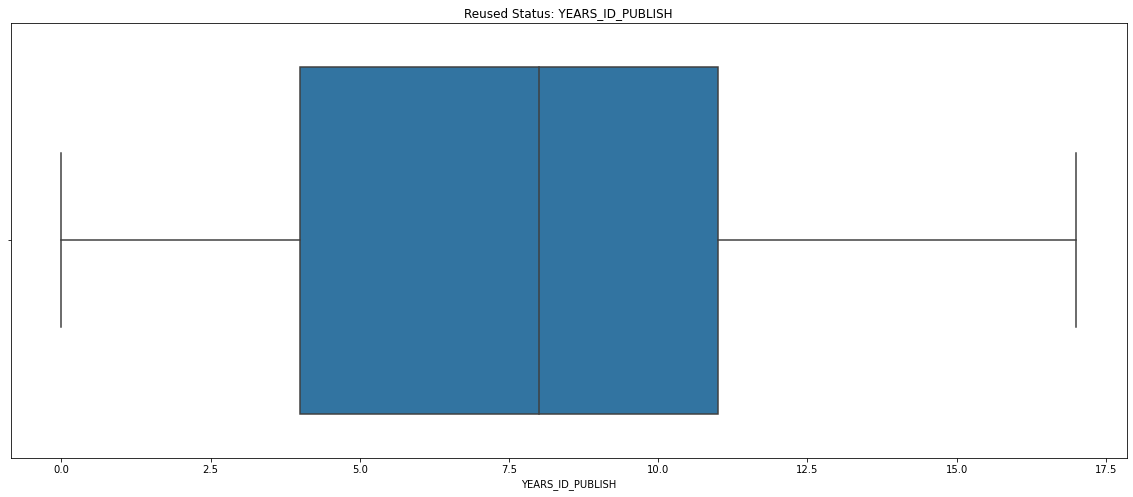

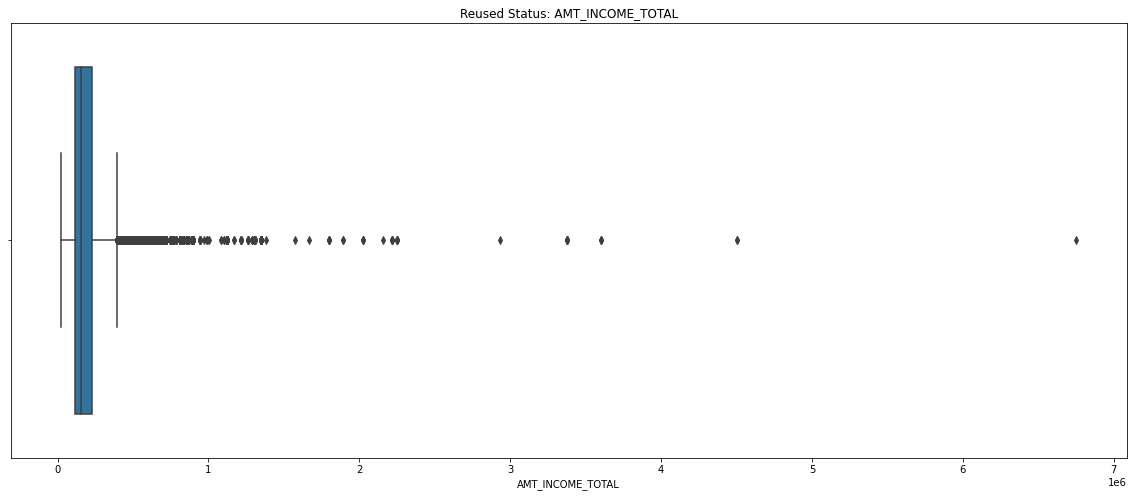

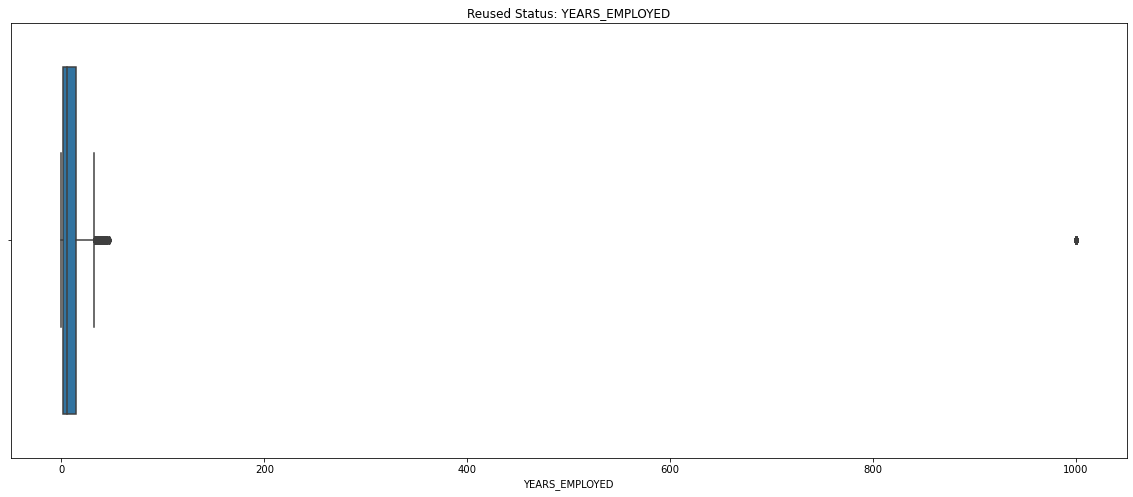

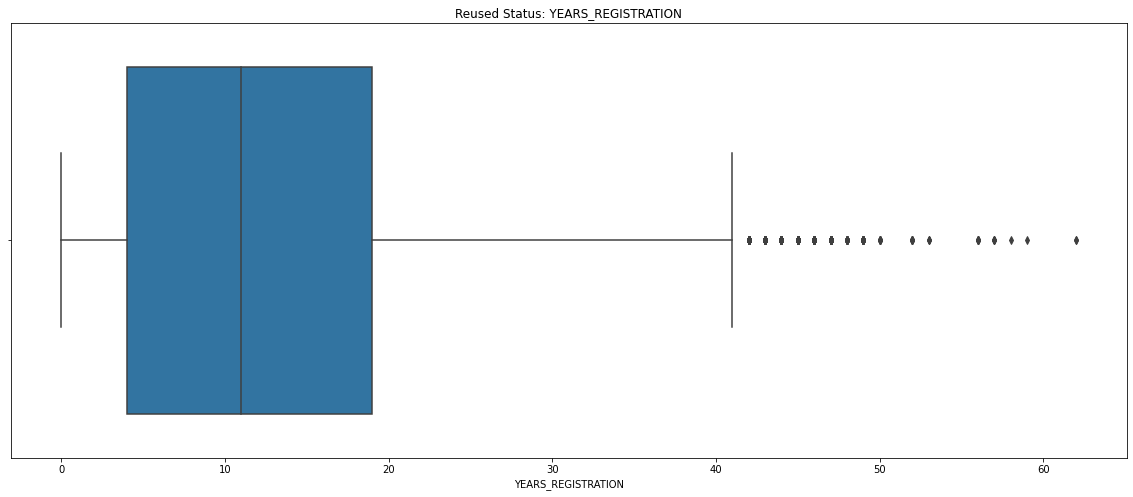

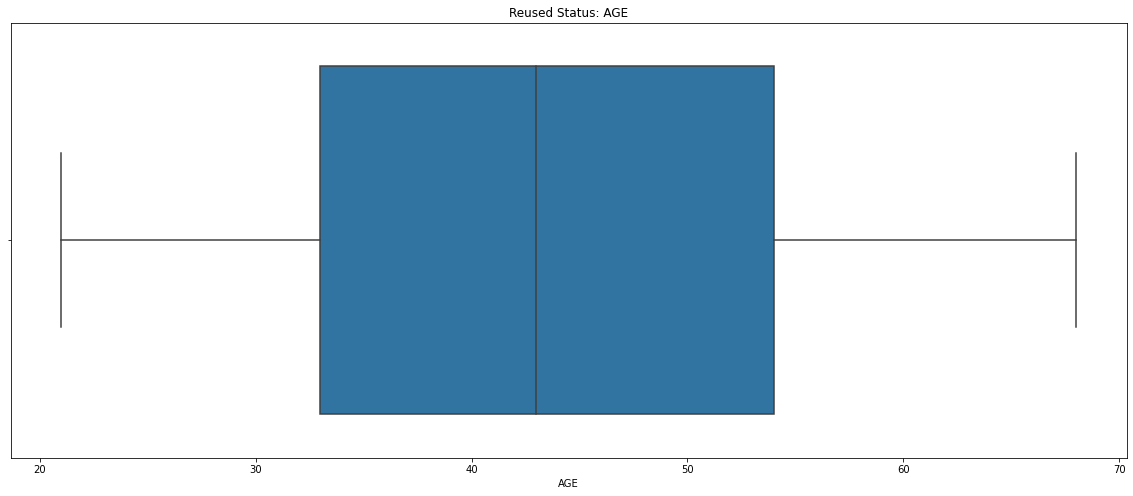

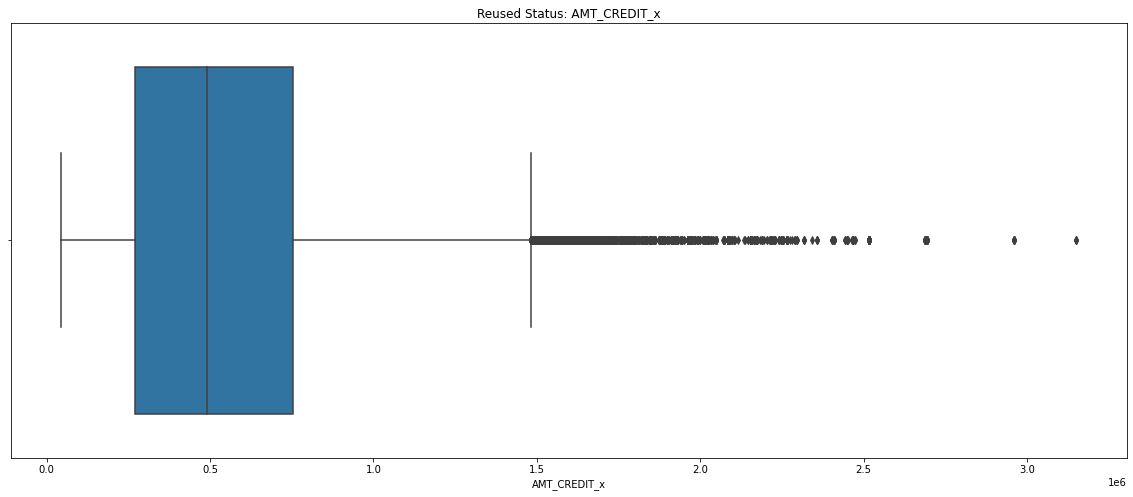

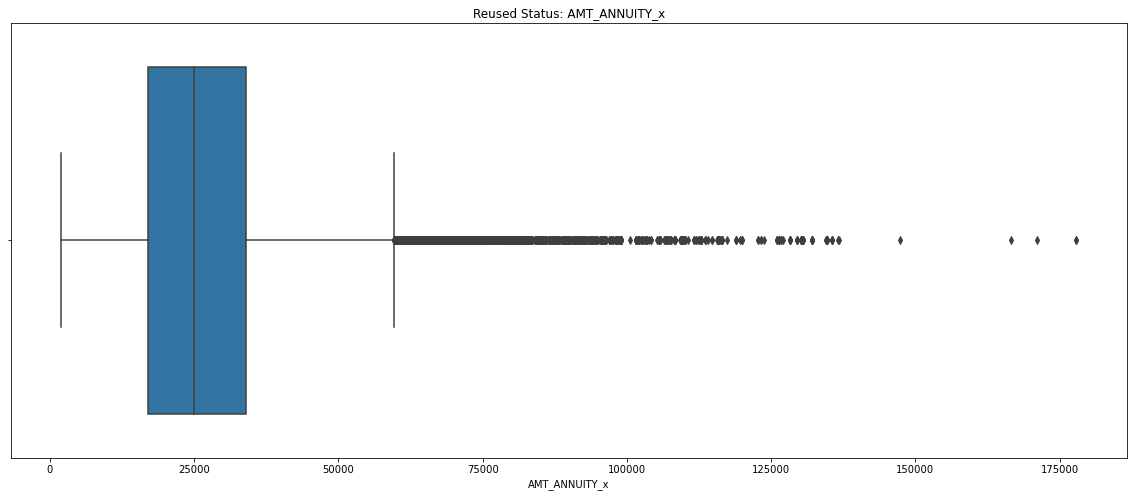

In [239]:
for i in combined_numerical_columns:
    plt.figure(figsize=(20,8))
    sns.boxplot(combined_refused_df[i])
    plt.title("Reused Status: "+i)

### **Bivariant analysis for Categorical Data for the refused applications**

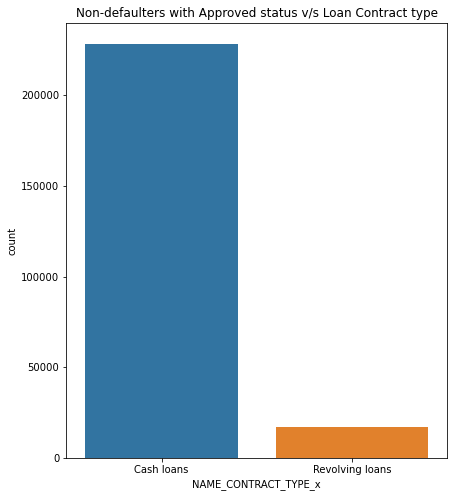

In [241]:

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(x = "NAME_CONTRACT_TYPE_x", data = combined_refused_df)
plt.title("Non-defaulters with Approved status v/s Loan Contract type")
plt.show()

### **Doing analysis on People with Contract Status as Canceled**

In [243]:
combined_cancelled_df=combined_df[combined_df.NAME_CONTRACT_STATUS == 'Canceled']
print(combined_cancelled_df.shape)
combined_cancelled_df

(259441, 71)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE,AGE_GROUP,AMT_CATEGORY,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
6,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,2.0,2,2,Business Entity Type 3,2.0,0.0,2.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,52,8,26.0,6,1.0,50s,Average,2827850,Revolving loans,NaN,0.0,0.0,NaN,THURSDAY,15,Y,1,XAP,Canceled,-181,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN
10,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,2.0,2,2,Business Entity Type 3,2.0,0.0,2.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,52,8,26.0,6,1.0,50s,Average,1243599,Cash loans,NaN,0.0,0.0,NaN,THURSDAY,15,Y,1,XNA,Canceled,-181,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
12,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,2.0,2,2,Business Entity Type 3,2.0,0.0,2.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,52,8,26.0,6,1.0,50s,Average,2545789,Cash loans,NaN,0.0,0.0,NaN,THURSDAY,15,Y,1,XNA,Canceled,-181,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
21,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,Laborers,2.0,2,2,Other,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,1.0,1.0,46,4,13.0,1,6.0,40s,Low,1757431,Cash loans,NaN,0.0,0.0,NaN,FRIDAY,18,Y,1,XNA,Canceled,-82,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
40,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,405000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,1.0,2,2,Electricity,2.0,0.0,2.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,39,5,39.0,10,4.0,30s,Average,2020951,Cash loans,NaN,0.0,0.0,NaN,TUESDAY,13,Y,1,XNA,Canceled,-107,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413658,456244,0,Cash loans,F,N,Y,0,261000.0,1303812.0,35982.0,1138500.0,Unaccompanied,Working,Higher education,Married,House / apartment,NaN,2.0,2,2,Business Entity Type 3,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,1.0,0.0,5.0,55,14,0.0,10,3.0,50s,Good,2758008,

**Univariate Analysis for few numerical columns in combined dataframe**

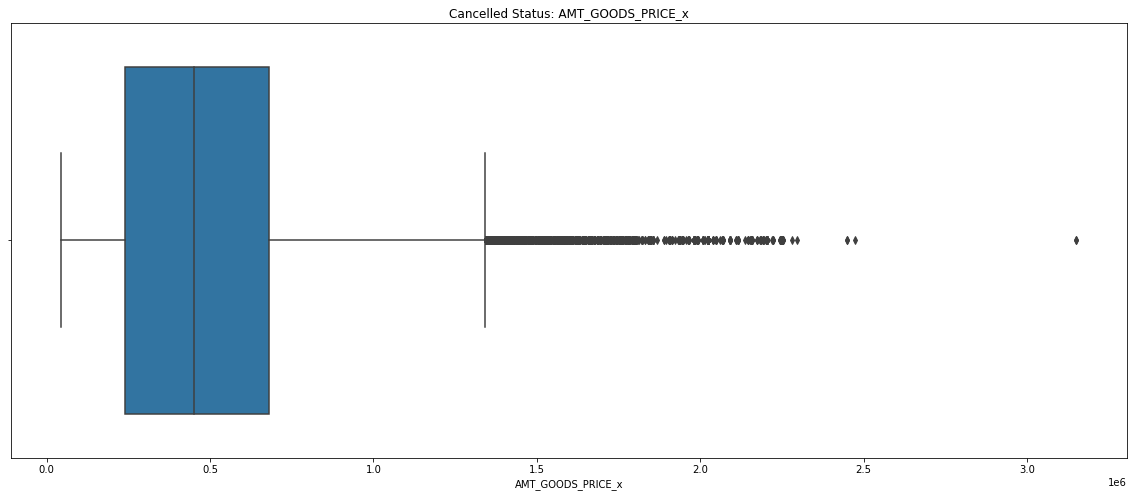

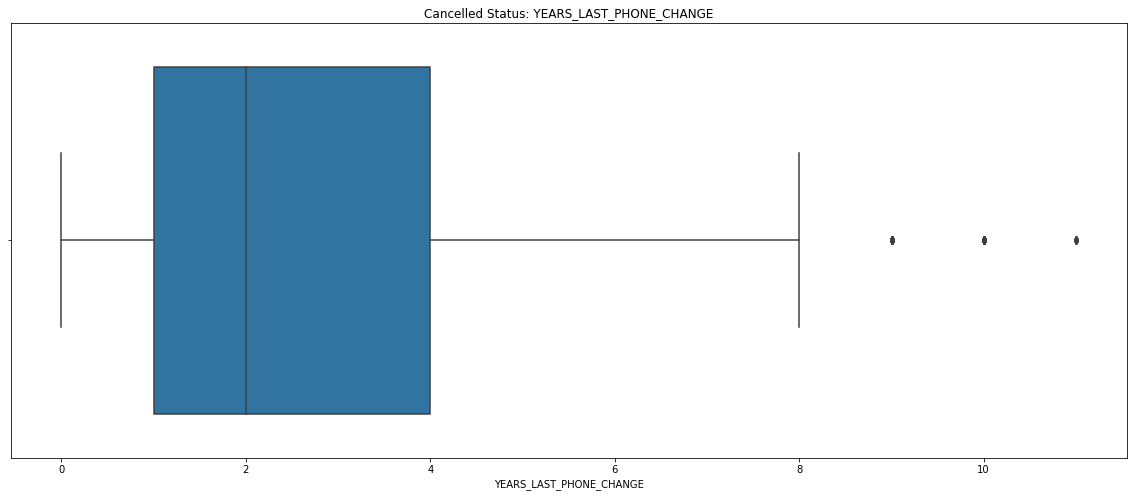

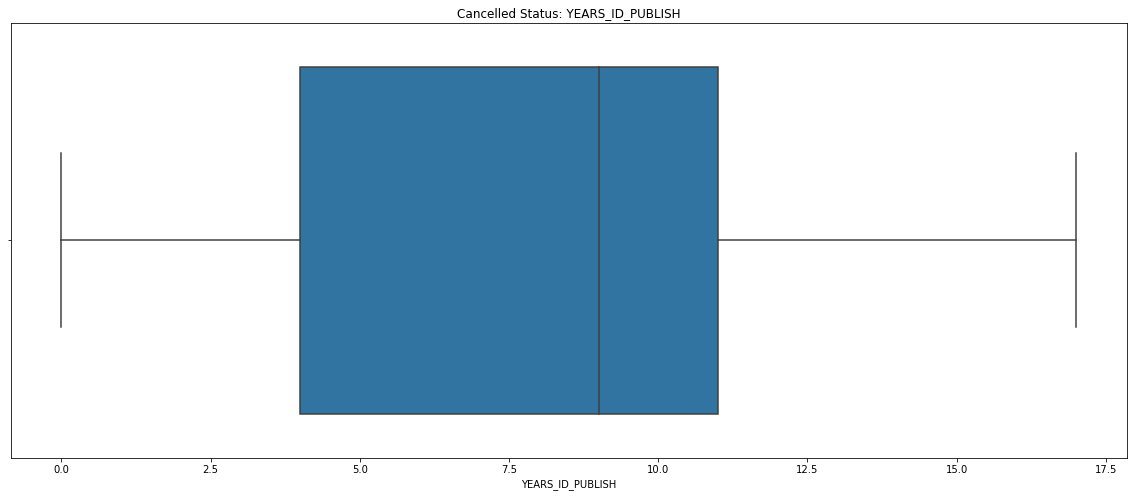

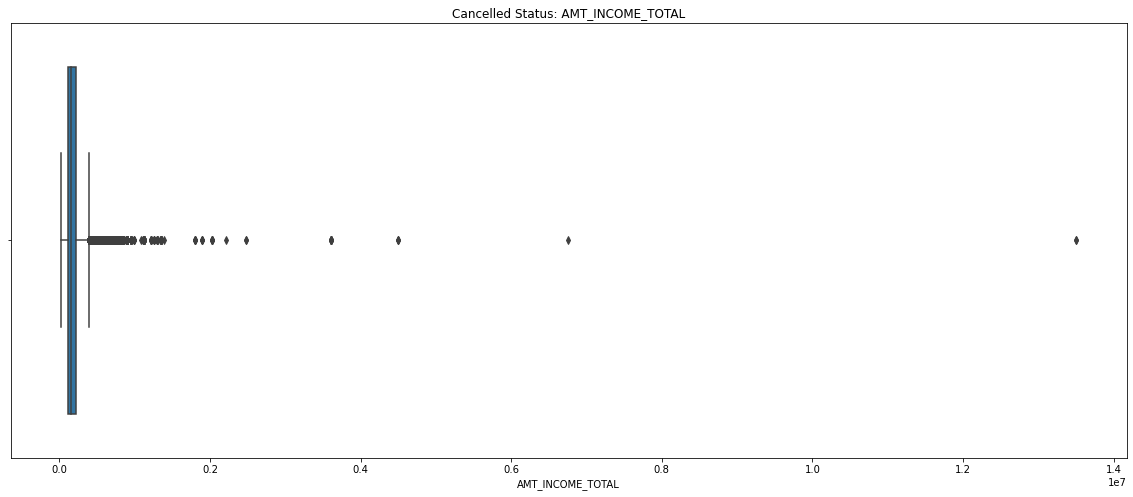

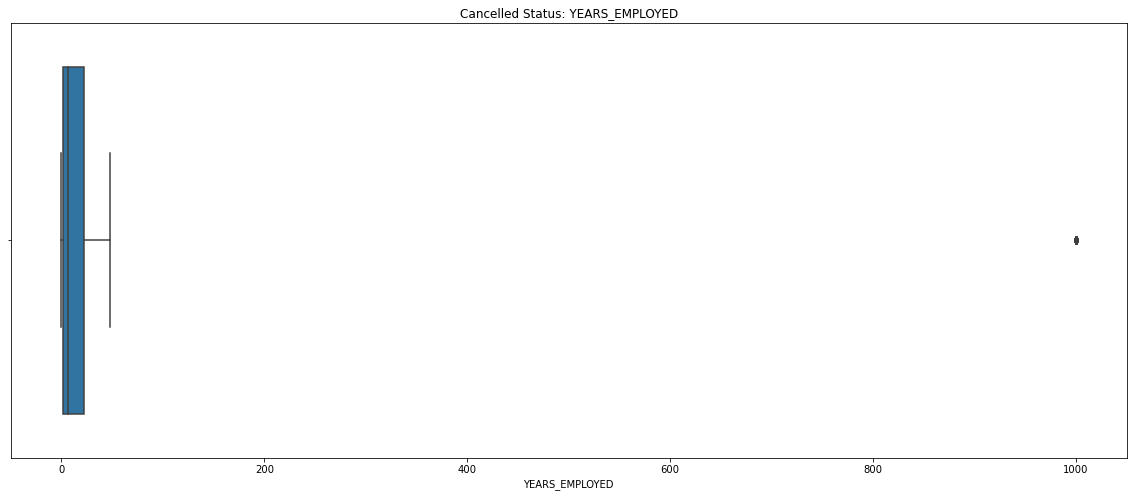

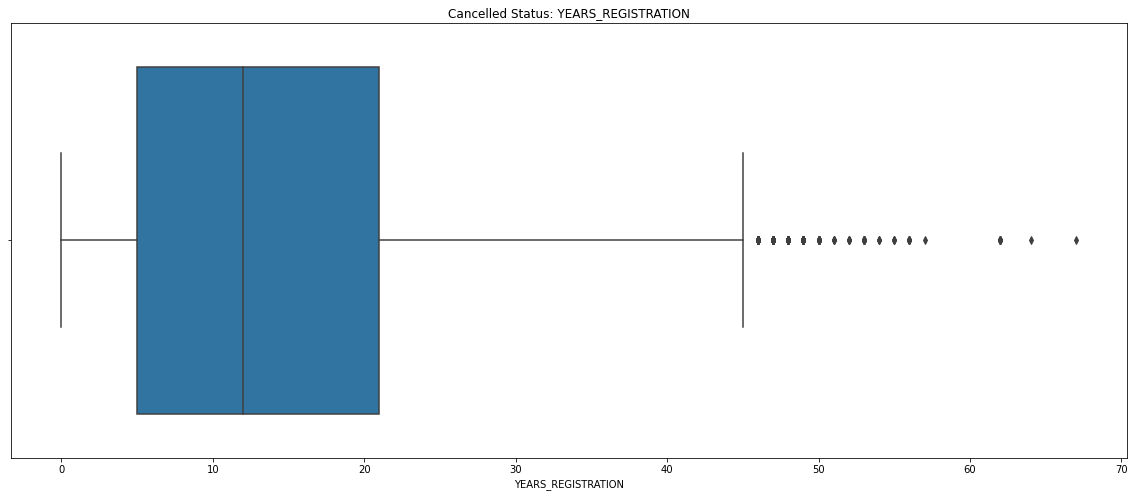

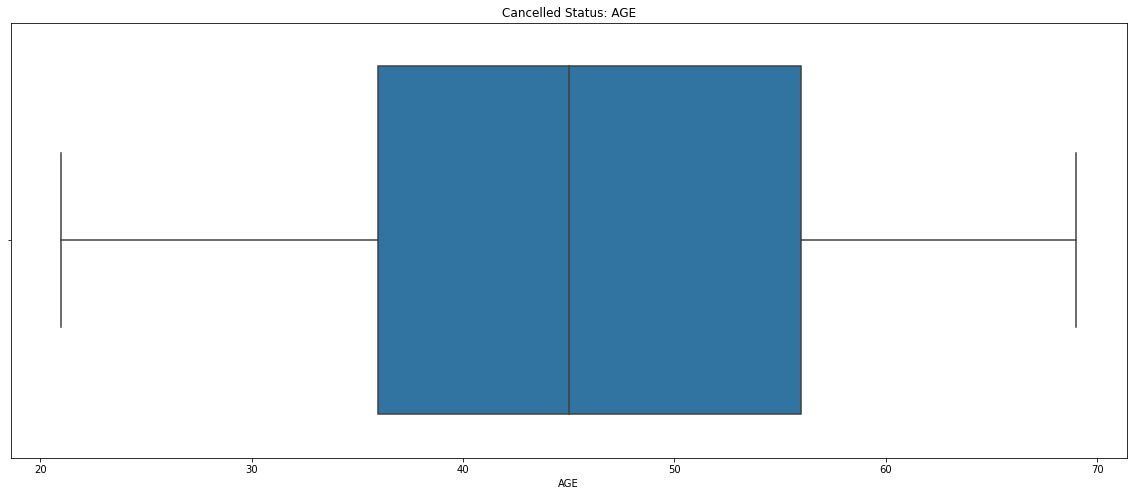

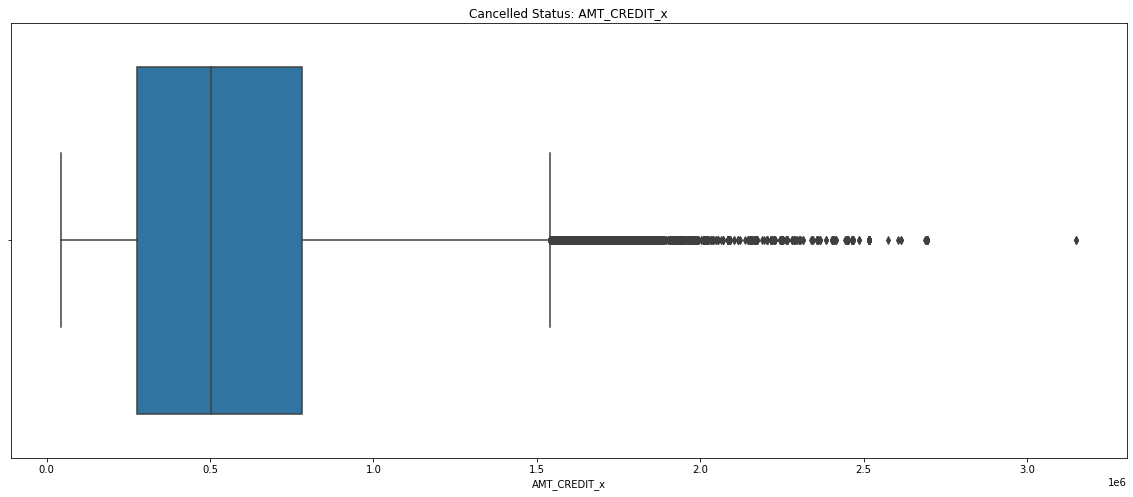

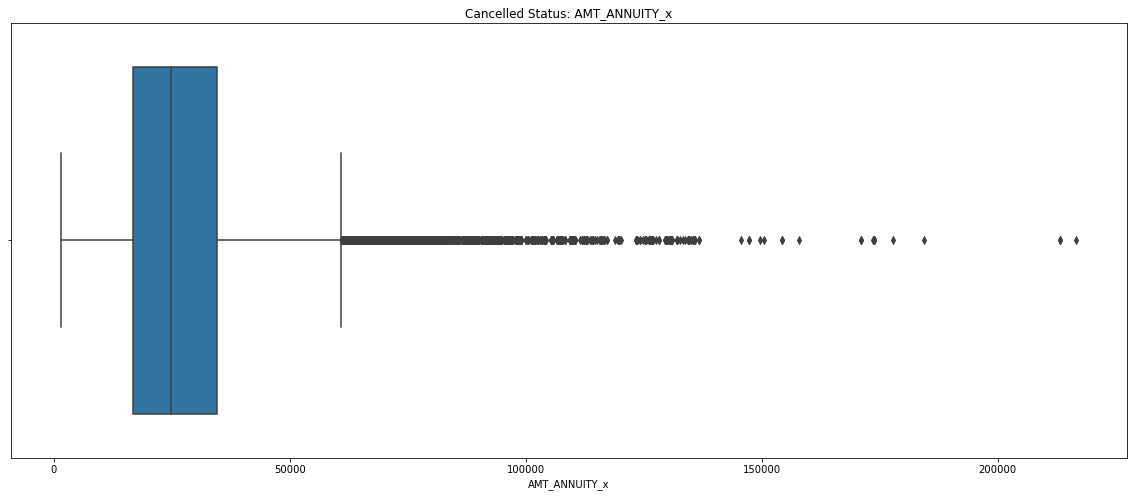

In [244]:
for i in combined_numerical_columns:
    plt.figure(figsize=(20,8))
    sns.boxplot(combined_cancelled_df[i])
    plt.title("Cancelled Status: "+i)

### **Bivariant analysis for Categorical Data for the Canceled applications**

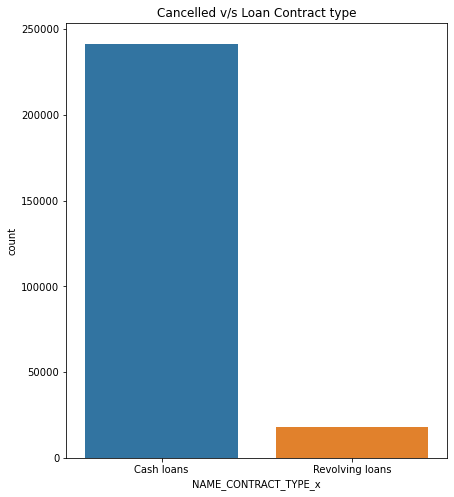

In [246]:

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(x = "NAME_CONTRACT_TYPE_x", data = combined_cancelled_df)
plt.title("Cancelled v/s Loan Contract type")
plt.show()

### **Bivariant analysis for Numerical Data for the Cancelled applications**

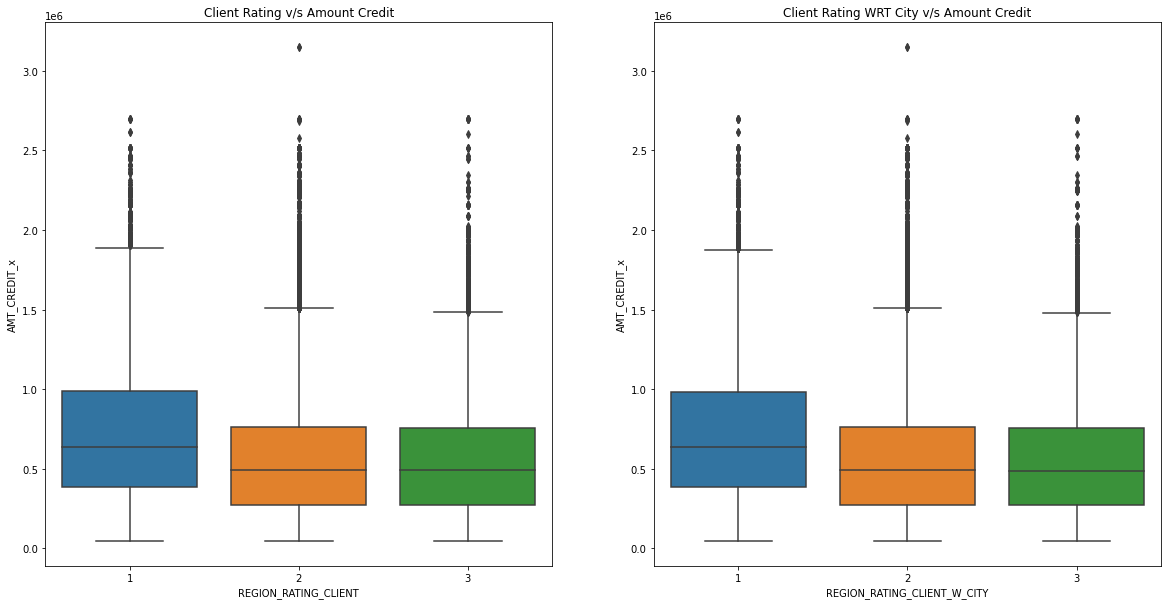

In [247]:
# First Variable: Client Rating
# Second Variable: AMT_CREDIT
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.boxplot(x='REGION_RATING_CLIENT', y='AMT_CREDIT_x', data = combined_cancelled_df)
plt.title("Client Rating v/s Amount Credit")

# First Variable: Client Rating With Respect to City
# Second Variable: AMT_CREDIT
plt.subplot(1,2,2)
sns.boxplot(x='REGION_RATING_CLIENT_W_CITY',y='AMT_CREDIT_x', data = combined_cancelled_df)
plt.title("Client Rating WRT City v/s Amount Credit")
plt.show()

## **Doing analysis on People with Contract Status as Un-used offer**

**Preparing data for people with Unused offer status**

In [248]:
combined_unused_df = combined_df[combined_df.NAME_CONTRACT_STATUS == 'Unused offer']
print(combined_unused_df.shape)
combined_unused_df

(22771, 71)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE,AGE_GROUP,AMT_CATEGORY,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
222,100061,0,Cash loans,F,N,Y,2,225000.0,314055.0,16164.0,238500.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,Core staff,4.0,2,2,Self-employed,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,5.0,28,3,5.0,3,1.0,20s,Good,2474381,Consumer loans,NaN,66501.00,66501.00,66501.00,MONDAY,11,Y,1,XAP,Unused offer,-1067,XNA,CLIENT,"Spouse, partner",Repeater,Mobile,XNA,XNA,Stone,87,Connectivity,NaN,XNA,POS mobile with interest,NaN,NaN,NaN,NaN,NaN,NaN
358,100086,0,Cash loans,F,N,Y,1,135000.0,675000.0,21775.5,675000.0,Unaccompanied,Commercial associate,Higher education,Widow,House / apartment,Laborers,2.0,2,2,Self-employed,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,1.0,4.0,2.0,39,6,11.0,12,4.0,30s,Average,2235967,Consumer loans,NaN,76072.95,76072.95,76072.95,SATURDAY,12,Y,1,XAP,Unused offer,-572,Cash through the bank,CLIENT,NaN,Repeater,Photo / Cinema Equipment,XNA,XNA,Country-wide,37,Connectivity,NaN,XNA,POS mobile with interest,NaN,NaN,NaN,NaN,NaN,NaN
383,100093,0,Cash loans,F,N,Y,1,94500.0,585000.0,28273.5,585000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Core staff,3.0,2,2,Postal,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,3.0,50,1,4.0,4,0.0,50s,Low,1958389,Consumer loans,NaN,31171.50,31171.50,31171.50,FRIDAY,10,Y,1,XAP,Unused offer,-2034,Cash through the bank,CLIENT,Family,Repeater,Mobile,XNA,XNA,Country-wide,50,Connectivity,NaN,XNA,POS mobile with interest,NaN,NaN,NaN,NaN,NaN,NaN
463,100116,0,Cash loans,F,N,Y,0,243000.0,900000.0,32017.5,900000.0,Unaccompanied,Working,Higher education,Married,House / apartment,Core staff,2.0,2,1,Kindergarten,2.0,0.0,2.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,40,18,9.0,13,2.0,40s,Good,1791436,Consumer loans,NaN,107210.25,107210.25,107210.25,SATURDAY,13,Y,1,XAP,Unused offer,-1083,Cash through the bank,CLIENT,NaN,Repeater,Mobile,XNA,XNA,Country-wide,50,Connectivity,NaN,XNA,POS mobile with interest,NaN,NaN,NaN,NaN,NaN,NaN
465,100116,0,Cash loans,F,N,Y,0,243000.0,900000.0,32017.5,900000.0,Unaccompanied,Working,Higher education,Married,House / apartment,Core staff,2.0,2,1,Kindergarten,2.0,0.0,2.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,40,18,9.0,13,2.0,40s,Good,1524770,Consumer loans,NaN,72805.50,72805.50,72805.50,SATURDAY,13,Y,1,XAP,Unused offer,-614,Cash through the bank,CLIENT,NaN,Repeater,Photo / Cinema Equipment,XNA,XNA,Country-wide,48,Connectivity,NaN,XNA,POS mobile with interest,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


### Univariate Analysis for few categorical columns in combined dataframe

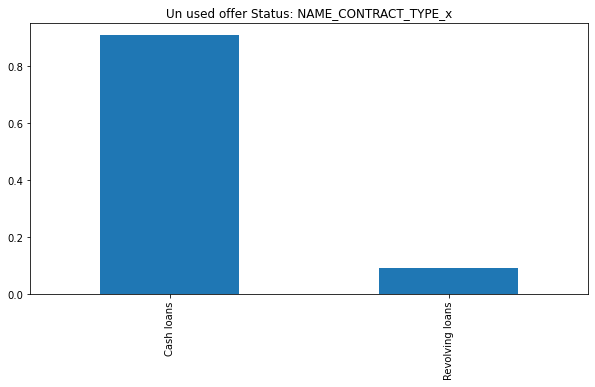

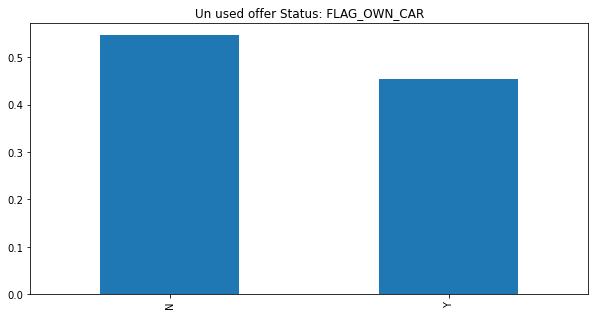

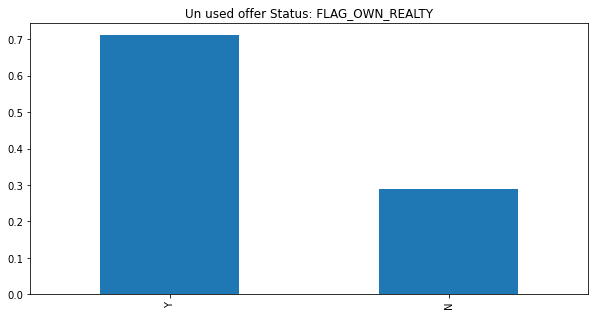

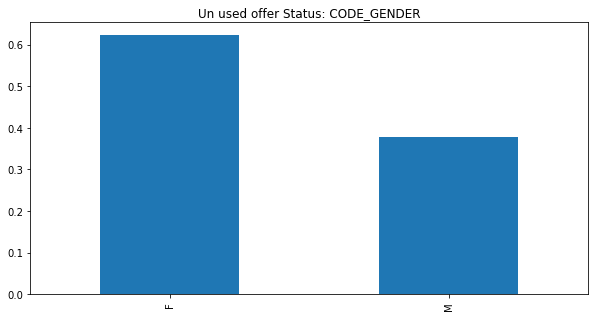

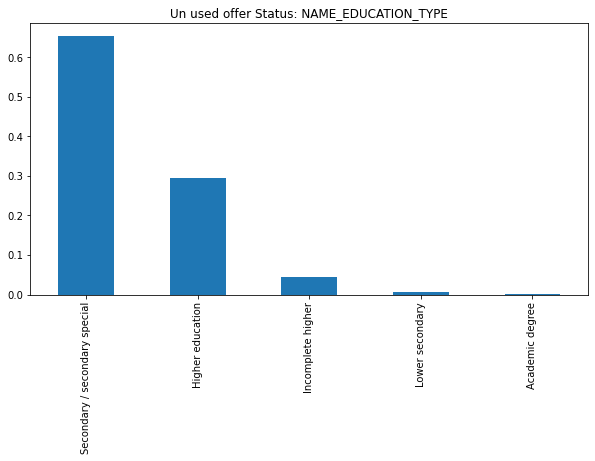

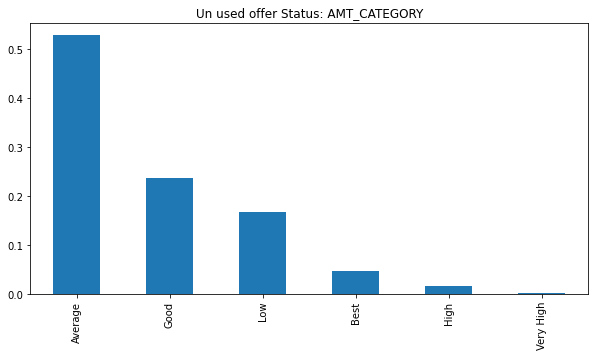

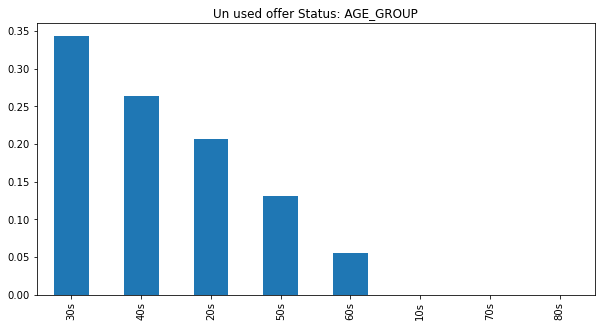

In [249]:
for i in combined_categorical_columns:
    plt.figure(figsize=(10,5))
    combined_unused_df[i].value_counts(normalize=True).plot.bar()
    plt.title("Un used offer Status: "+ i)

### Univariate Analysis for few numerical columns in combined dataframe

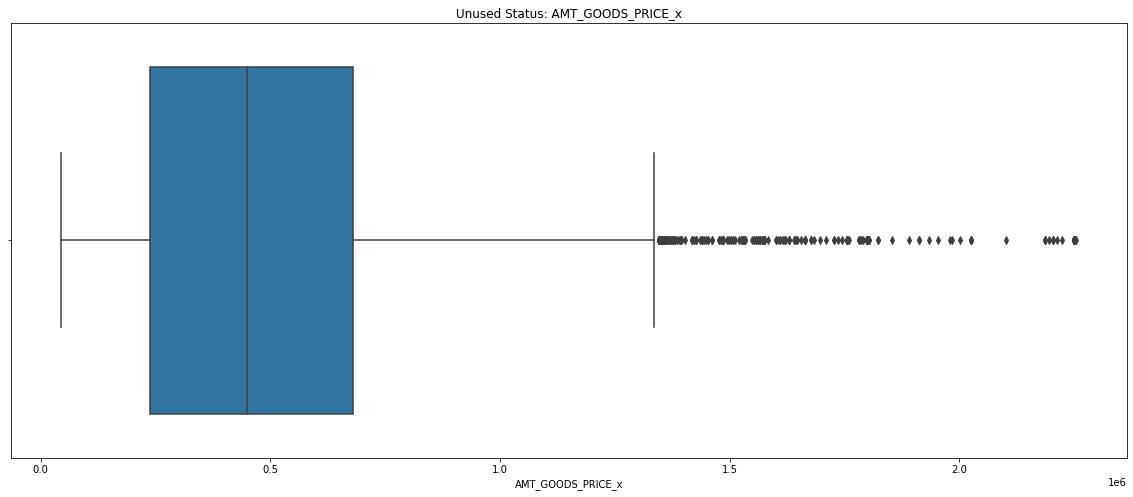

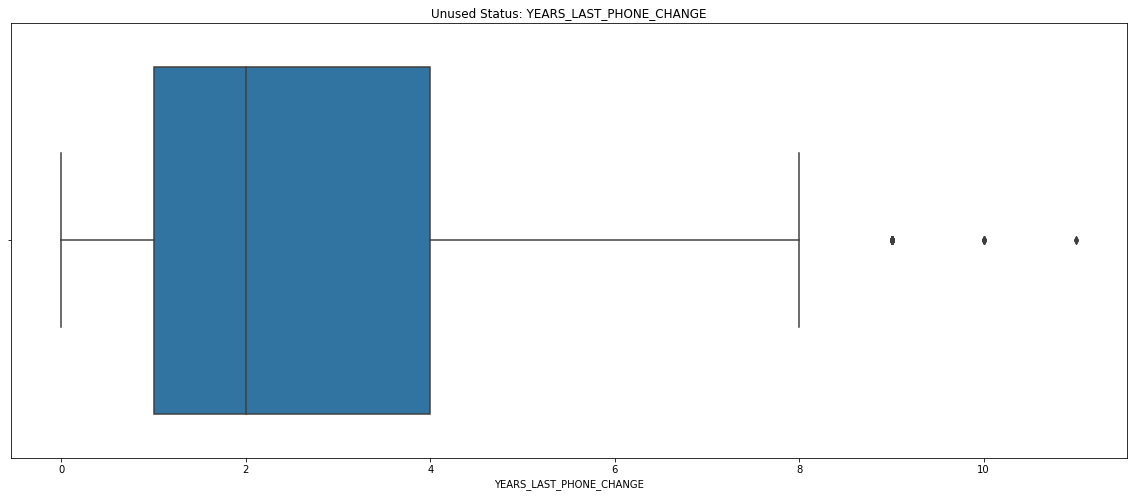

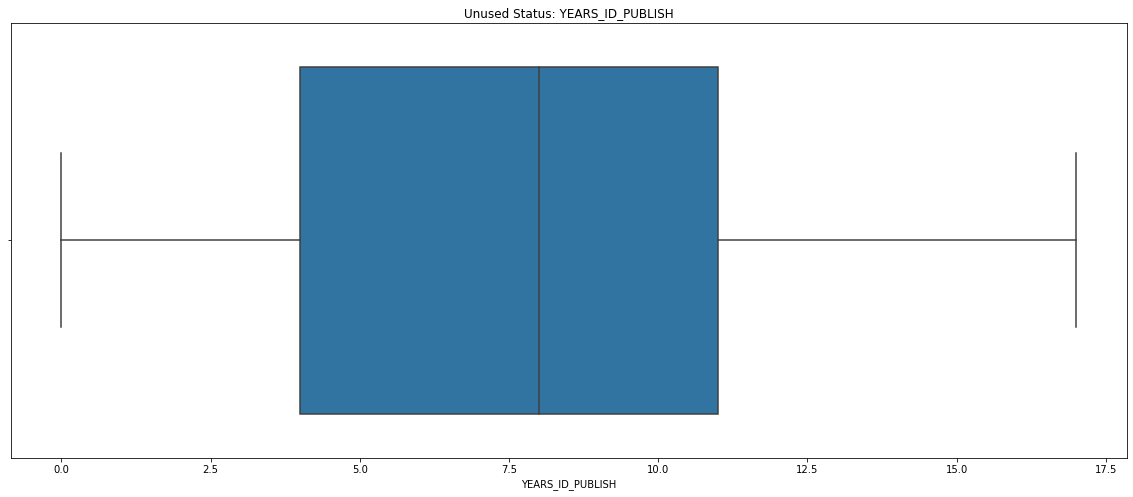

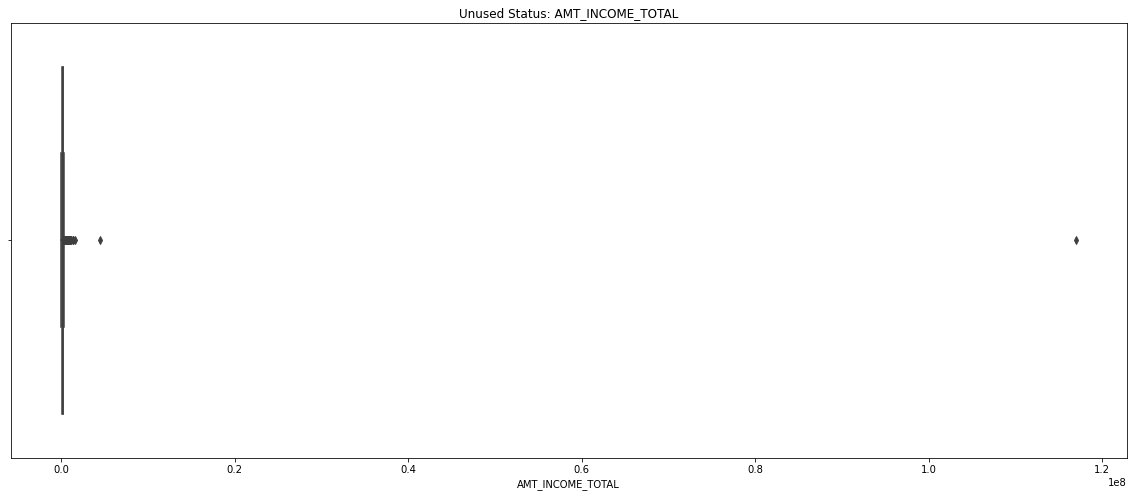

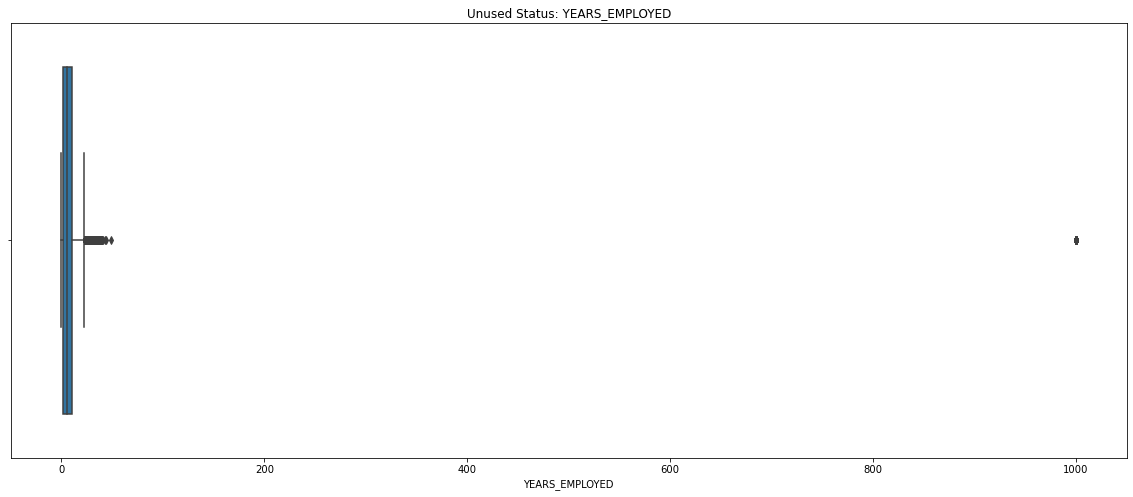

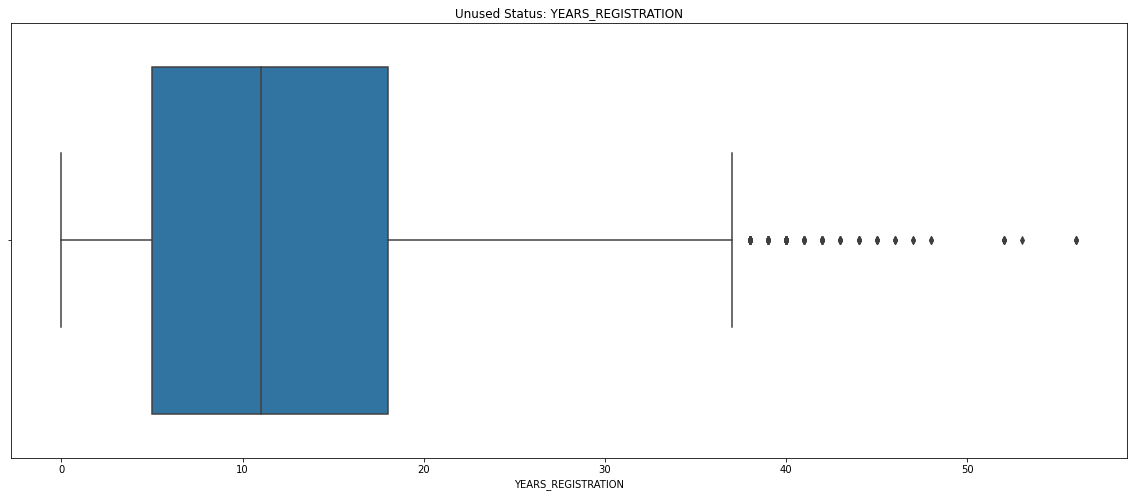

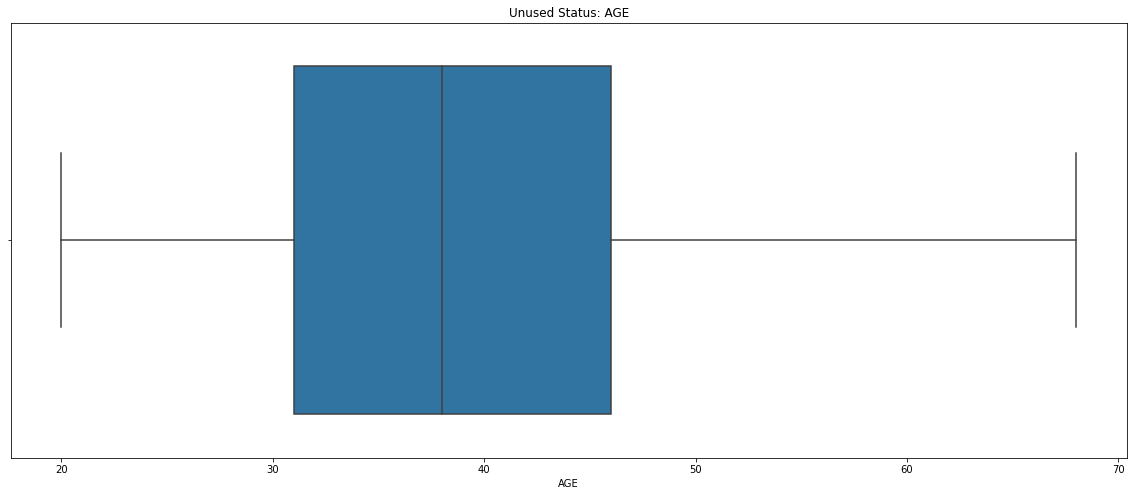

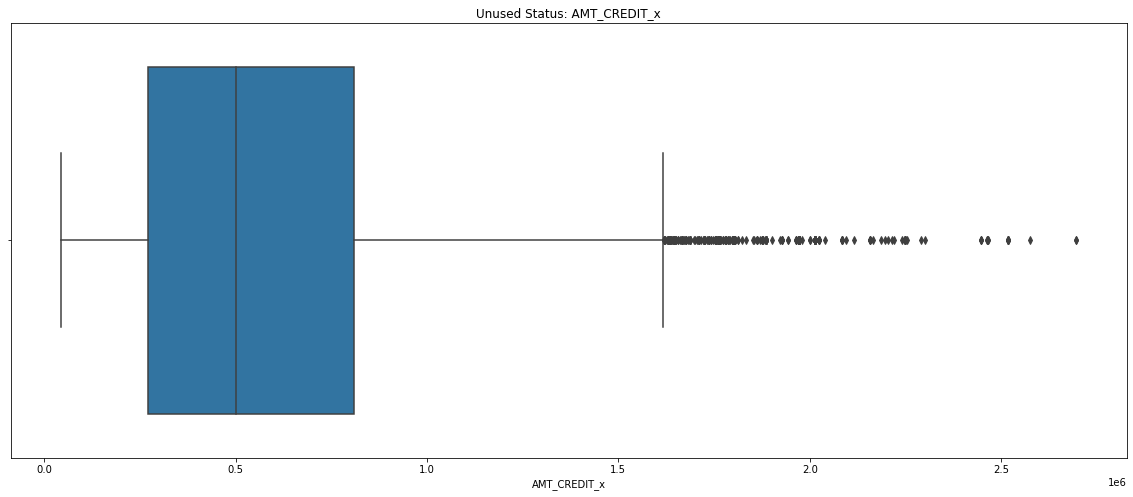

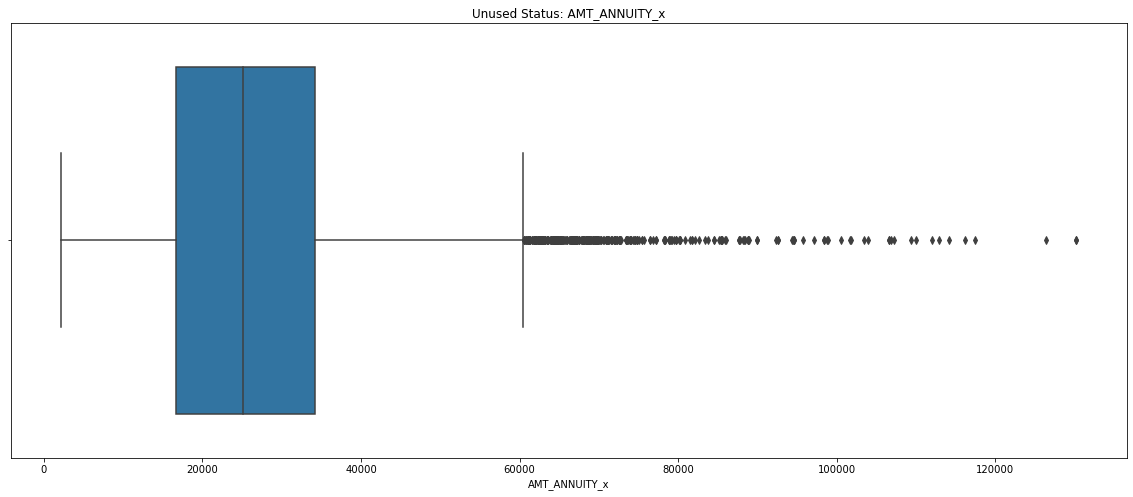

In [250]:
for i in combined_numerical_columns:
    plt.figure(figsize=(20,8))
    sns.boxplot(combined_unused_df[i])
    plt.title("Unused Status: "+i)

### Bivariant analysis for Numerical Data for the Unused applications

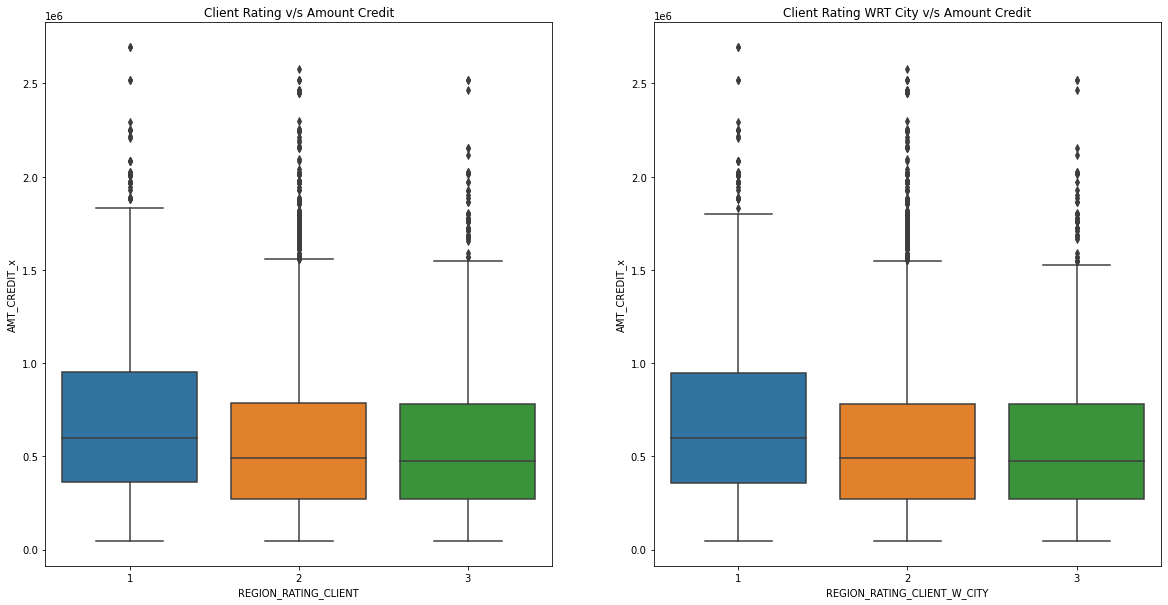

In [251]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.boxplot(x='REGION_RATING_CLIENT', y='AMT_CREDIT_x', data = combined_unused_df)
plt.title("Client Rating v/s Amount Credit")

# First Variable: Client Rating With Respect to City
# Second Variable: AMT_CREDIT
plt.subplot(1,2,2)
sns.boxplot(x='REGION_RATING_CLIENT_W_CITY',y='AMT_CREDIT_x', data = combined_unused_df)
plt.title("Client Rating WRT City v/s Amount Credit")
plt.show()


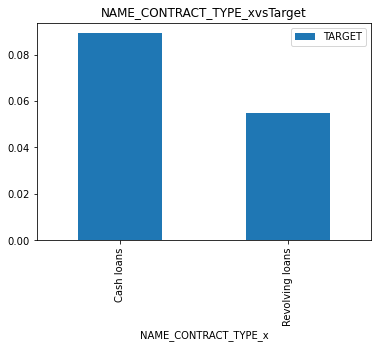

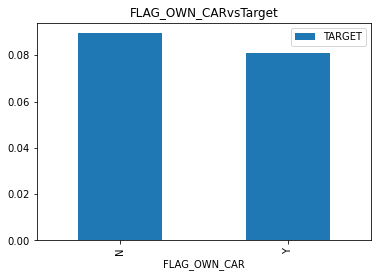

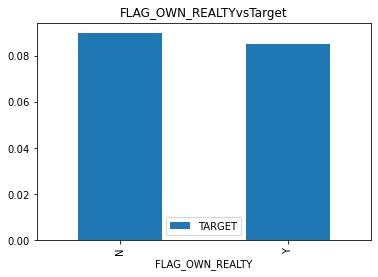

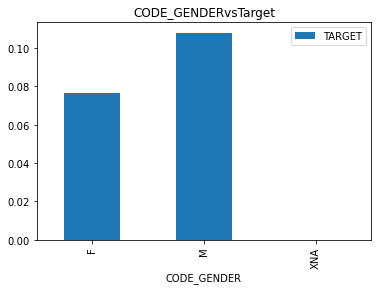

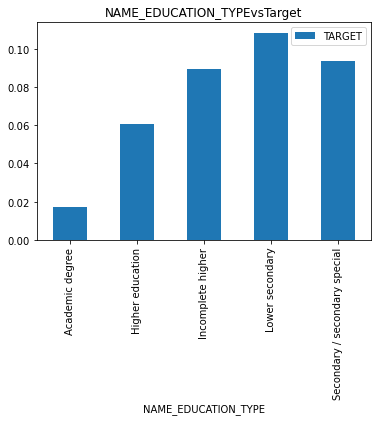

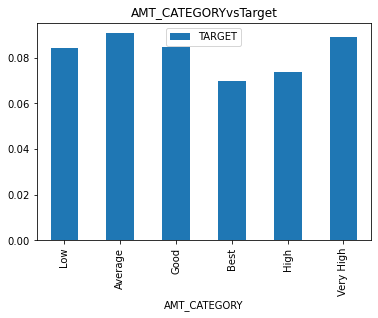

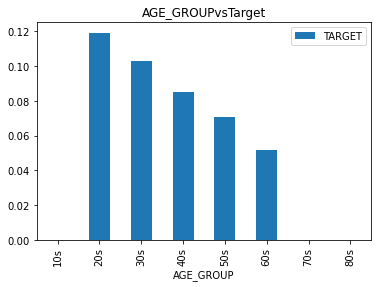

In [252]:
for i in combined_categorical_columns:
    (combined_df.groupby(i)['TARGET', 'NAME_CONTRACT_STATUS'].mean()).plot.bar()
    plt.title(i+ 'vs' +'Target')
    plt.show()

### **Analysis to understand the relation between NAME_CONTRACT_STATUS AND TARGET**

In [273]:
combined_df.groupby('NAME_CONTRACT_STATUS')['TARGET'].mean()

NAME_CONTRACT_STATUS
Approved        0.075887
Canceled        0.091736
Refused         0.119964
Unused offer    0.082517
Name: TARGET, dtype: float64